In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from plotnine import *
import datetime
from pandasql import sqldf
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/ajmar/OneDrive/Documents/coding/datasets/COVID_US/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv")

Data is obtained from the US government website. Column details can be found on https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/g62h-syeh

In [3]:
display(df.head(10))

state        date  critical_staffing_shortage_today_yes  \
0    PR  2020/07/27                                     1   
1    PR  2020/07/24                                     1   
2    PR  2020/07/23                                     1   
3    IA  2020/07/22                                     0   
4    PR  2020/07/22                                     1   
5    IA  2020/07/20                                     0   
6    VI  2020/07/20                                     0   
7    ND  2020/07/19                                     0   
8    HI  2020/07/18                                     0   
9    ND  2020/07/18                                     0   

   critical_staffing_shortage_today_no  \
0                                    1   
1                                    0   
2                                    1   
3                                    2   
4                                    1   
5                                    2   
6                                    0   
7                                    0   
8                                    6   
9                                    0   

   critical_staffing_shortage_today_not_reported  \
0                                             55   
1                                             56   
2                                             55   
3                                            120   
4                                             55   
5                                            120   
6                                              2   
7                                             52   
8                                             24   
9                                             52   

   critical_staffing_shortage_anticipated_within_week_yes  \
0                                                  1        
1                                                  1        
2                                                  1        
3                                                  0        
4                                                  1        
5                                                  0        
6                                                  0        
7                                                  0        
8                                                  0        
9                                                  0        

   critical_staffing_shortage_anticipated_within_week_no  \
0                                                  1       
1                                                  0       
2                                                  1       
3                                                  2       
4                                                  1       
5                                                  2       
6                                                  0       
7                                                  0       
8                                                  6       
9                                                  0       

   critical_staffing_shortage_anticipated_within_week_not_reported  \
0                                                 55                 
1                                                 56                 
2                                                 55                 
3                                                120                 
4                                                 55                 
5                                                120                 
6                                                  2                 
7                                                 52                 
8                                                 24                 
9                                                 52                 

   hospital_onset_covid  hospital_onset_covid_coverage  ...  \
0                   0.0                              4  ...   
1                   0.0                              3  ...   
2

In [4]:
df['date'] = pd.to_datetime(df['date'])
df['state'] = pd.Categorical(df['state'])

In [5]:
display(df.head())

state       date  critical_staffing_shortage_today_yes  \
0    PR 2020-07-27                                     1   
1    PR 2020-07-24                                     1   
2    PR 2020-07-23                                     1   
3    IA 2020-07-22                                     0   
4    PR 2020-07-22                                     1   

   critical_staffing_shortage_today_no  \
0                                    1   
1                                    0   
2                                    1   
3                                    2   
4                                    1   

   critical_staffing_shortage_today_not_reported  \
0                                             55   
1                                             56   
2                                             55   
3                                            120   
4                                             55   

   critical_staffing_shortage_anticipated_within_week_yes  \
0                                                  1        
1                                                  1        
2                                                  1        
3                                                  0        
4                                                  1        

   critical_staffing_shortage_anticipated_within_week_no  \
0                                                  1       
1                                                  0       
2                                                  1       
3                                                  2       
4                                                  1       

   critical_staffing_shortage_anticipated_within_week_not_reported  \
0                                                 55                 
1                                                 56                 
2                                                 55                 
3                                                120                 
4                                                 55                 

   hospital_onset_covid  hospital_onset_covid_coverage  ...  \
0                   0.0                              4  ...   
1                   0.0                              3  ...   
2                   0.0                              4  ...   
3                   0.0                              2  ...   
4                   0.0                              4  ...   

   previous_day_admission_adult_covid_suspected_60-69  \
0                                                NaN    
1                                                NaN    
2                                                NaN    
3                                                0.0    
4                                                NaN    

   previous_day_admission_adult_covid_suspected_60-69_coverage  \
0                                                  0             
1                                                  0             
2                                                  0             
3                                                  1             
4                                                  0             

   previous_day_admission_adult_covid_suspected_70-79  \
0                                                NaN    
1                                                NaN    
2                                                NaN    
3                                                0.0    
4                                                NaN    

   previous_day_admission_adult_covid_suspected_70-79_coverage  \
0                                                  0             
1                                                  0             
2                                                  0             
3                                                  1             
4                                                  0             

   previous_day_admission_adult_covid_suspected_80+  \
0           

In [6]:
col_list = list(df.columns)
print(col_list)

['state', 'date', 'critical_staffing_shortage_today_yes', 'critical_staffing_shortage_today_no', 'critical_staffing_shortage_today_not_reported', 'critical_staffing_shortage_anticipated_within_week_yes', 'critical_staffing_shortage_anticipated_within_week_no', 'critical_staffing_shortage_anticipated_within_week_not_reported', 'hospital_onset_covid', 'hospital_onset_covid_coverage', 'inpatient_beds', 'inpatient_beds_coverage', 'inpatient_beds_used', 'inpatient_beds_used_coverage', 'inpatient_beds_used_covid', 'inpatient_beds_used_covid_coverage', 'previous_day_admission_adult_covid_confirmed', 'previous_day_admission_adult_covid_confirmed_coverage', 'previous_day_admission_adult_covid_suspected', 'previous_day_admission_adult_covid_suspected_coverage', 'previous_day_admission_pediatric_covid_confirmed', 'previous_day_admission_pediatric_covid_confirmed_coverage', 'previous_day_admission_pediatric_covid_suspected', 'previous_day_admission_pediatric_covid_suspected_coverage', 'staffed_adu

In [7]:
print(df.dtypes)

state                                                                  category
date                                                             datetime64[ns]
critical_staffing_shortage_today_yes                                      int64
critical_staffing_shortage_today_no                                       int64
critical_staffing_shortage_today_not_reported                             int64
                                                                      ...      
previous_day_admission_adult_covid_suspected_80+_coverage                 int64
previous_day_admission_adult_covid_suspected_unknown                    float64
previous_day_admission_adult_covid_suspected_unknown_coverage             int64
deaths_covid                                                            float64
deaths_covid_coverage                                                     int64
Length: 99, dtype: object


In [101]:
tabled_values = {}
for x in col_list:
 title = str(x) + "_tabled_values"
 tabled_values[title] = df[x].value_counts(dropna=False)
 print(tabled_values[title])

MT    571
MN    571
AL    571
NC    571
TX    571
IN    571
HI    571
NV    553
KS    540
IL    523
MS    522
WV    521
MO    518
OR    517
PR    516
LA    516
CA    516
WA    513
OK    511
PA    511
NJ    511
NE    511
ND    511
WI    511
OH    511
WY    511
MI    511
KY    511
ME    511
IA    511
GA    511
MD    511
AZ    510
VA    510
SC    510
RI    509
AR    506
FL    500
ID    499
NM    498
NY    498
CO    498
TN    498
VT    495
CT    494
UT    492
AK    489
SD    487
DE    485
NH    485
MA    485
DC    484
VI    473
Name: state, dtype: int64
2020-07-27    53
2021-01-27    53
2021-01-28    53
2020-09-30    53
2021-04-20    53
              ..
2020-01-17     7
2020-01-22     7
2020-01-12     7
2020-01-19     7
2020-01-14     7
Name: date, Length: 571, dtype: int64
0      8445
1      1940
2      1516
4      1115
3      1079
       ... 
73        1
179       1
131       1
186       1
178       1
Name: critical_staffing_shortage_today_yes, Length: 184, dtype: int64
0      7287
1    

In [8]:
df[['previous_day_admission_adult_covid_suspected_60-69', 'previous_day_admission_adult_covid_suspected_60-69_coverage', 'previous_day_admission_adult_covid_suspected_70-79', 'previous_day_admission_adult_covid_suspected_70-79']].fillna(0)
df['number_of_hospitals'] = df['critical_staffing_shortage_today_yes'] + df['critical_staffing_shortage_today_no'] + df['critical_staffing_shortage_today_not_reported']

Make a list to deal with the change in dates

In [9]:
#order the dates and reset index. Use the new index as a date substitute for ease.

dates_list = pd.DataFrame(df['date'].sort_values().unique()).reset_index()
print(dates_list.head())

   index          0
0      0 2020-01-01
1      1 2020-01-02
2      2 2020-01-03
3      3 2020-01-04
4      4 2020-01-05


In [10]:
dates_list.columns =['date_index', 'date']
print(dates_list)

     date_index       date
0             0 2020-01-01
1             1 2020-01-02
2             2 2020-01-03
3             3 2020-01-04
4             4 2020-01-05
..          ...        ...
566         566 2021-07-20
567         567 2021-07-21
568         568 2021-07-22
569         569 2021-07-23
570         570 2021-07-24

[571 rows x 2 columns]


In [11]:
df3 = pd.merge(df, dates_list, how='outer')

In [12]:
df3.sort_values('state').head()

state       date  critical_staffing_shortage_today_yes  \
12164    AK 2020-11-29                                     5   
19403    AK 2021-01-31                                     1   
17371    AK 2021-01-12                                     1   
13960    AK 2020-12-23                                     3   
2112     AK 2020-08-01                                     2   

       critical_staffing_shortage_today_no  \
12164                                   19   
19403                                   23   
17371                                   21   
13960                                   21   
2112                                     5   

       critical_staffing_shortage_today_not_reported  \
12164                                              0   
19403                                              0   
17371                                              0   
13960                                              0   
2112                                              17   

       critical_staffing_shortage_anticipated_within_week_yes  \
12164                                                  6        
19403                                                  1        
17371                                                  1        
13960                                                  3        
2112                                                   2        

       critical_staffing_shortage_anticipated_within_week_no  \
12164                                                 18       
19403                                                 23       
17371                                                 21       
13960                                                 21       
2112                                                   5       

       critical_staffing_shortage_anticipated_within_week_not_reported  \
12164                                                  0                 
19403                                                  0                 
17371                                                  0                 
13960                                                  0                 
2112                                                  17                 

       hospital_onset_covid  hospital_onset_covid_coverage  ...  \
12164                   1.0                             24  ...   
19403                   0.0                             24  ...   
17371                   1.0                             22  ...   
13960                   2.0                             24  ...   
2112                    0.0                             14  ...   

       previous_day_admission_adult_covid_suspected_70-79  \
12164                                                1.0    
19403                                                0.0    
17371                                                0.0    
13960                                                1.0    
2112                                                 2.0    

       previous_day_admission_adult_covid_suspected_70-79_coverage  \
12164                                                 24             
19403                                                 24             
17371                                                 22             
13960                                                 24             
2112                                                  10             

       previous_day_admission_adult_covid_suspected_80+  \
12164                                               0.0   
19403                                               0.0   
17371                                               1.0   
13960                                               0.0   
2112                                                0.0   

       previous_day_admission_adult_covid_suspected_80+_coverage  \
12164                                                 24           
19403                                                 24           
17371                               

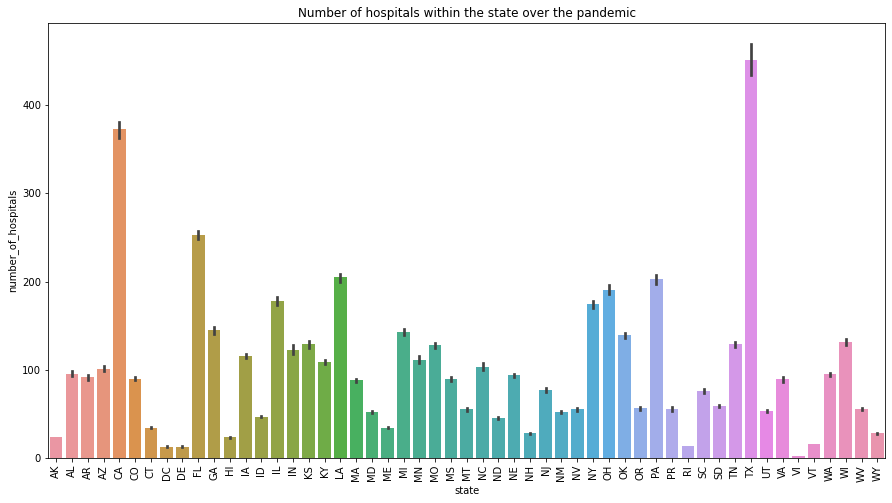

In [13]:
plt.figure(figsize=(15,8))
sns.barplot(data=df3, x='state', y='number_of_hospitals')
plt.xticks(rotation=90, ha='center')
plt.title("Number of hospitals within the state over the pandemic")
plt.show()

Information from VI is largely lacking. Could consider excluding from any later analysis.

In [14]:
#Introduce new information about the state such as the state's population and median income.

census_states = pd.read_csv('C:/Users/ajmar/OneDrive/Documents/coding/datasets/COVID_US/state_pop_data.csv')
state_codes = pd.read_csv('C:/Users/ajmar/OneDrive/Documents/coding/datasets/COVID_US/state_codes.csv')
pop_age = pd.read_csv("C:/Users/ajmar/OneDrive/Documents/coding/datasets/COVID_US/pop_ages_by_state.csv")
state_income = pd.read_csv('C:/Users/ajmar/OneDrive/Documents/coding/datasets/COVID_US/state_income_csv.csv')

In [15]:
pop_age2 = pop_age.rename(columns={'Location':'State'})
state_income.rename(columns={'State':'State'})
state_income.head()

State Median Salary
0     Alabama     46,000.00
1      Alaska     50,000.00
2     Arizona     43,000.00
3    Arkansas     42,000.00
4  California     48,200.00

In [16]:
#display(census_states.head())
#display(pop_age2.head())
#display(state_income.head())

In [17]:
#display(state_codes.head())

In [18]:
cen_states = census_states.merge(state_codes).merge(pop_age2).merge(state_income)
#display(cen_states.head())
state_pop = cen_states.drop(columns = ['rank', 'Growth', 'Pop2018', 'Pop2010', 'growthSince2010', 'Percent','Footnotes'])

state_pop2 = state_pop.rename(columns={'State':'state_name', 'Pop':'state_population', 'density':'state_pop_density', 'Code':'state', 'Abbrev':'state_abbrev', 'Children 0-18':'less_18_pop_perc', 'Adults 19-25':'19_25_pop_perc', 'Adults 26-34':'26_34_pop_perc', 'Adults 35-54':'35_54_pop_perc', 'Adults 55-64':'55_64_pop_perc', '65+':'65+_pop_perc', 'Total':'total_pop_perc', 'Median Salary':'median_salary'})
display(state_pop2.head())

state_name  state_population  state_pop_density state_abbrev state  \
0    California          39613493           254.2929       Calif.    CA   
1         Texas          29730311           113.8081         Tex.    TX   
2       Florida          21944577           409.2229         Fla.    FL   
3      New York          19299981           409.5400         N.Y.    NY   
4  Pennsylvania          12804123           286.1704          Pa.    PA   

   less_18_pop_perc  19_25_pop_perc  26_34_pop_perc  35_54_pop_perc  \
0             0.237           0.092           0.137           0.263   
1             0.272           0.094           0.130           0.261   
2             0.209           0.080           0.114           0.249   
3             0.217           0.086           0.134           0.257   
4             0.219           0.079           0.123           0.248   

   55_64_pop_perc  65+_pop_perc  total_pop_perc median_salary  
0           0.123         0.149               1     48,200.00  
1           0.114         0.129               1     45,000.00  
2           0.137         0.211               1     40,000.00  
3           0.136         0.169               1     50,000.00  
4           0.145         0.187               1     49,088.00

In [19]:
df4 = pd.merge(df3, state_pop2, left_on='state', right_on='state', how='outer') 

In [20]:
#compare how the statistics look as a proportion of the population
df4['death_proportion'] = (df4["deaths_covid"]/df4['state_population'])*100
df4['hospitals_per_head'] = df4["number_of_hospitals"]/df4['state_population']

#remove PR as lack of information available on Puerto Rico and Virgin Isles.

df4 = df4[(df4['state']!='PR') & (df4['state']!= 'VI')]

#clean up median salary
df4['median_salary'] = df4['median_salary'].str.replace('\\,', '', regex=True)
df4['median_salary'] = df4['median_salary'].astype('float')
df4.head()

state       date  critical_staffing_shortage_today_yes  \
516    MN 2020-07-27                                     4   
517    MN 2020-07-24                                     3   
518    MN 2020-07-23                                     1   
519    MN 2020-07-22                                     0   
520    MN 2020-07-20                                     0   

     critical_staffing_shortage_today_no  \
516                                   70   
517                                   40   
518                                   19   
519                                    8   
520                                    8   

     critical_staffing_shortage_today_not_reported  \
516                                             53   
517                                             86   
518                                            109   
519                                            121   
520                                            121   

     critical_staffing_shortage_anticipated_within_week_yes  \
516                                                  5        
517                                                  2        
518                                                  0        
519                                                  0        
520                                                  0        

     critical_staffing_shortage_anticipated_within_week_no  \
516                                                 69       
517                                                 40       
518                                                 19       
519                                                  7       
520                                                  7       

     critical_staffing_shortage_anticipated_within_week_not_reported  \
516                                                 53                 
517                                                 87                 
518                                                110                 
519                                                122                 
520                                                122                 

     hospital_onset_covid  hospital_onset_covid_coverage  ...  \
516                   8.0                            123  ...   
517                   6.0                            122  ...   
518                   8.0                            117  ...   
519                   6.0                            107  ...   
520                   9.0                            108  ...   

     less_18_pop_perc  19_25_pop_perc  26_34_pop_perc  35_54_pop_perc  \
516             0.243           0.082           0.125           0.252   
517             0.243           0.082           0.125           0.252   
518             0.243           0.082           0.125           0.252   
519             0.243           0.082           0.125           0.252   
520             0.243           0.082           0.125           0.252   

     55_64_pop_perc  65+_pop_perc  total_pop_perc  median_salary  \
516           0.137         0.162             1.0        50000.0   
517           0.137         0.162             1.0        50000.0   
518           0.137         0.162             1.0        50000.0   
519           0.137         0.162             1.0        50000.0   
520           0.137         0.162             1.0        50000.0   

     death_proportion  hospitals_per_head  
516          0.000018            0.000022  
517          0.000018            0.000023  
518          0.000035            0.000023  
519          0.000053            0.000023  
520          0.000053            0.000023  

[5 rows x 115 columns]

In [21]:
#display(df4[df4['state']=='ND'].sort_values("date", ascending=False).head(10))

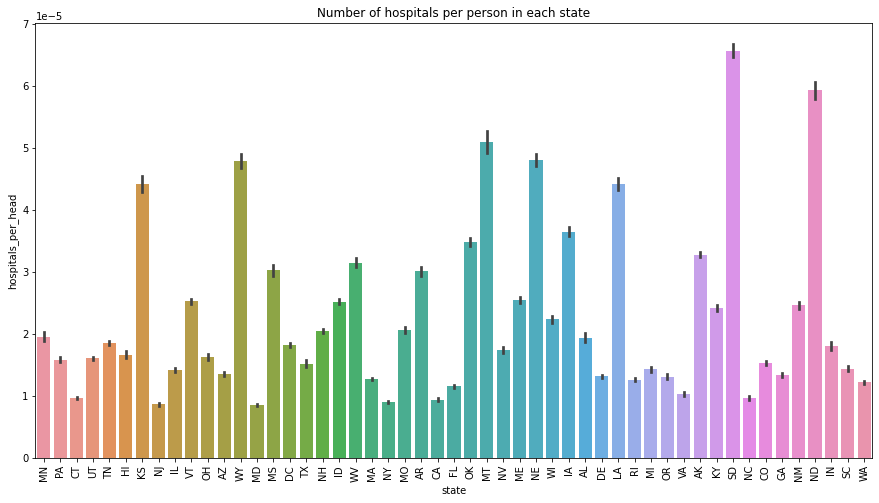

In [22]:
plt.figure(figsize=(15,8))
sns.barplot(data=df4, x="state", y="hospitals_per_head")
#order=df4.sort_values('hospitals_per_head').state
plt.title("Number of hospitals per person in each state")
plt.xticks(rotation=90, ha='center')
plt.show()

In [23]:
states = df4['state'].unique()


In [116]:
df4["cul_reporting_date"] = 0
for state in states:
 df_by_state = (df4[df4["state"] == state])
 df_by_state.sort_values("date", ascending=True)
 for x in df_by_state['date']:
  if x > 0:
   y = x-1
   df4["cul_reporting_date"].iloc[x] = int(df4["cul_reporting_date"].iloc[y]) + 1
  else:
   df4["cul_reporting_date"].iloc[x] = 0
display(df4)
 



C:\Users\ajmar\anaconda3\envs\rstudio\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


state       date  critical_staffing_shortage_today_yes  \
516      MN 2020-07-27                                     4   
517      MN 2020-07-24                                     3   
518      MN 2020-07-23                                     1   
519      MN 2020-07-22                                     0   
520      MN 2020-07-20                                     0   
...     ...        ...                                   ...   
27306    WA 2021-06-25                                     9   
27307    WA 2021-06-29                                    11   
27308    WA 2021-02-03                                     7   
27309    WA 2021-04-22                                    12   
27310    WA 2021-02-15                                     9   

       critical_staffing_shortage_today_no  \
516                                     70   
517                                     40   
518                                     19   
519                                      8   
520                                      8   
...                                    ...   
27306                                   94   
27307                                   81   
27308                                   96   
27309                                   91   
27310                                   84   

       critical_staffing_shortage_today_not_reported  \
516                                               53   
517                                               86   
518                                              109   
519                                              121   
520                                              121   
...                                              ...   
27306                                              2   
27307                                              2   
27308                                              2   
27309                                              2   
27310                                              2   

       critical_staffing_shortage_anticipated_within_week_yes  \
516                                                    5        
517                                                    2        
518                                                    0        
519                                                    0        
520                                                    0        
...                                                  ...        
27306                                                  8        
27307                                                 11        
27308                                                  8        
27309                                                  9        
27310                                                  6        

       critical_staffing_shortage_anticipated_within_week_no  \
516                                                   69       
517                                                   40       
518                                                   19       
519                                                    7       
520                                                    7       
...                                                  ...       
27306                                                 95       
27307                                                 81       
27308                                                 95       
27309                                                 94       
27310                                                 87       

       critical_staffing_shortage_anticipated_within_week_not_reported  \
516                                                   53                 
517                                                   87                 
518                                                  110                 
519                                                  122                 
520                                                  122                 
...              

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df3, x='date', y='state', hue="state")
plt.xticks(rotation=90, ha='center')
plt.title("Number of hospitals within the state over the pandemic")
plt.show()

In [24]:
max_crit_next_week = {}
def graph_critical_staff_within_week_by_states(state_list): 
 counter = 0
 for state in state_list:
  counter += 1
  title_a = 'Critical staffing within next week for '
  title_b = title_a + state
  df_narrow = df4[df4['state']==state]
  max_critical = (df_narrow['critical_staffing_shortage_anticipated_within_week_yes'].max())/(df_narrow['number_of_hospitals'].max())
  min_critical = (df_narrow['critical_staffing_shortage_anticipated_within_week_yes'].min())/(df_narrow['number_of_hospitals'].max())
  max_crit_next_week[counter] = state, max_critical
  print('- ', title_b, ": maximum critical staffing shortage is ", str(max_critical), "\n", title_b, ": minimum critical staffing shortage is ", str(min_critical))
 
  
#check the maximum and minimum levels of critical hospitals, as a proportion of total hospitals per state.

graph_critical_staff_within_week_by_states(states)

-  Critical staffing within next week for MN : maximum critical staffing shortage is  0.22142857142857142 
 Critical staffing within next week for MN : minimum critical staffing shortage is  0.0
-  Critical staffing within next week for PA : maximum critical staffing shortage is  0.22077922077922077 
 Critical staffing within next week for PA : minimum critical staffing shortage is  0.0
-  Critical staffing within next week for CT : maximum critical staffing shortage is  0.225 
 Critical staffing within next week for CT : minimum critical staffing shortage is  0.0
-  Critical staffing within next week for UT : maximum critical staffing shortage is  0.13333333333333333 
 Critical staffing within next week for UT : minimum critical staffing shortage is  0.0
-  Critical staffing within next week for TN : maximum critical staffing shortage is  0.3724137931034483 
 Critical staffing within next week for TN : minimum critical staffing shortage is  0.0
-  Critical staffing within next week fo

In [25]:
print(max_crit_next_week)

{1: ('MN', 0.22142857142857142), 2: ('PA', 0.22077922077922077), 3: ('CT', 0.225), 4: ('UT', 0.13333333333333333), 5: ('TN', 0.3724137931034483), 6: ('HI', 0.13333333333333333), 7: ('KS', 0.38125), 8: ('NJ', 0.15625), 9: ('IL', 0.19183673469387755), 10: ('VT', 0.11764705882352941), 11: ('OH', 0.28936170212765955), 12: ('AZ', 0.38095238095238093), 13: ('WY', 0.20454545454545456), 14: ('MD', 0.21311475409836064), 15: ('MS', 0.3669724770642202), 16: ('DC', 0.21428571428571427), 17: ('TX', 0.34), 18: ('NH', 0.3), 19: ('ID', 0.2641509433962264), 20: ('WV', 0.40625), 21: ('MA', 0.1553398058252427), 22: ('NY', 0.12440191387559808), 23: ('MO', 0.42138364779874216), 24: ('AR', 0.4375), 25: ('CA', 0.47980997624703087), 26: ('FL', 0.14285714285714285), 27: ('OK', 0.41830065359477125), 28: ('MT', 0.3142857142857143), 29: ('NV', 0.27710843373493976), 30: ('ME', 0.23076923076923078), 31: ('NE', 0.3090909090909091), 32: ('WI', 0.46), 33: ('IA', 0.12598425196850394), 34: ('AL', 0.3484848484848485), 35

In [26]:
#convert dictionary of maximum critical care conditions to a table
max_crit_nextweek = pd.DataFrame.from_dict(max_crit_next_week, orient='index', columns = ['state', 'max_crit'])

In [27]:
display(max_crit_nextweek.sort_values("max_crit", ascending=False).head(10))

state  max_crit
50    SC  0.528090
25    CA  0.479810
32    WI  0.460000
24    AR  0.437500
23    MO  0.421384
27    OK  0.418301
20    WV  0.406250
37    RI  0.400000
48    ND  0.387097
40    VA  0.385321

Analysis of critical staffing levels by state using a for loop to iterate through each state. I have plotted the number of critical staff shortages within the week.

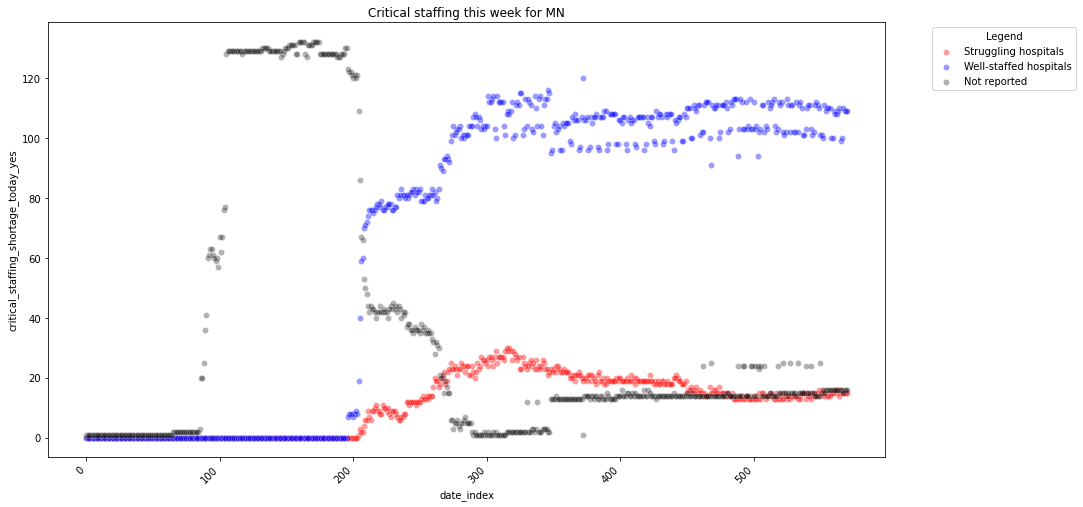

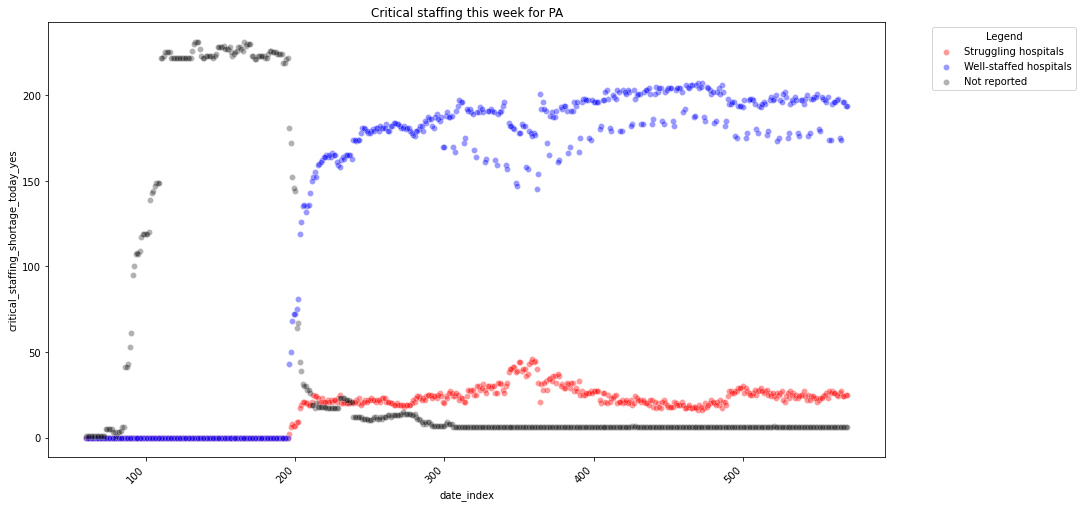

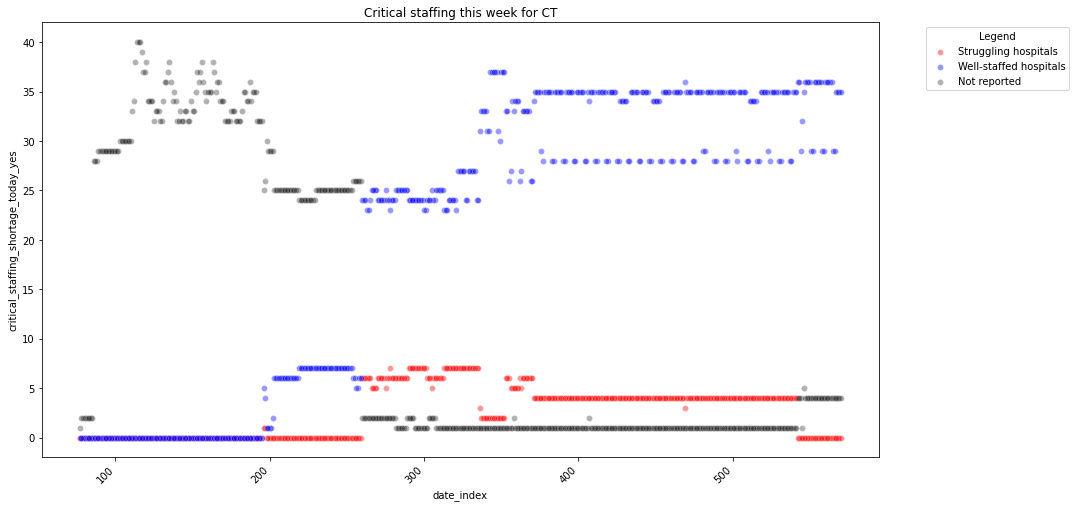

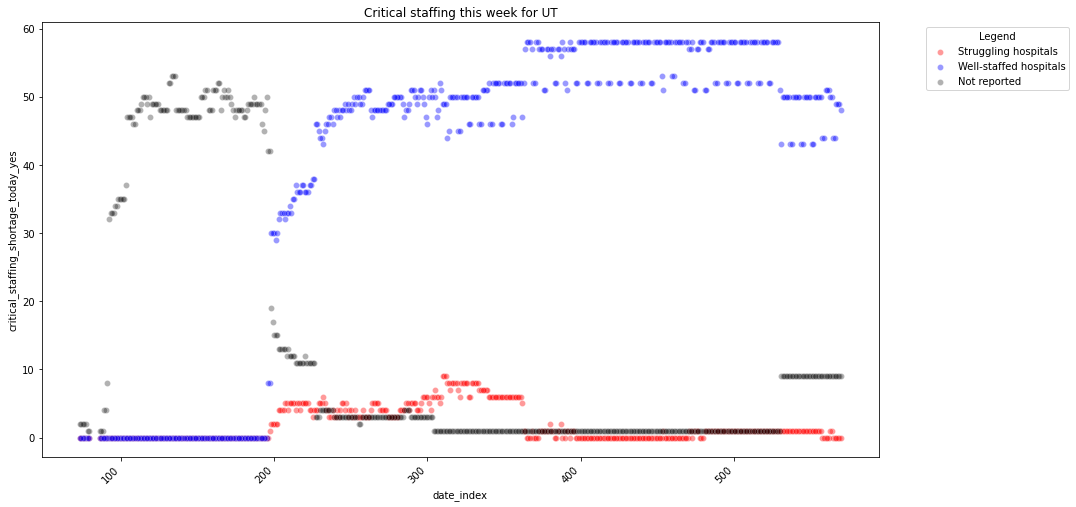

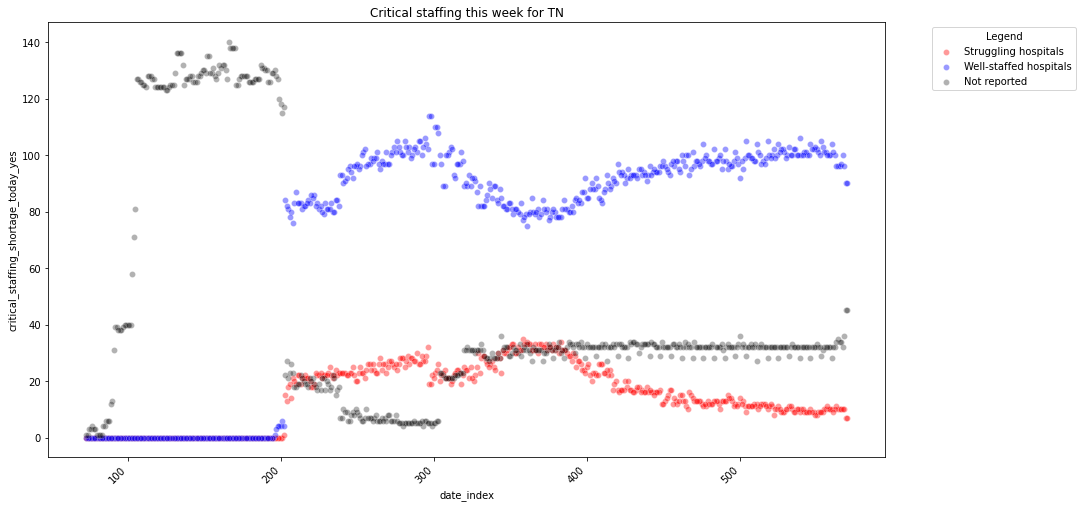

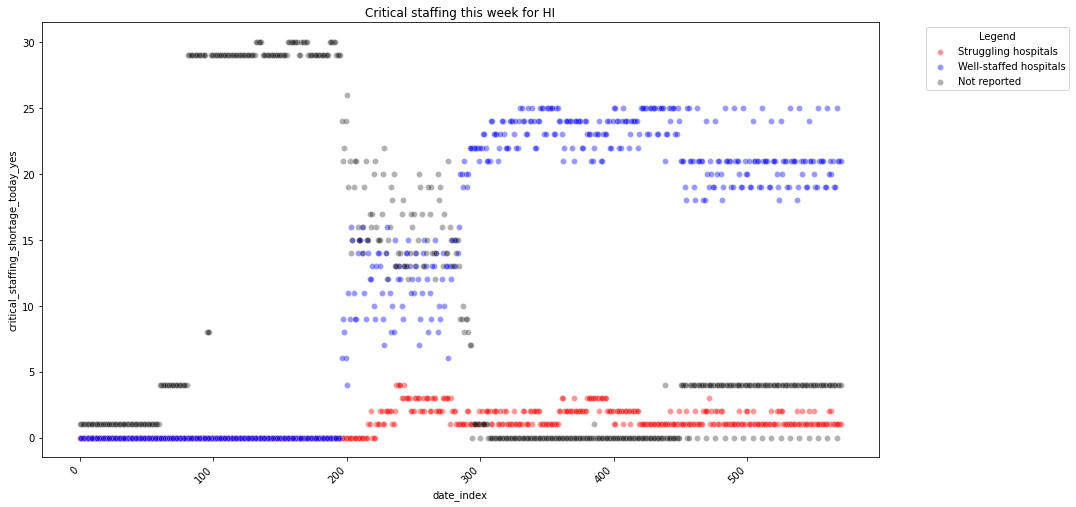

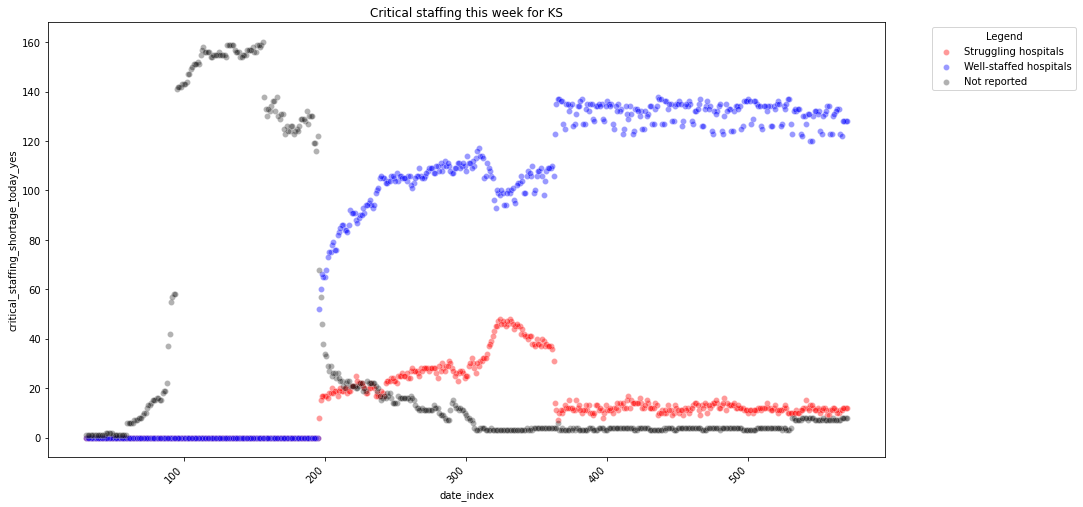

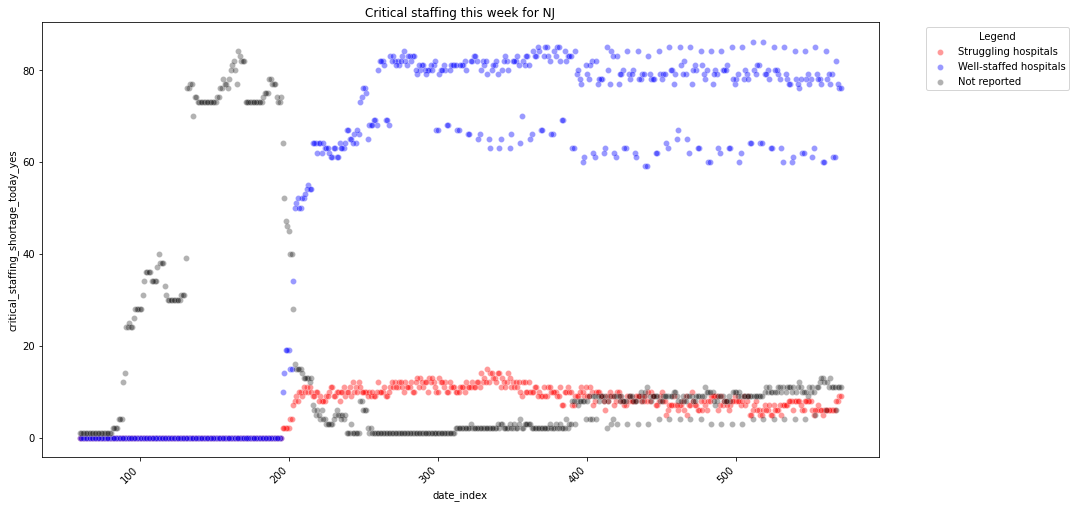

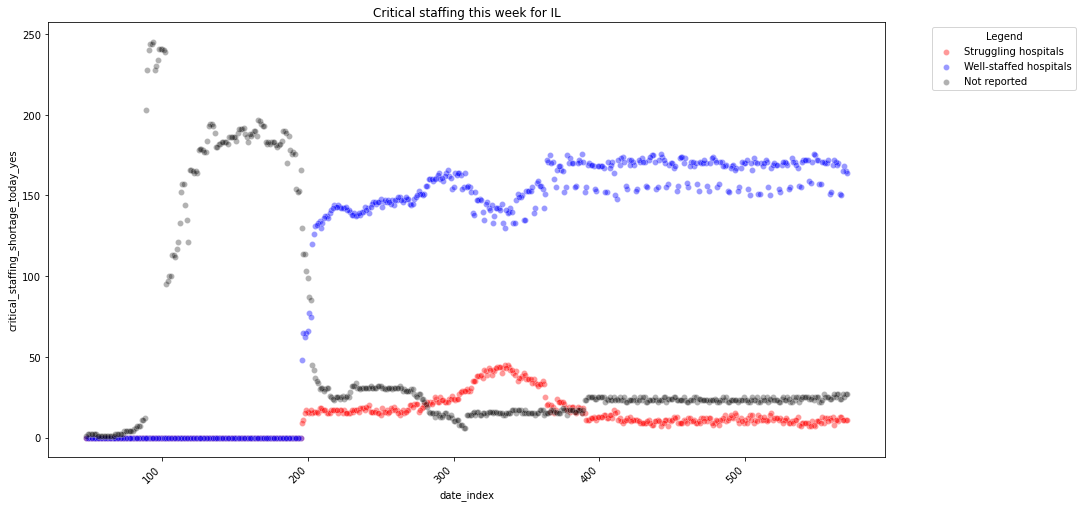

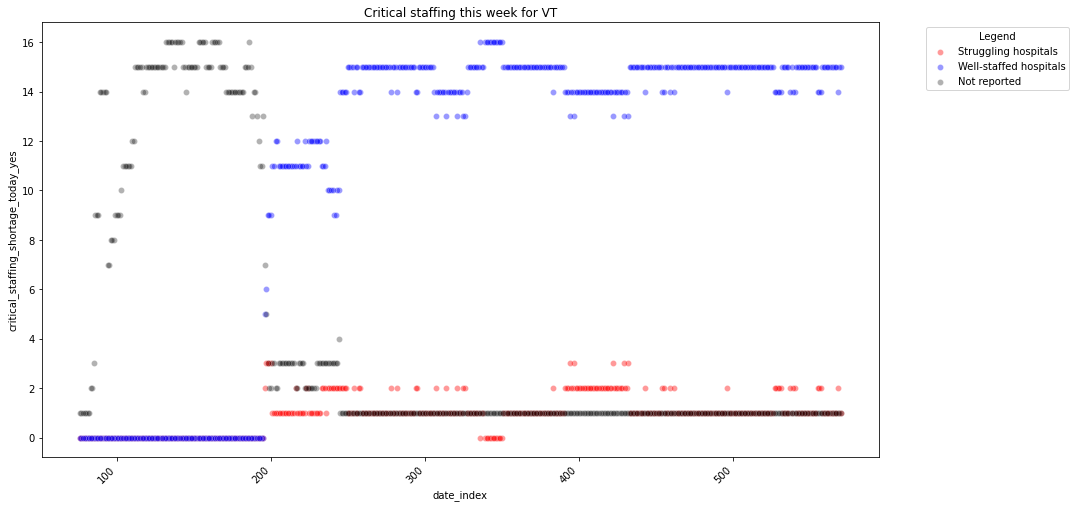

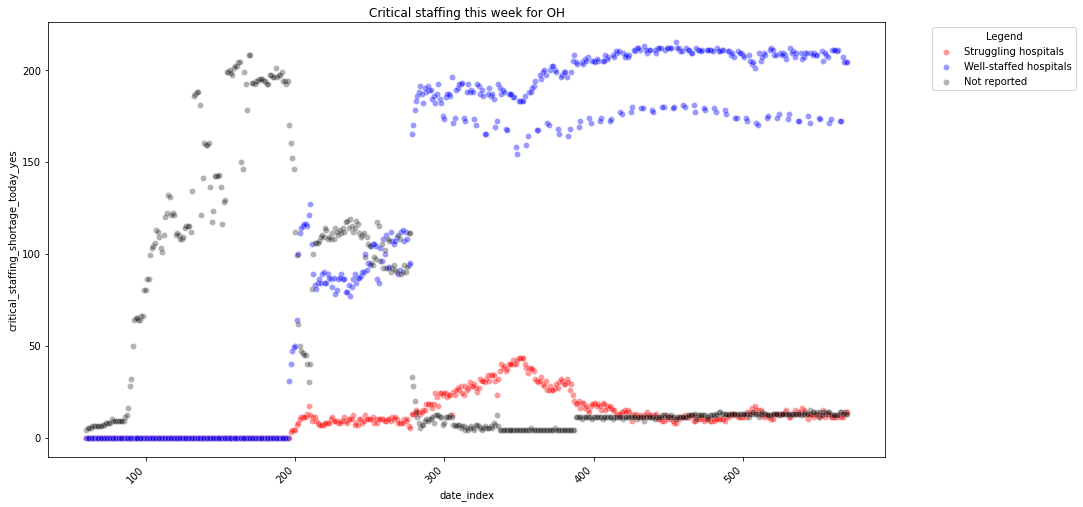

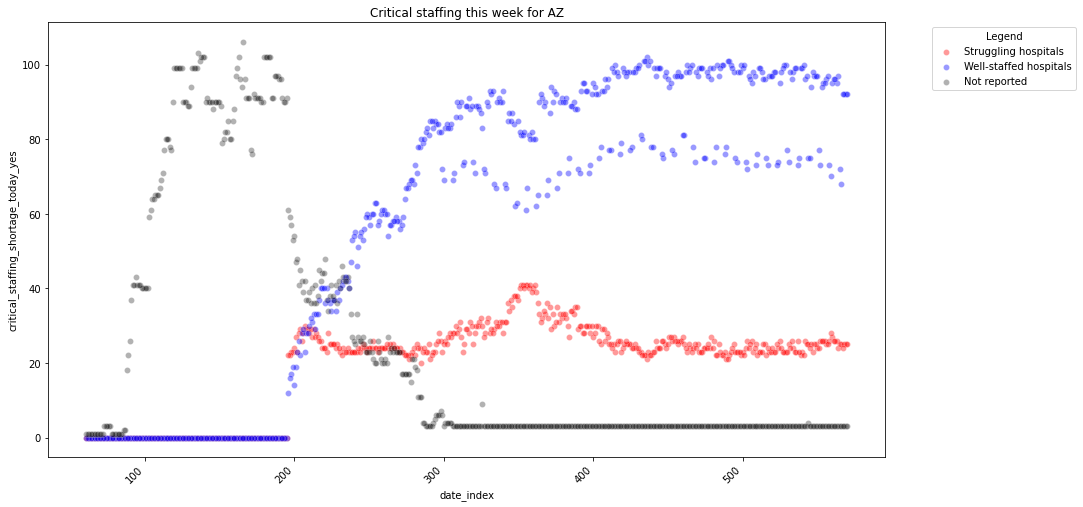

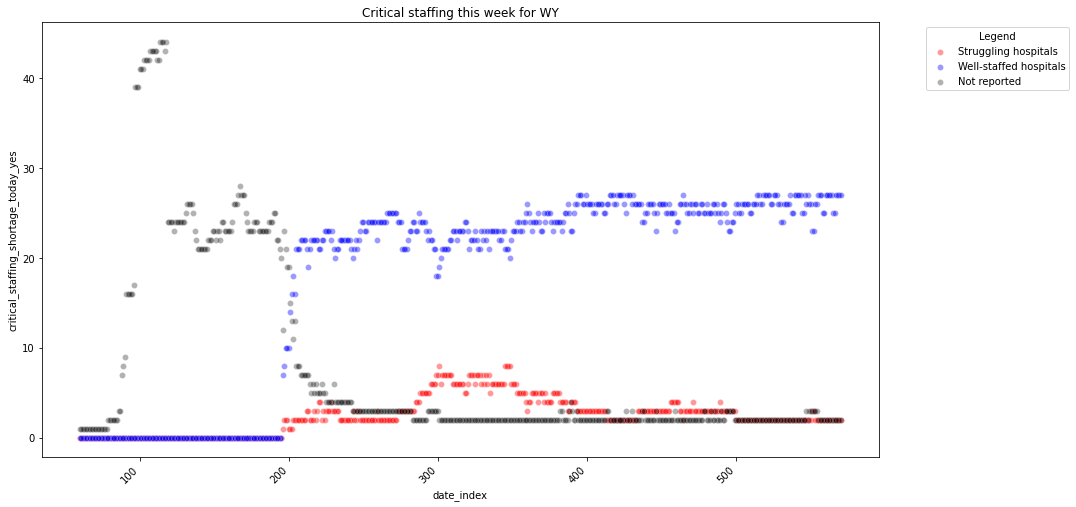

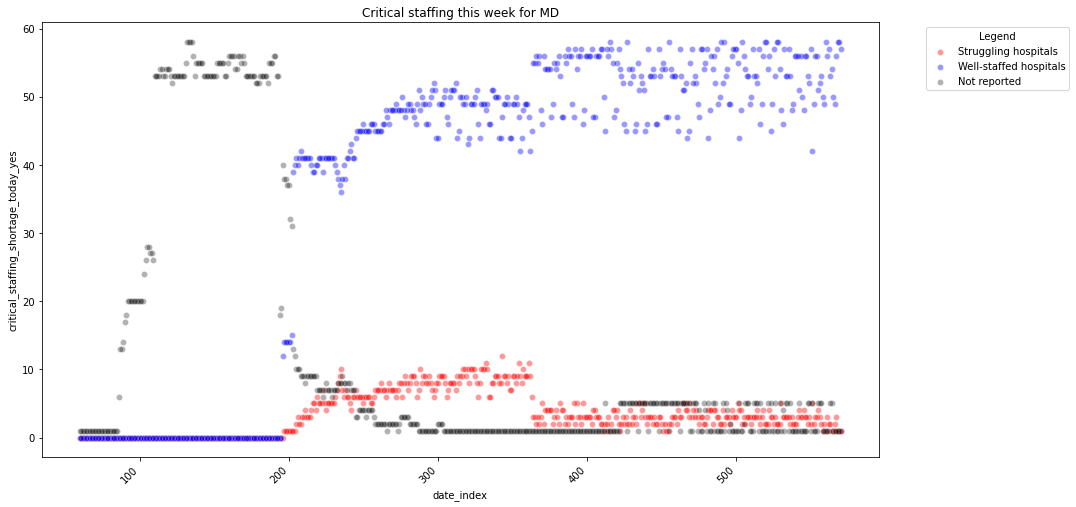

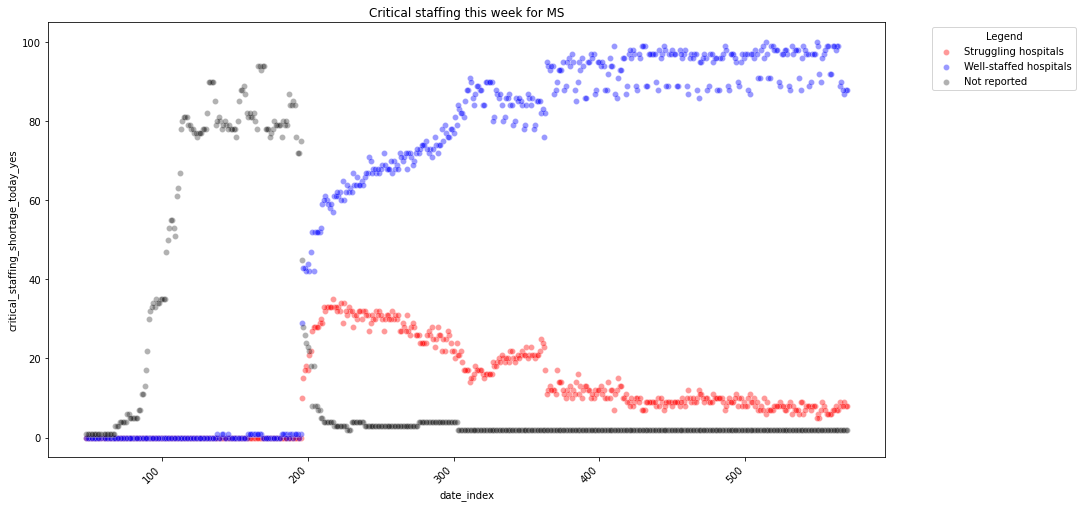

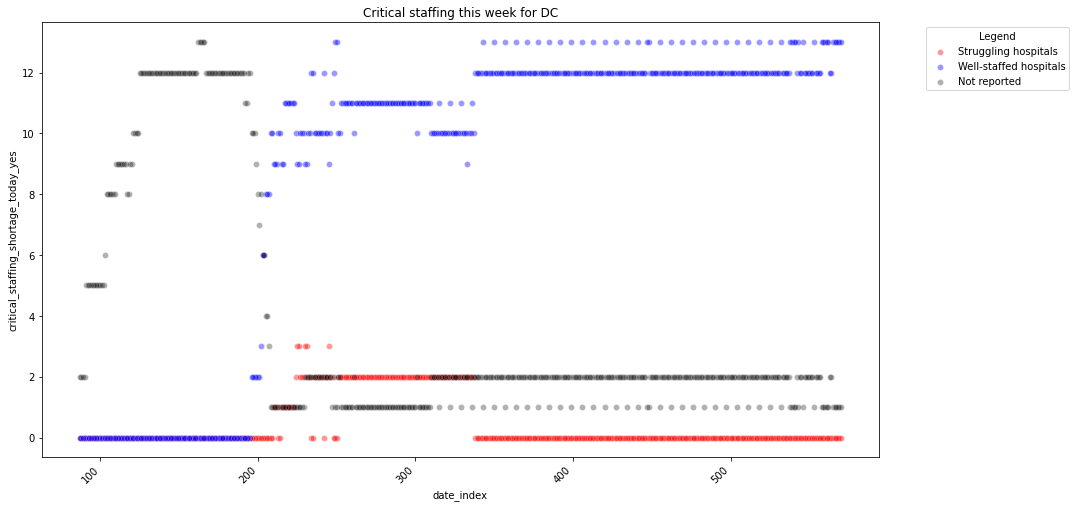

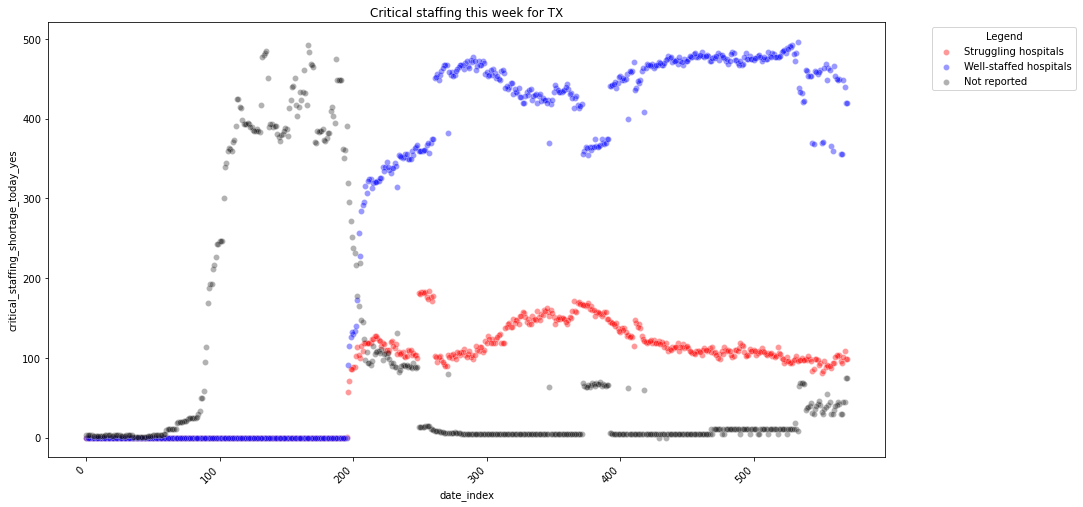

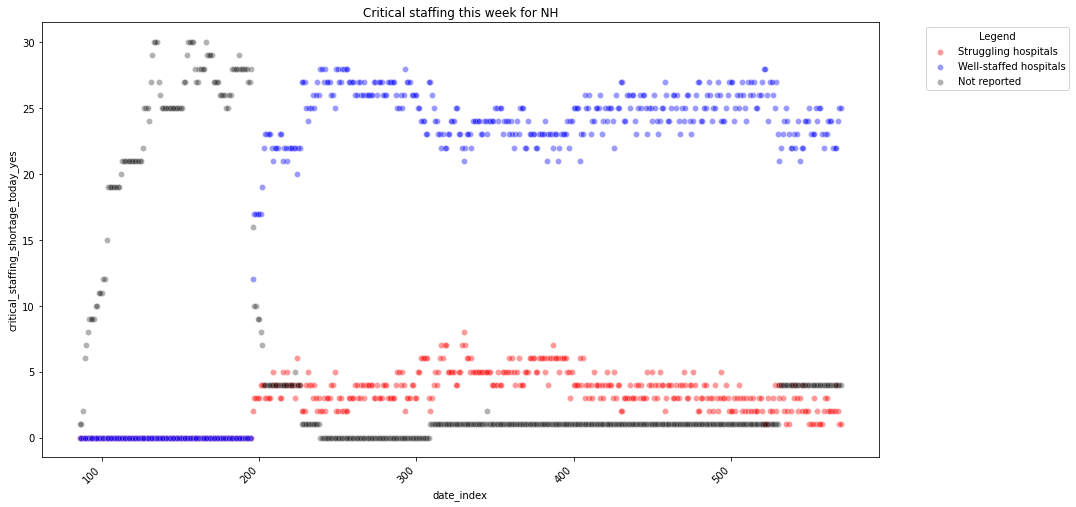

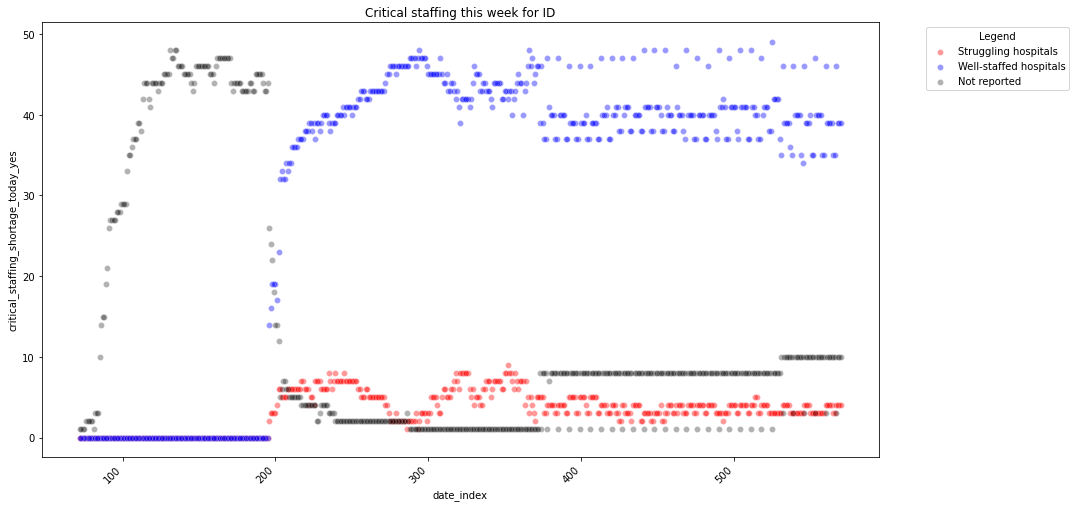

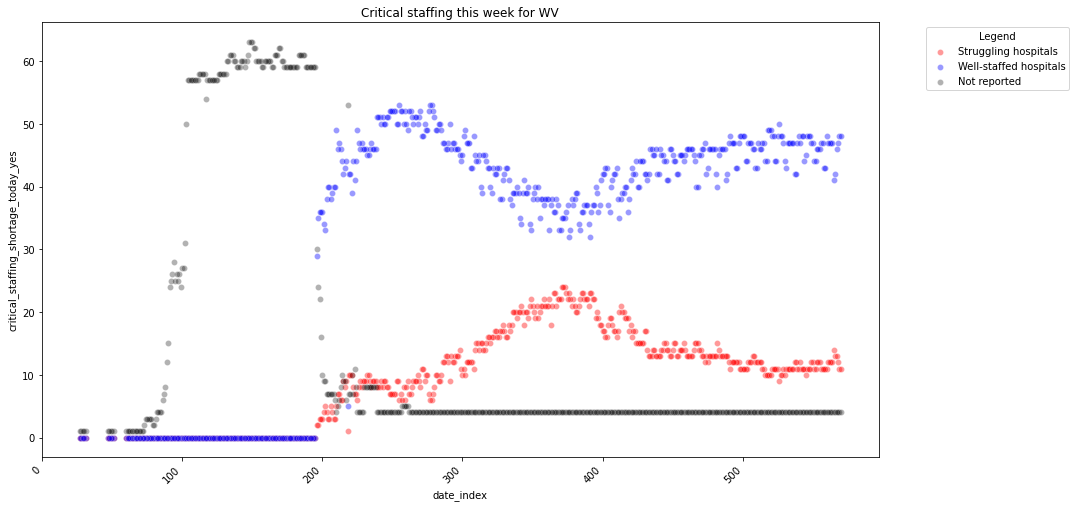

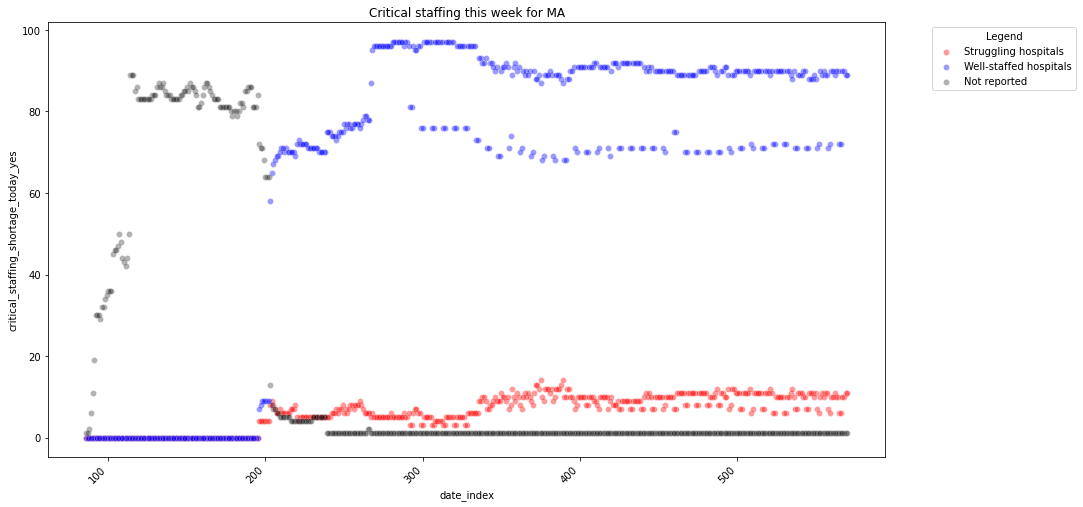

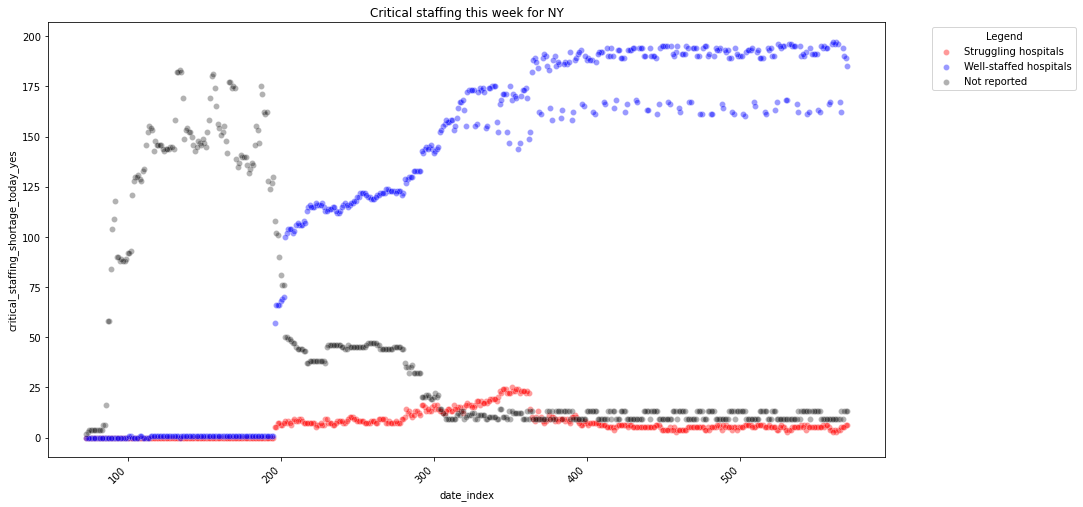

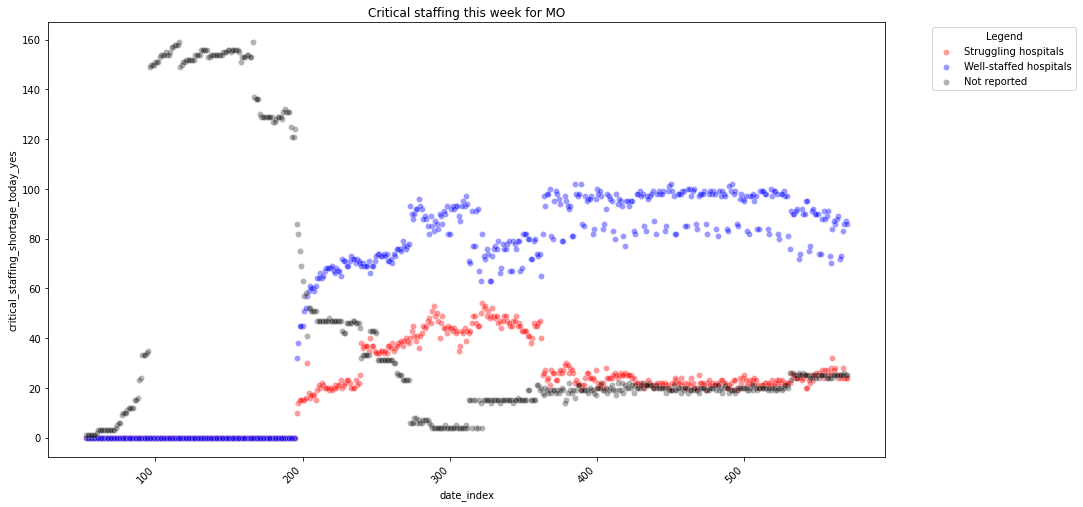

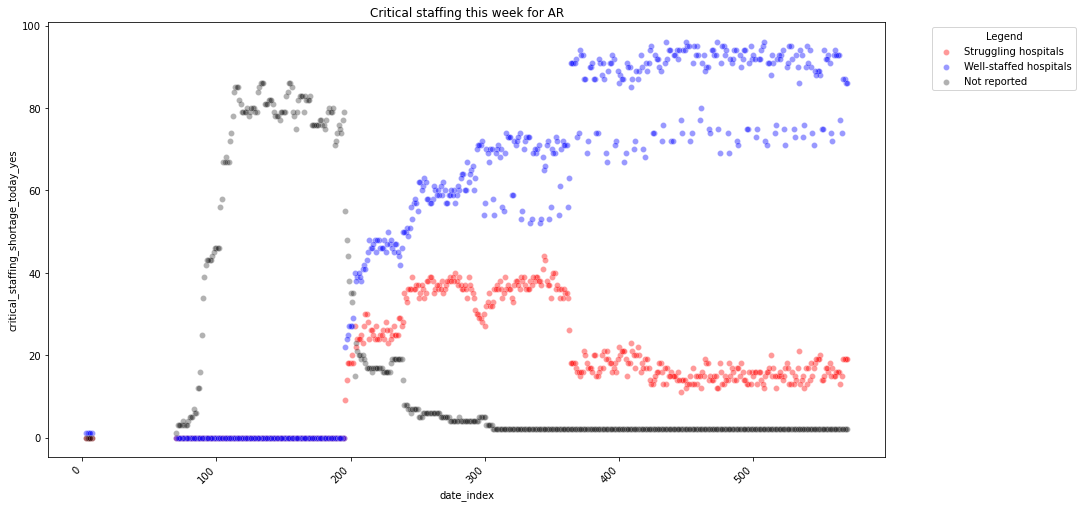

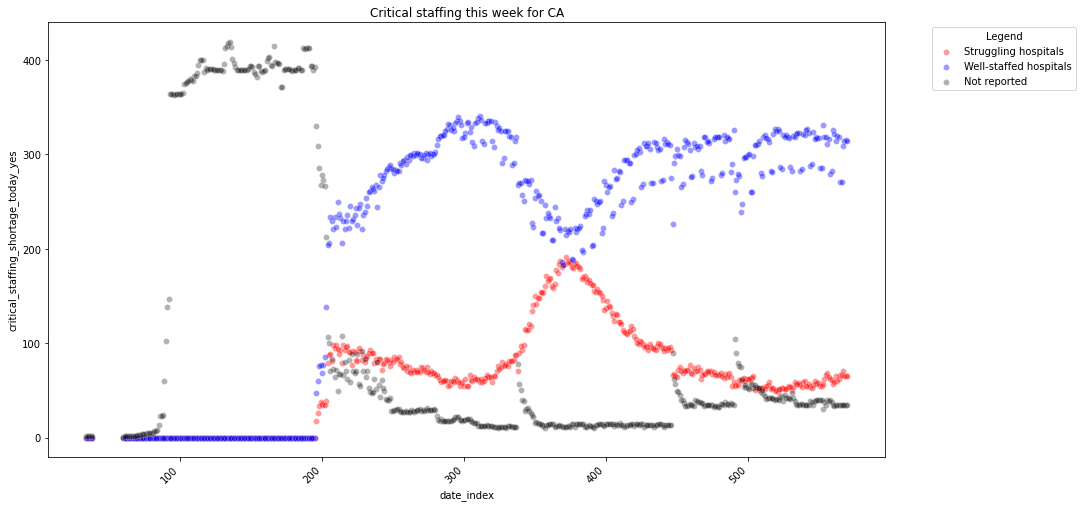

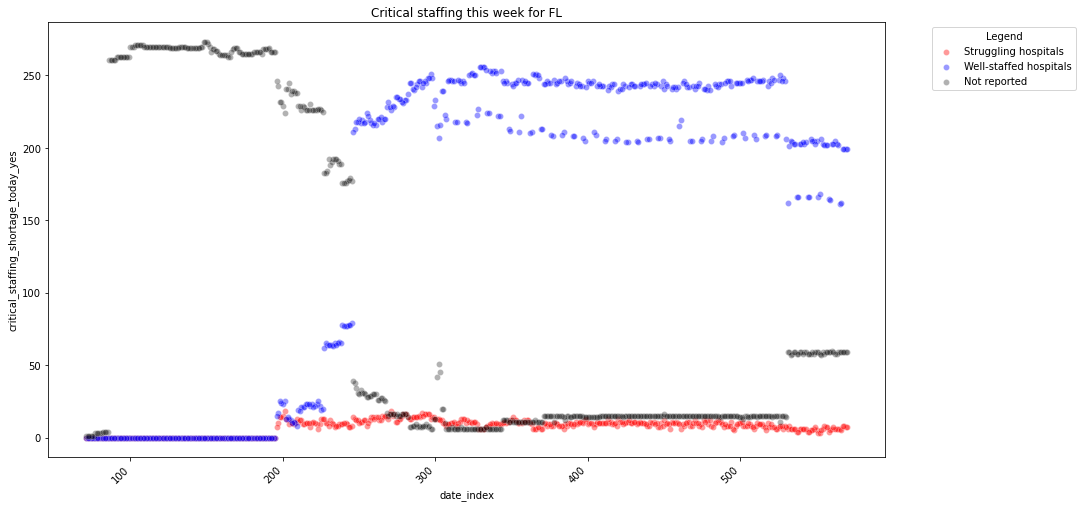

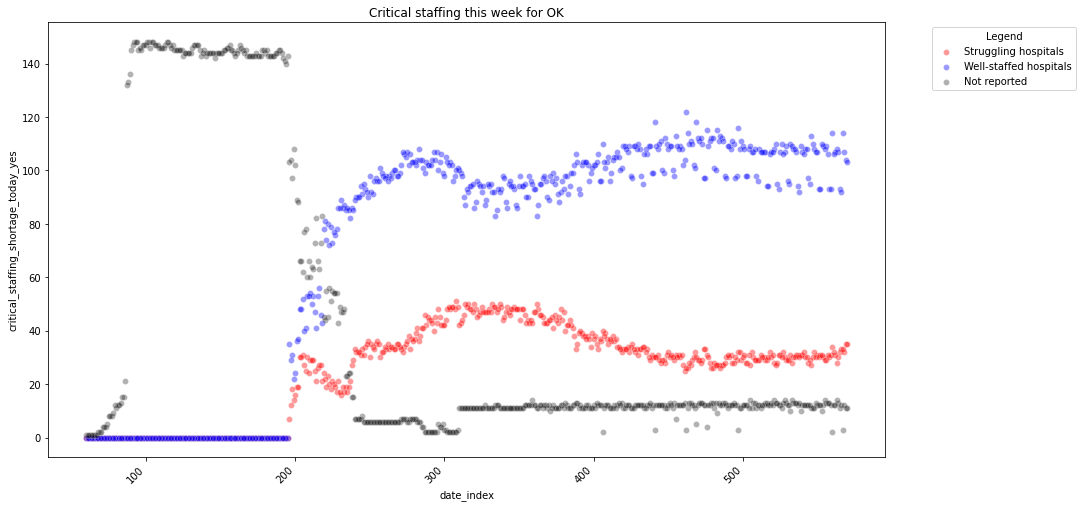

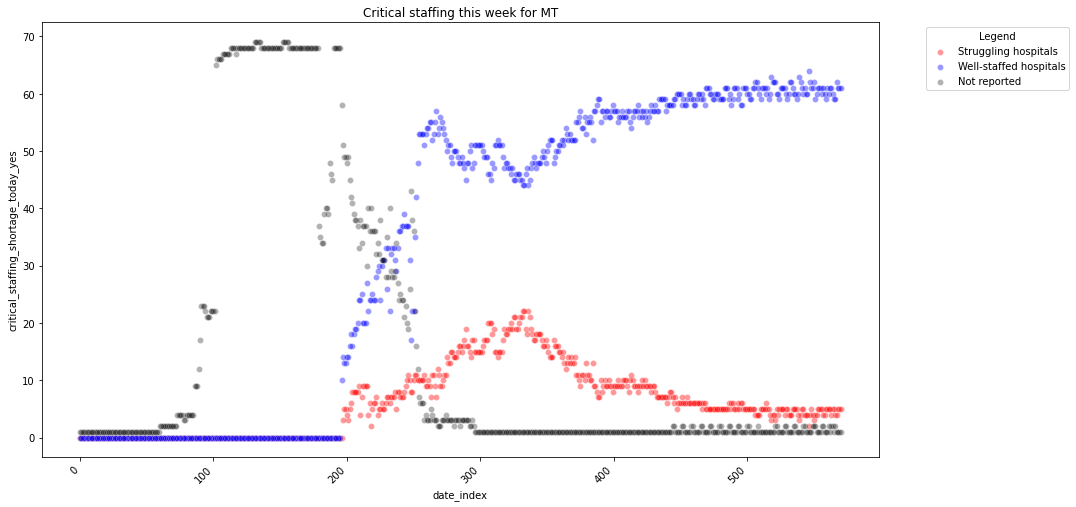

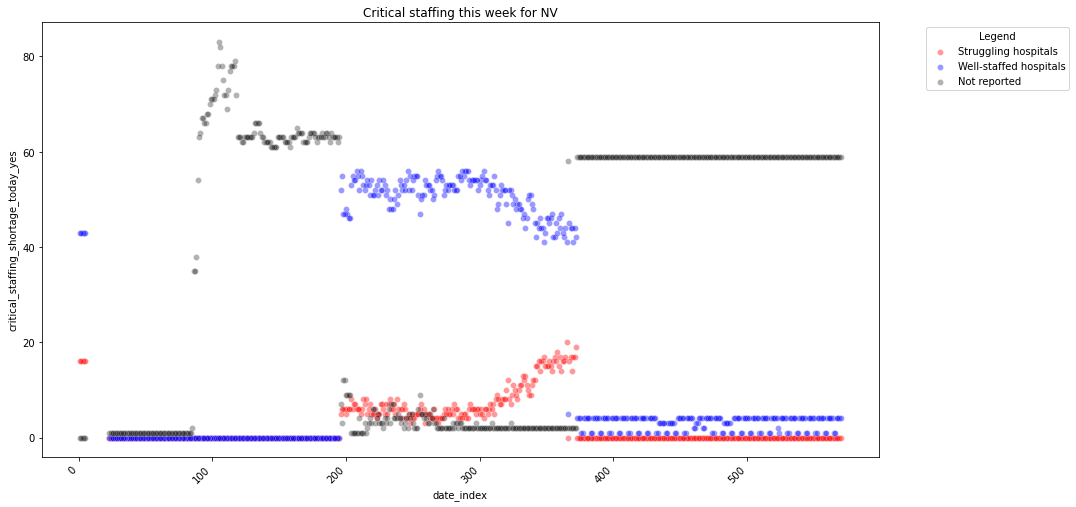

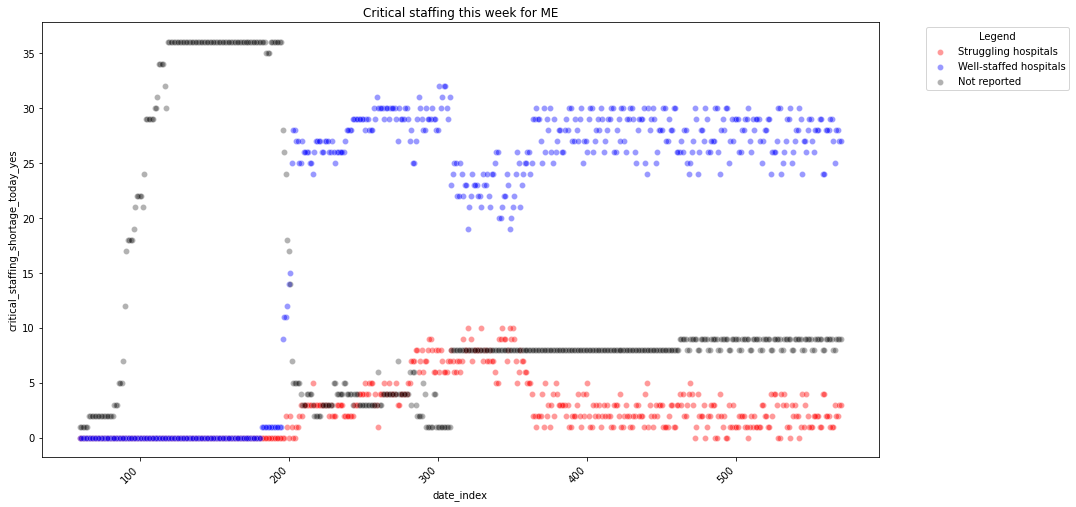

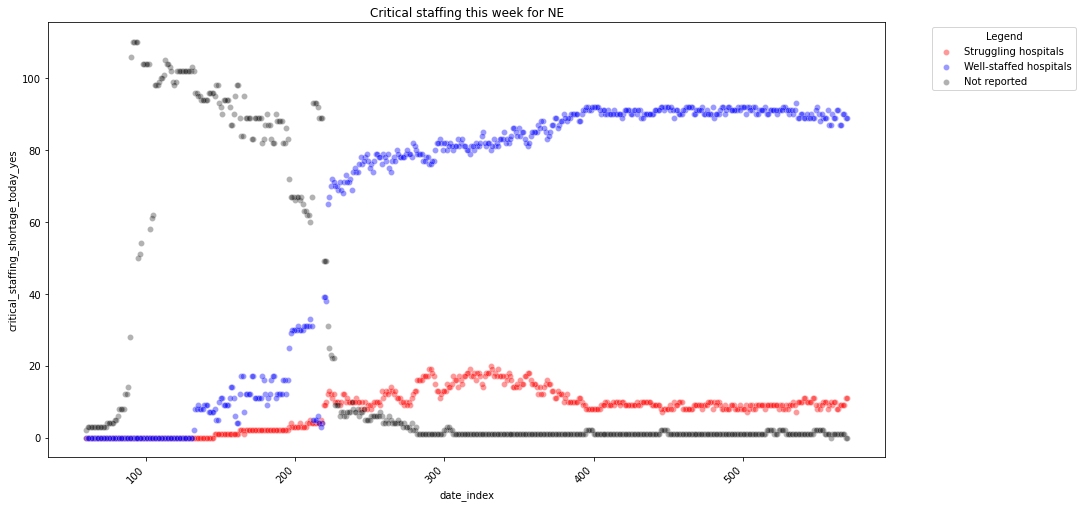

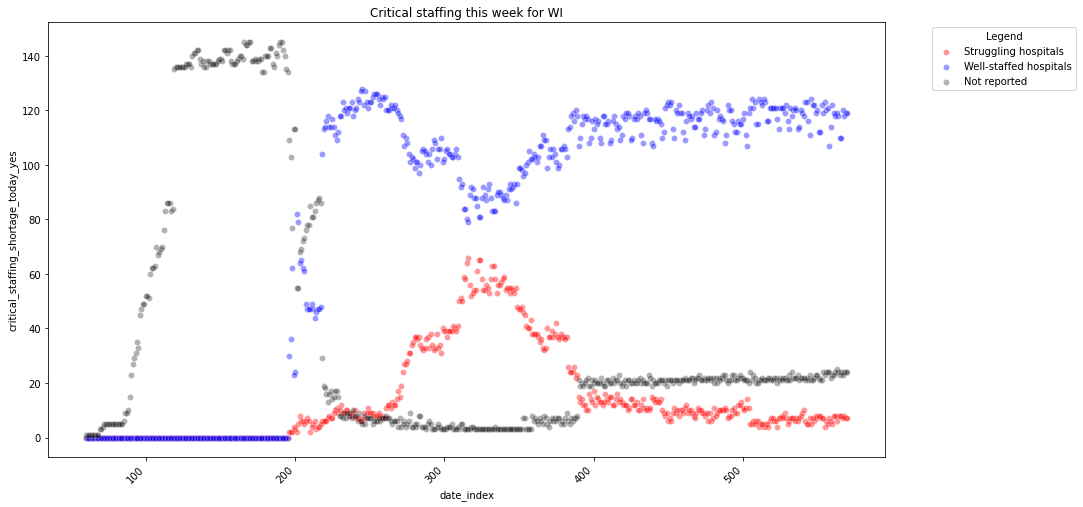

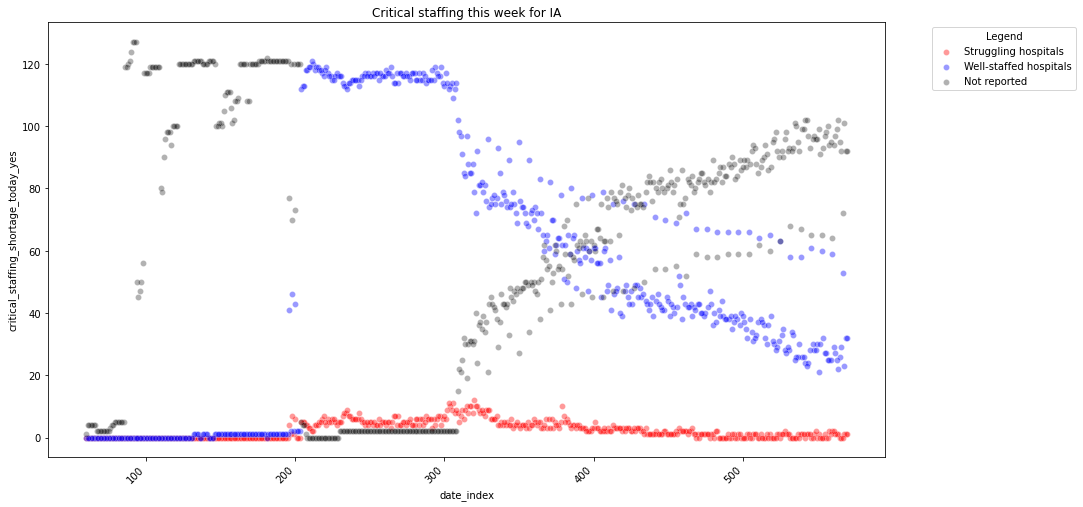

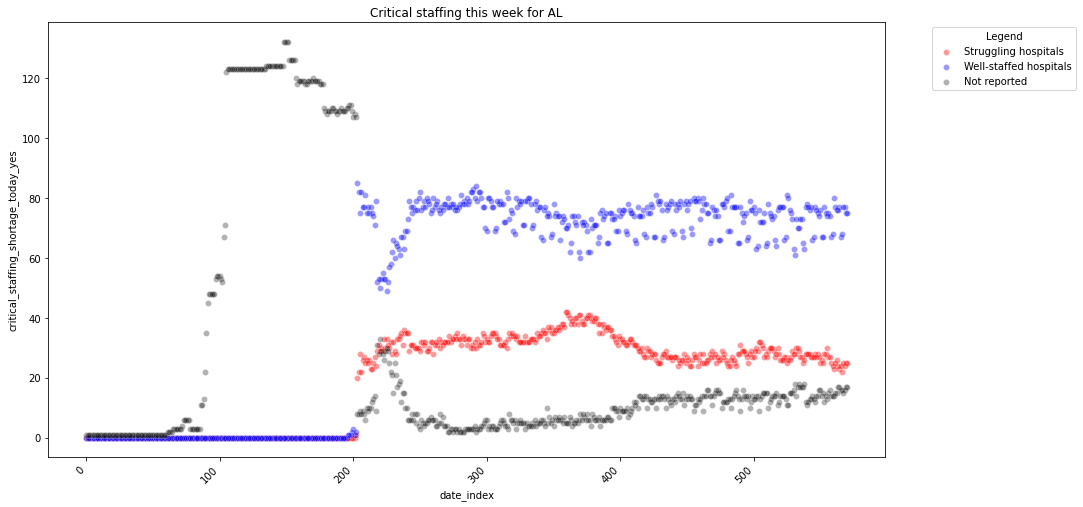

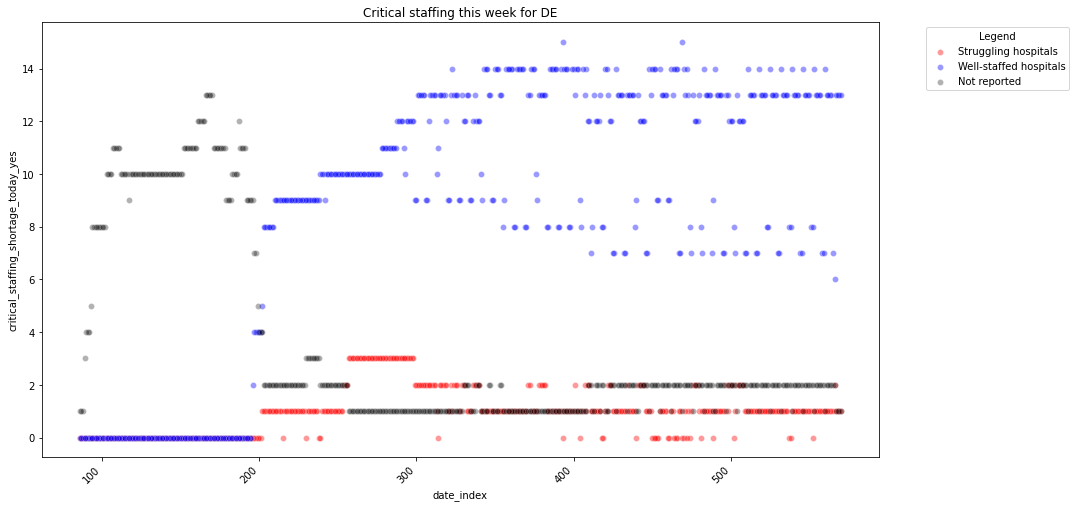

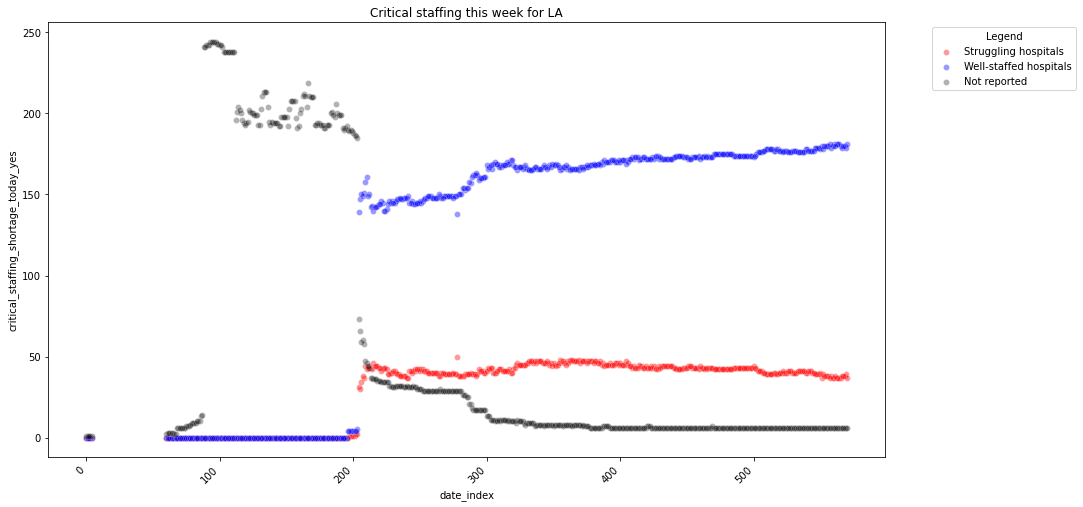

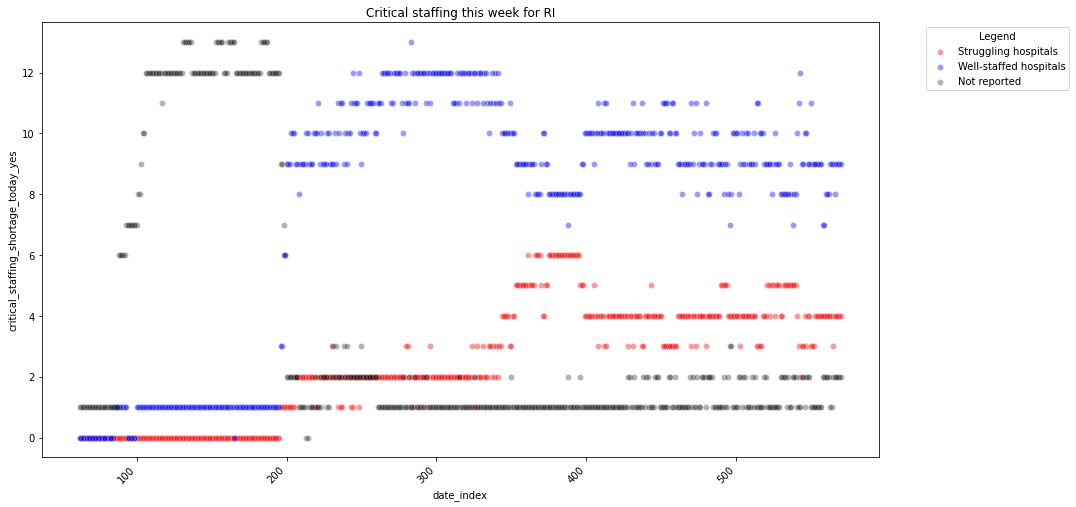

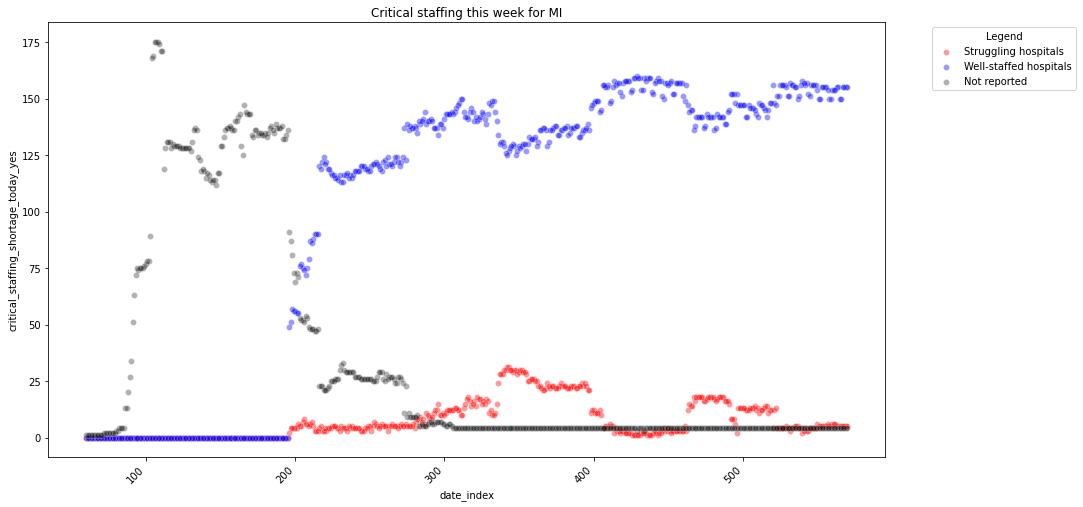

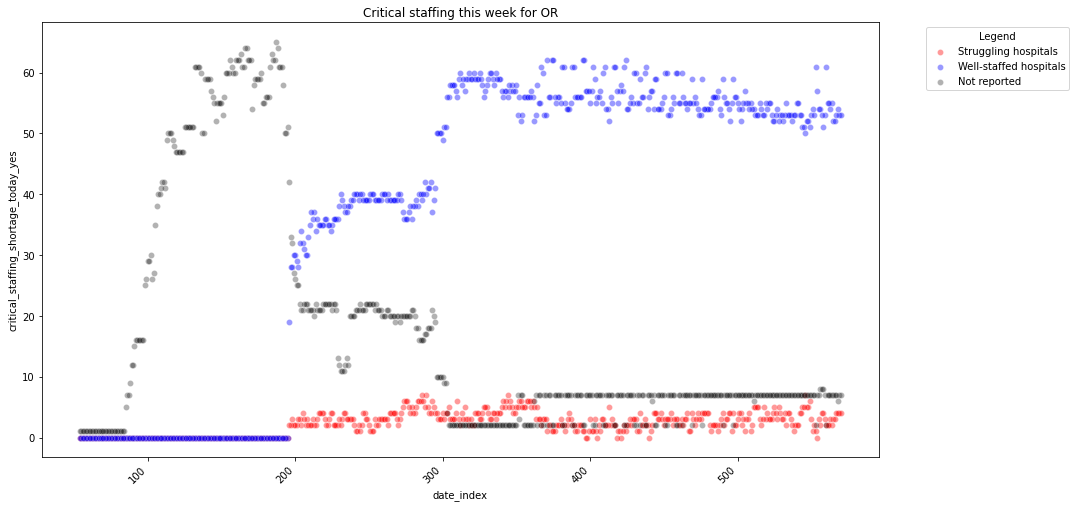

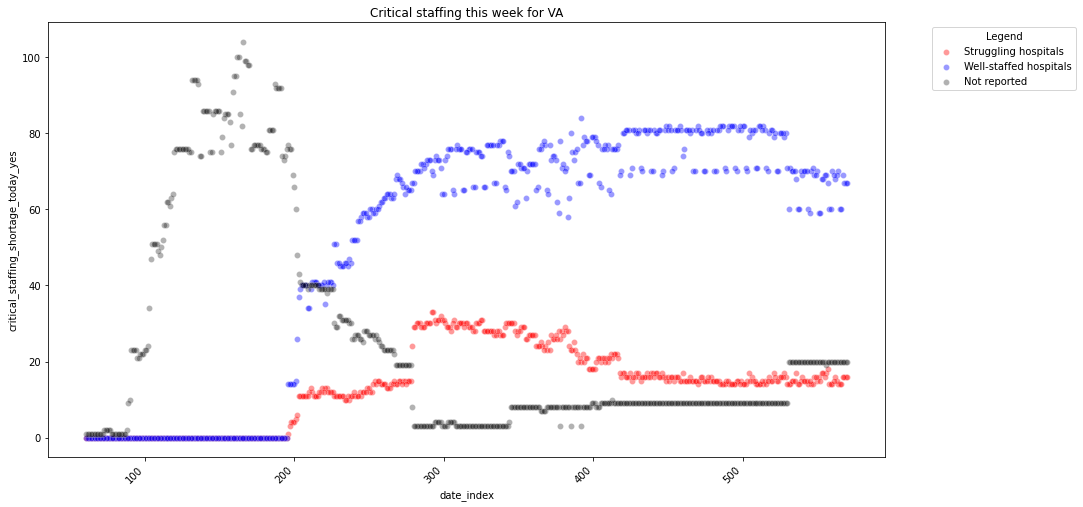

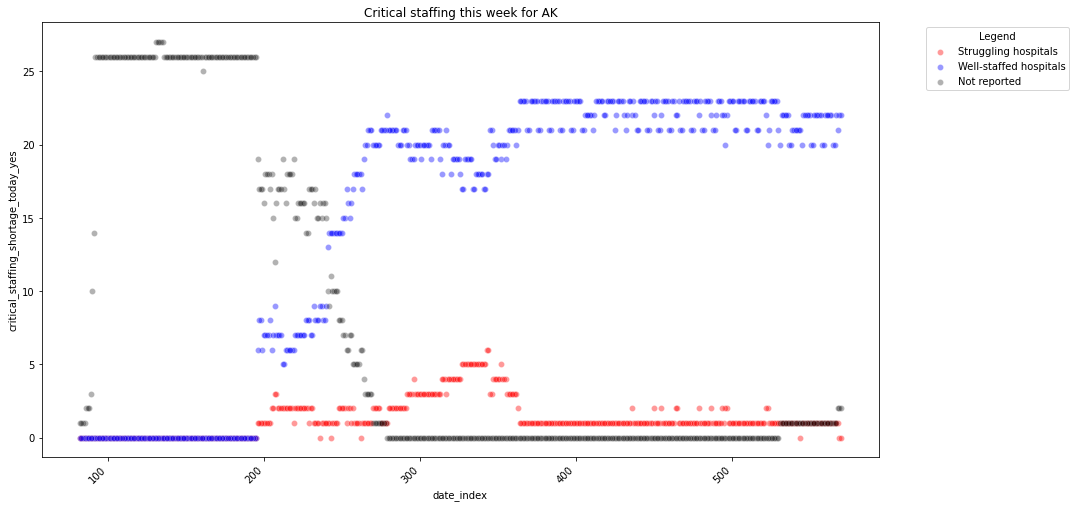

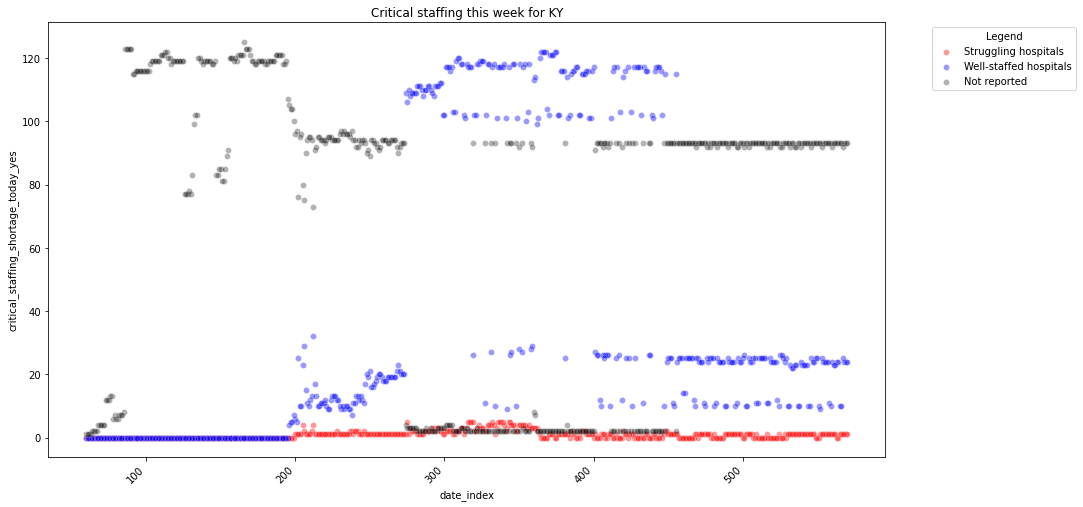

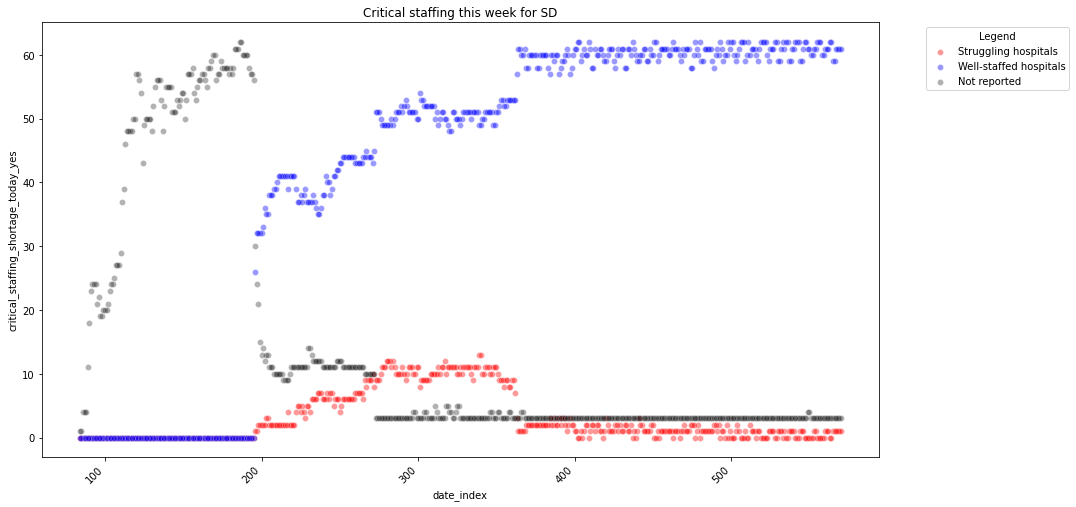

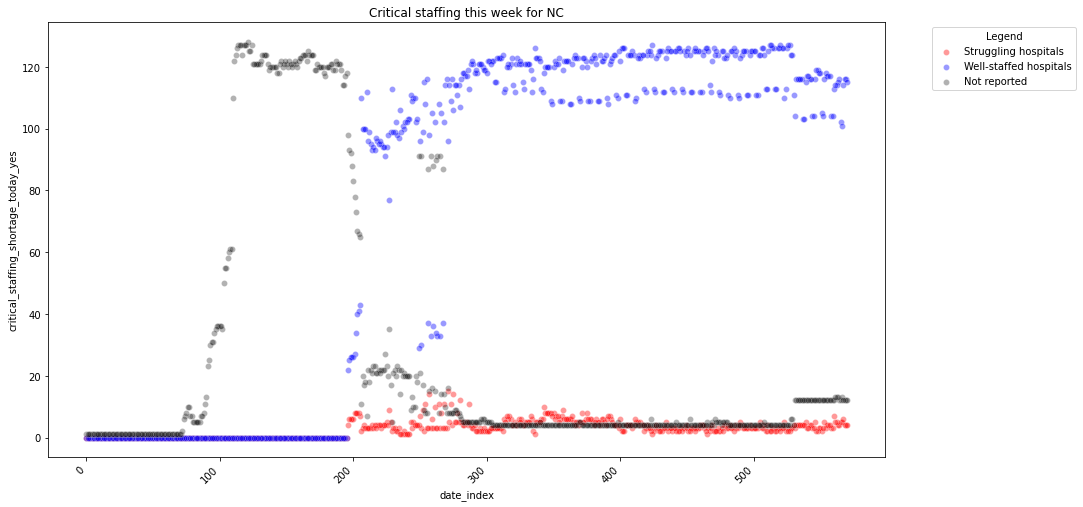

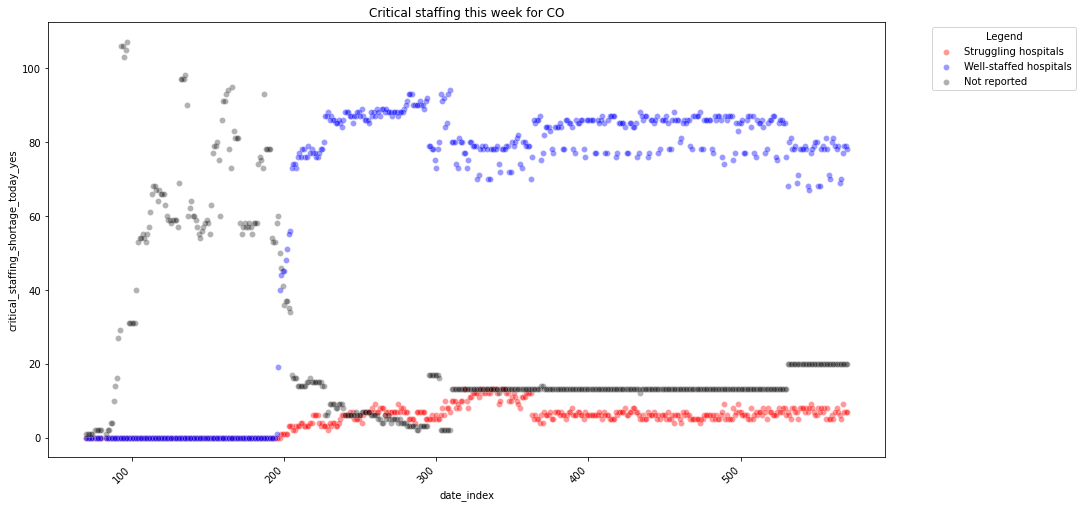

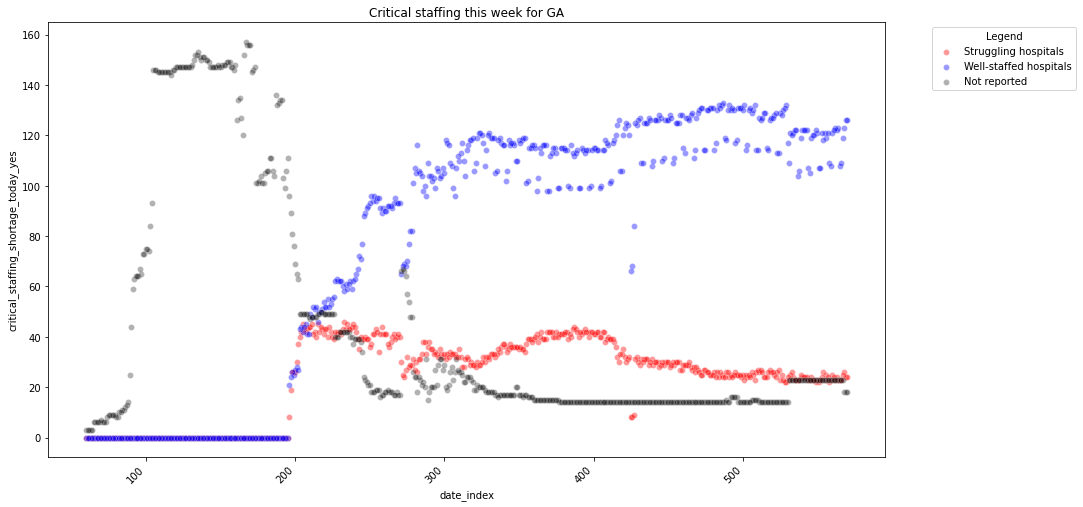

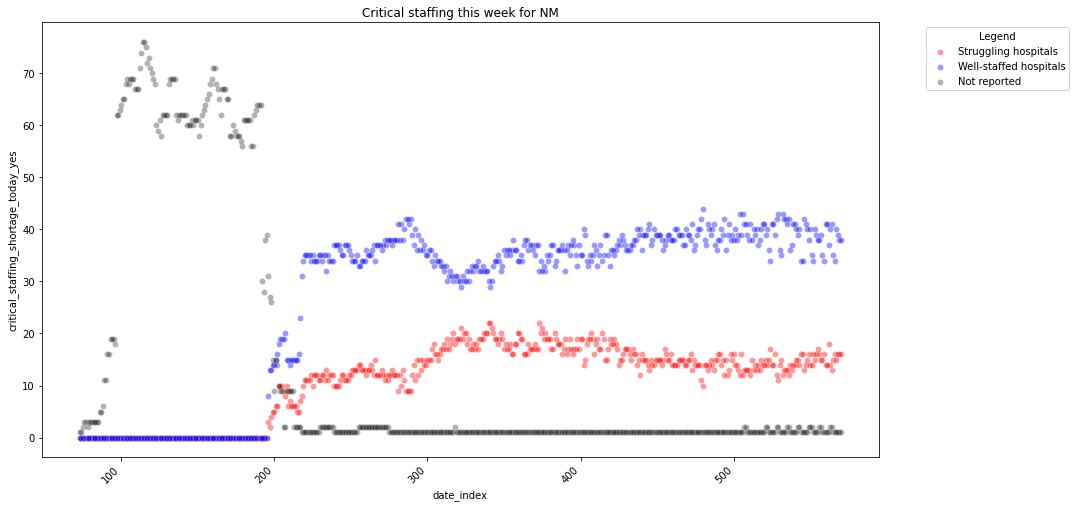

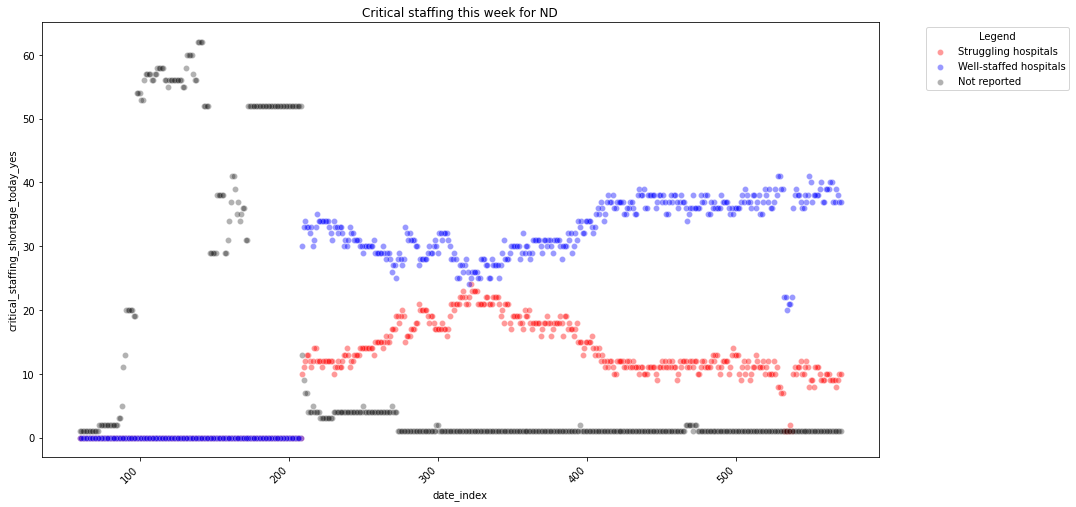

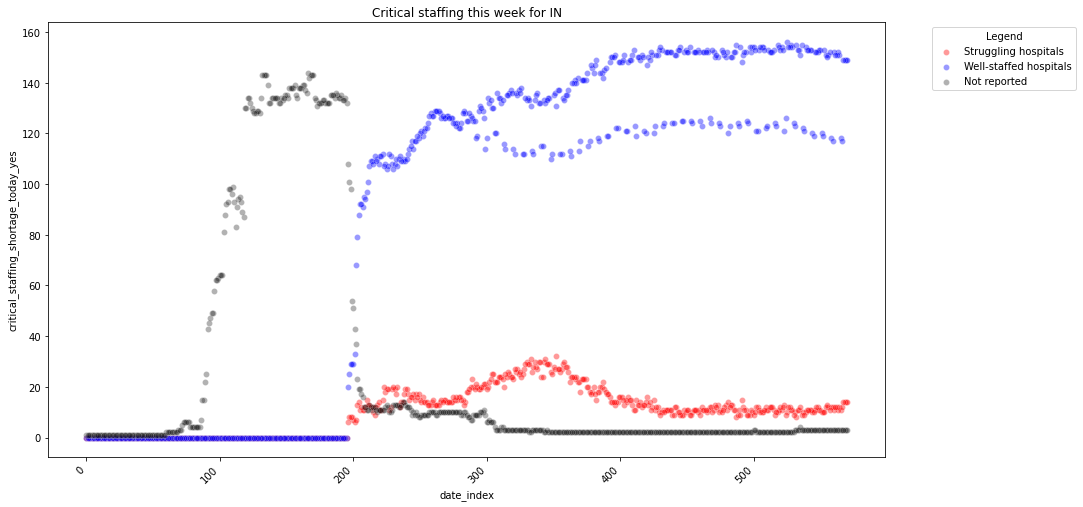

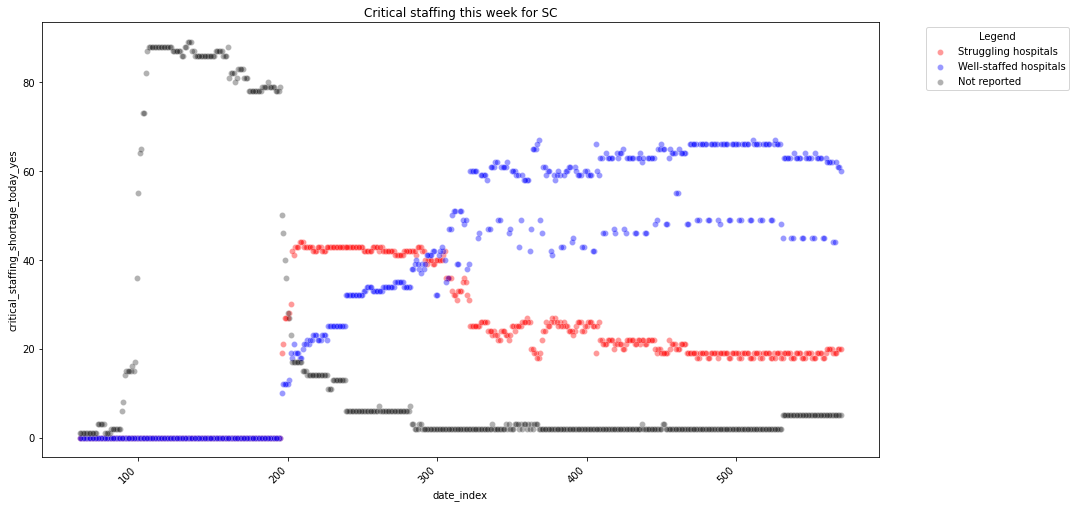

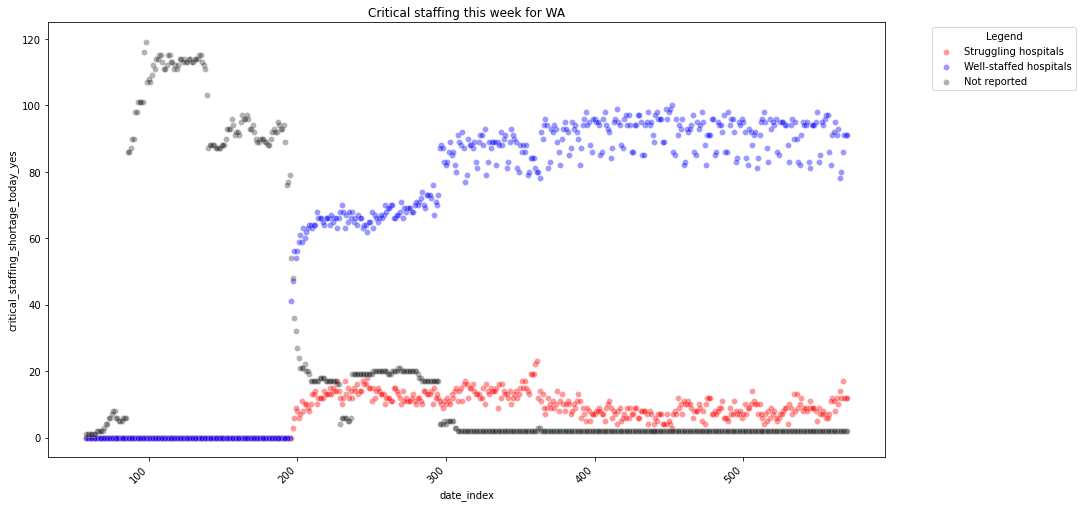

In [28]:
for state in states:
 title_a = 'Critical staffing this week for '
 title_b = title_a + state
 df_narrow = df4[df4['state']==state]
 plt.figure(figsize=(15,8))
 sns.scatterplot(data=df_narrow, x="date_index", y='critical_staffing_shortage_today_yes', color='red', alpha=0.4)
 sns.scatterplot(data=df_narrow, x='date_index', y='critical_staffing_shortage_today_no', color='blue', alpha=0.4)
 sns.scatterplot(data=df_narrow, x='date_index', y='critical_staffing_shortage_today_not_reported', color='black', alpha=0.3)
 plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left', labels =['Struggling hospitals', 'Well-staffed hospitals', 'Not reported'])
 plt.title(title_b) 
 plt.xticks(rotation=45, ha='right')
 plt.show()

Of particular interest for their response are the states:
AR - between 200 and 300 days the proportion of critical hospitals was close to 50% of the total hospitals.
NV - high proportion of hospitals stop reporting however was an upwards trend in hospitals with crisis.
SC - between day 200 and 300 there was a markedly higher proportion of struggling hospitals.
CA - Between 300-400 days, the number of hospitals struggling almost surpassed the number of hospitals safe.
ND - similar to CA.
IA - post 300 days we see a large decline in safe hospitals and a corresponding rise in unreported hospitals. It is important to note that we do not know if the rise in unreported hospitals is linked to an increase in pressures or whether hospitals merely stopped reporting.
To investigate IA and others closer we can map on the deaths per day.

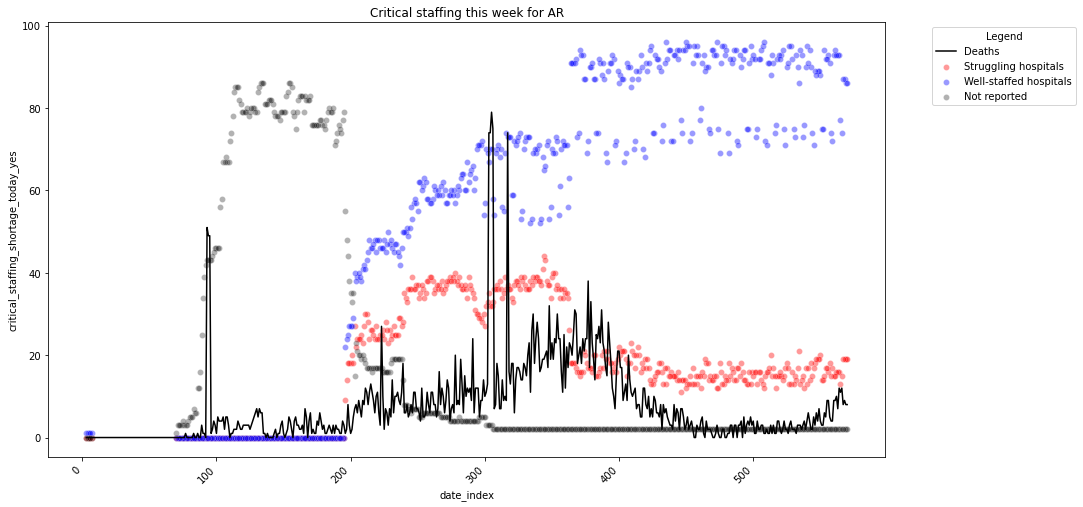

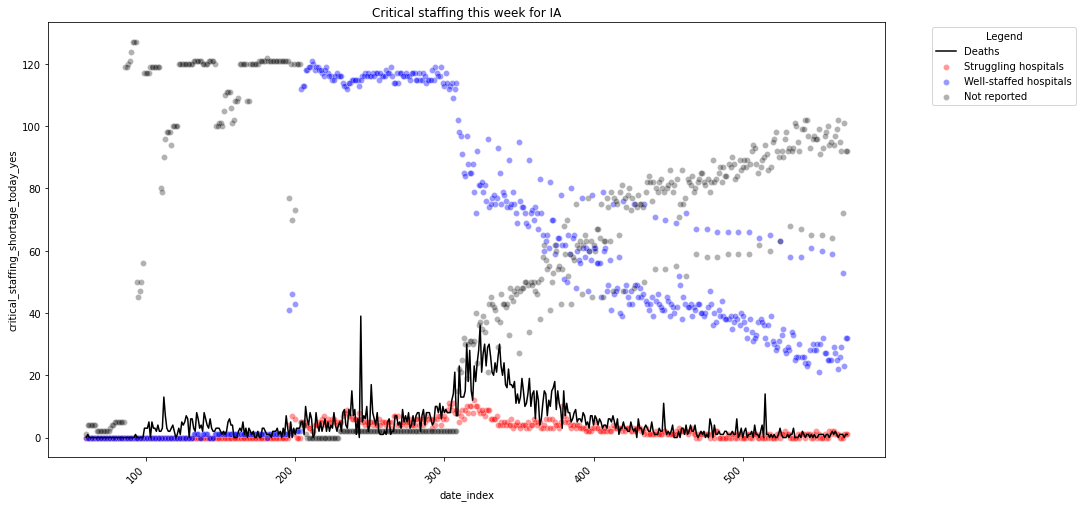

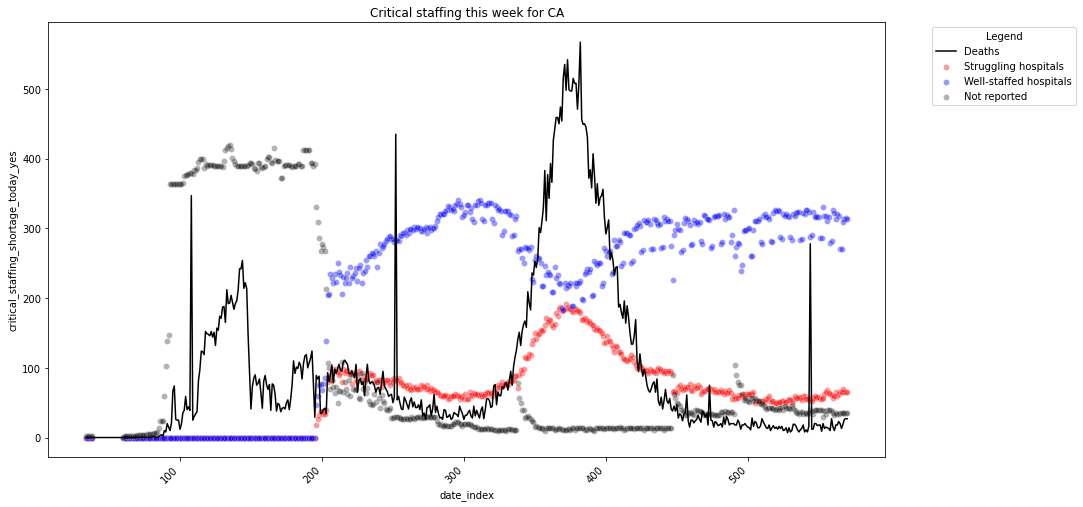

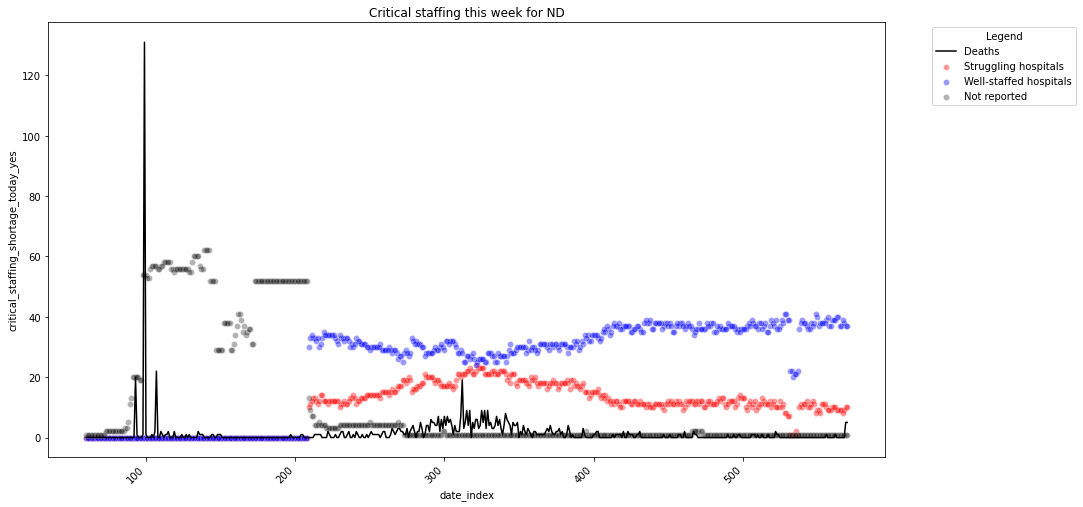

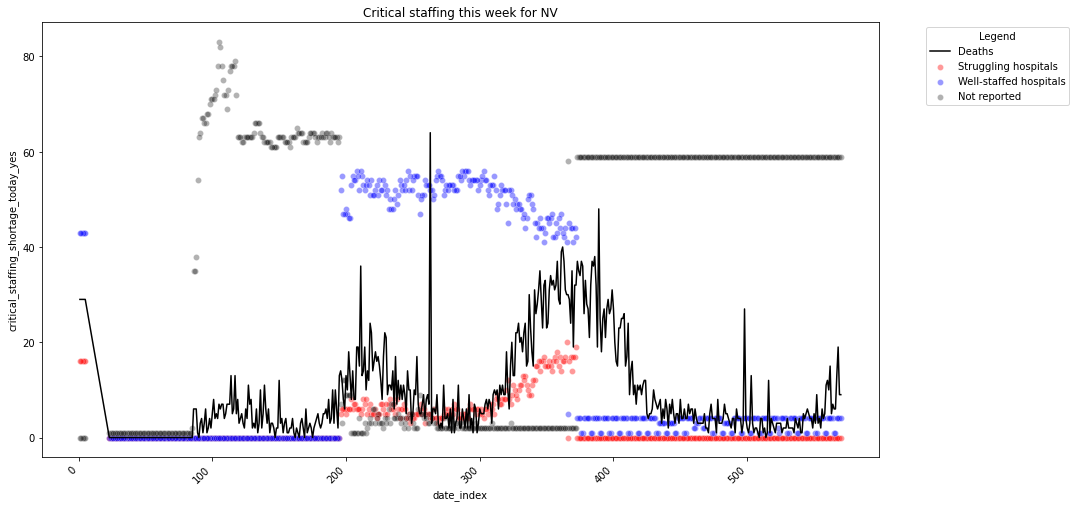

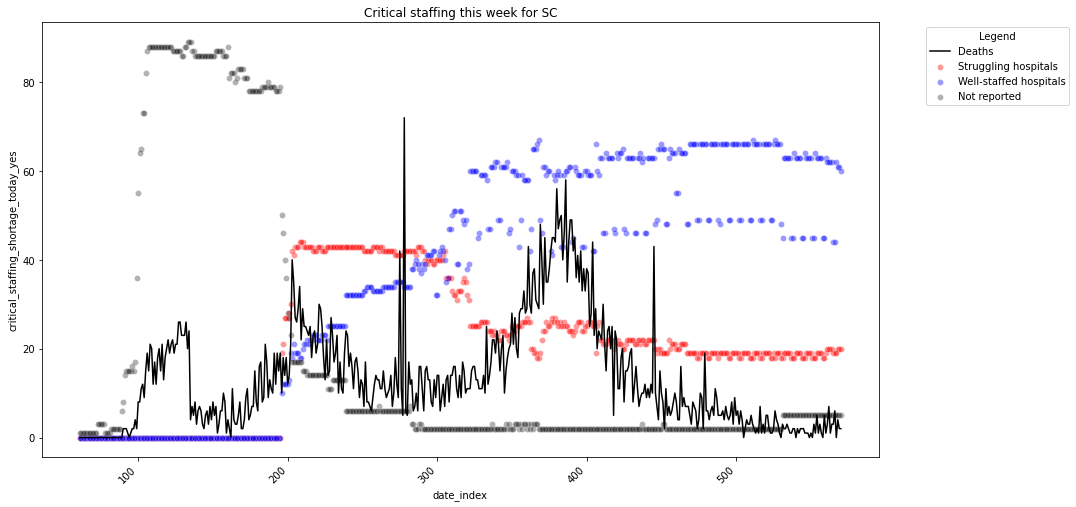

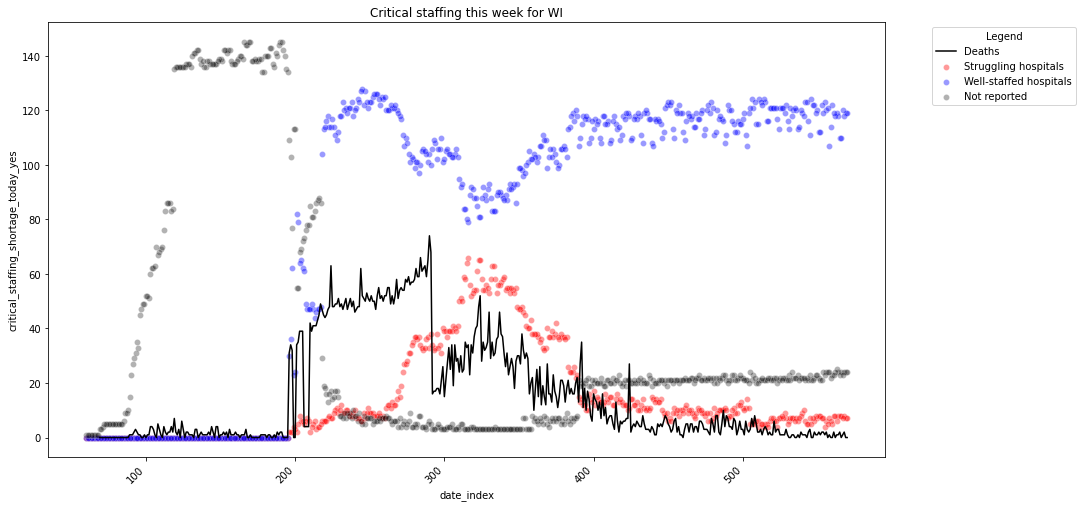

In [29]:
states2 = ['AR', 'IA', 'CA', 'ND', 'NV', 'SC', 'WI']
for state in states2:
 title_a = 'Critical staffing this week for '
 title_b = title_a + state
 df_narrow = df4[df4['state']==state]
 plt.figure(figsize=(15,8))
 sns.scatterplot(data=df_narrow, x="date_index", y='critical_staffing_shortage_today_yes', color='red', alpha=0.4)
 sns.scatterplot(data=df_narrow, x='date_index', y='critical_staffing_shortage_today_no', color='blue', alpha=0.4)
 sns.scatterplot(data=df_narrow, x='date_index', y='critical_staffing_shortage_today_not_reported', color='black', alpha=0.3)
 sns.lineplot(data=df_narrow, x='date_index', y='deaths_covid', color="black")
 plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left', labels =['Deaths', 'Struggling hospitals', 'Well-staffed hospitals', 'Not reported'])
 plt.title(title_b) 
 plt.xticks(rotation=45, ha='right')
 plt.show()

Given the delay between the peak of deaths (around day 360) and the falling of the peak (approximately 390), along with the stopping of reporting (around 375), I would suggest the trend of an increasing number of unsafe hospitals probably continued, however, the data is lacking to confirm this.

In [30]:
def raw_death_per_range(early, late, df):
 df_early_late = df[(df['date_index']>early) & (df['date_index']<late)]
 plt.figure(figsize=(20,8))
 sns.boxplot(data=df_early_late, x='state', y='deaths_covid')
 plt.show()

median number of deaths per state per date


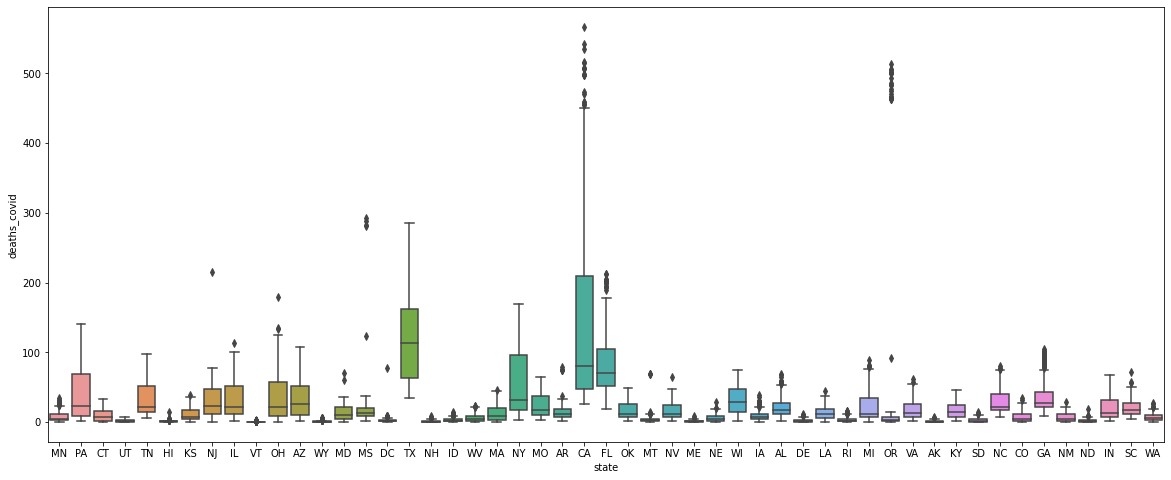

In [31]:
print("median number of deaths per state per date")
raw_death_per_range(200, 450, df4)


The huge changes in death could be due to population discrepancies. To assess this I obtained census data and looked at the number of deaths as a proportion of population.


In [32]:
def prop_death_per_range(early, late, df):
 df_early_late = df[(df['date_index']>early) & (df['date_index']<late)]
 plt.figure(figsize=(20,8))
 sns.boxplot(data=df_early_late, x='state', y='death_proportion')
 plt.title("Median deaths per day as prop of population per state")
 plt.show()

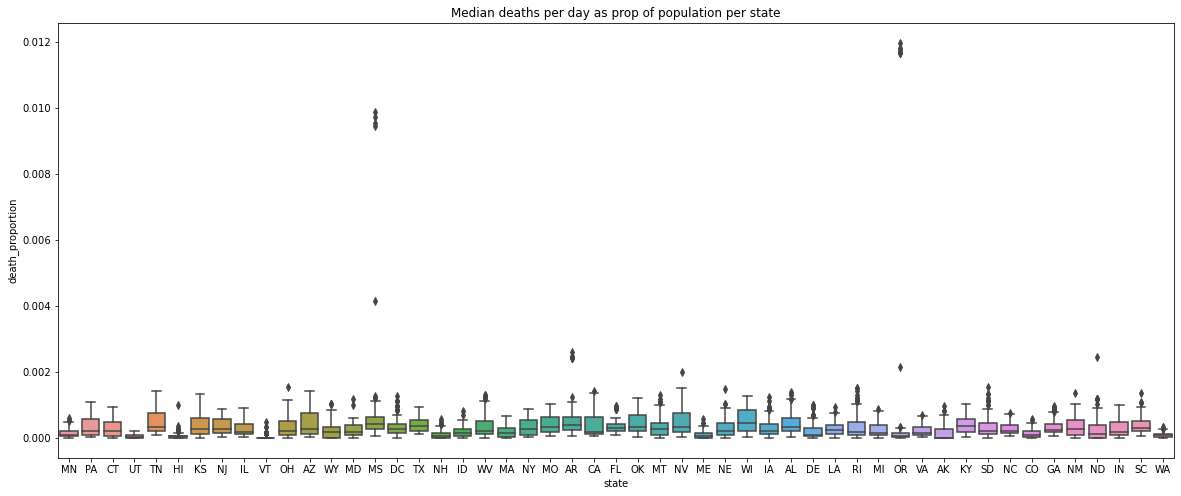

In [33]:
prop_death_per_range(225, 450, df4)

We can see much less variation when looking at the deaths as a proportion of population. Some states still display increased medians higher than others (ie. Utah has a low media compared to Florida and Nevada), however, potentially more interesting are the peak days representing outliers in states such as Oregon and Massachusetts.

In [34]:
group_prop_death = df4.groupby("state").death_proportion.sum()
group_state_pop_density = df4.groupby('state').state_pop_density.mean()
group_state_hospital_density = df4.groupby('state').hospitals_per_head.mean()


GPD0 = pd.DataFrame(group_prop_death)
GPD1 = pd.DataFrame(group_state_pop_density)
GPD2 = pd.DataFrame(group_state_hospital_density)



GPD0.reset_index(inplace=True, drop=False)
GPD1.reset_index(inplace=True, drop=False)
GPD2.reset_index(inplace=True, drop=False)


GPD = GPD0.merge(GPD1).merge(GPD2)
display(GPD.head())

state  death_proportion  state_pop_density  hospitals_per_head
0    AK          0.040864             1.2694            0.000033
1    AL          0.137348            97.4271            0.000019
2    AR          0.142554            58.3059            0.000030
3    AZ          0.166660            66.2016            0.000013
4    CA          0.130170           254.2929            0.000009

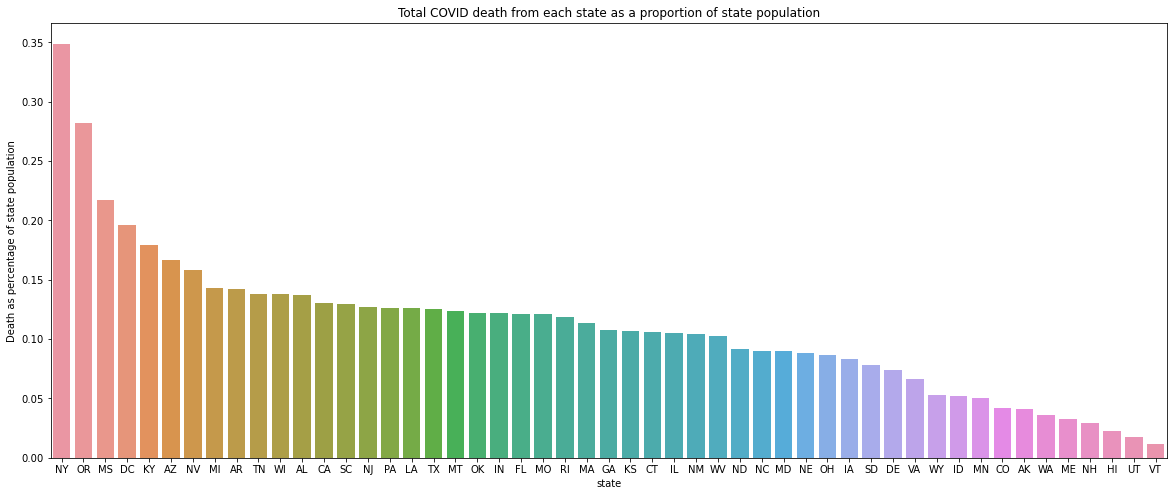

In [35]:
plt.figure(figsize=(20,8))
sns.barplot(data=GPD, x="state", y="death_proportion", order=GPD.sort_values('death_proportion', ascending=False).state)
plt.title('Total COVID death from each state as a proportion of state population')
plt.ylabel("Death as percentage of state population")
plt.show()

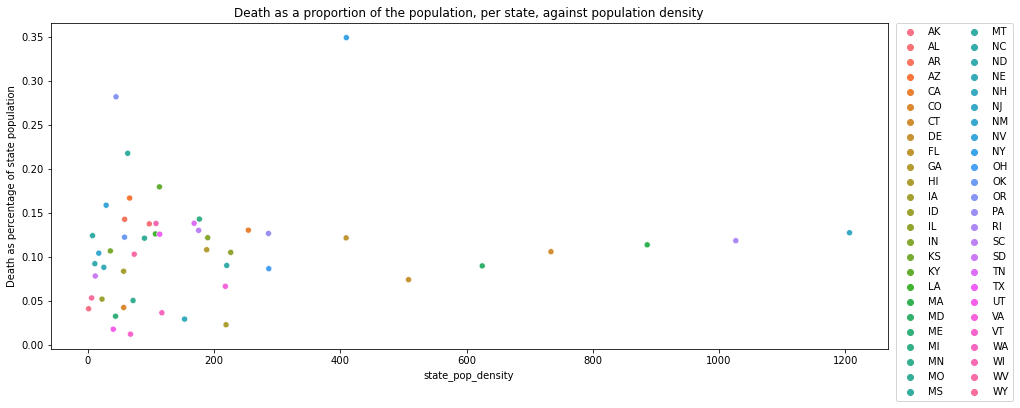

In [36]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=GPD[GPD['state']!='DC'], x='state_pop_density', y='death_proportion', hue='state')
plt.title("Death as a proportion of the population, per state, against population density")
plt.ylabel("Death as percentage of state population")
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0, ncol=2)
plt.show()

In [37]:
gpd_statenotDC = GPD[GPD['state']!='DC']
ggplot_death_prop_state_den = ggplot(gpd_statenotDC, aes(x='state_pop_density', y='death_proportion', color='state')) + geom_point(alpha=.4) + labs(title="Death as a proportion of the population, per state, against population density") + theme(legend_position = 'right', legend_direction='horizontal')


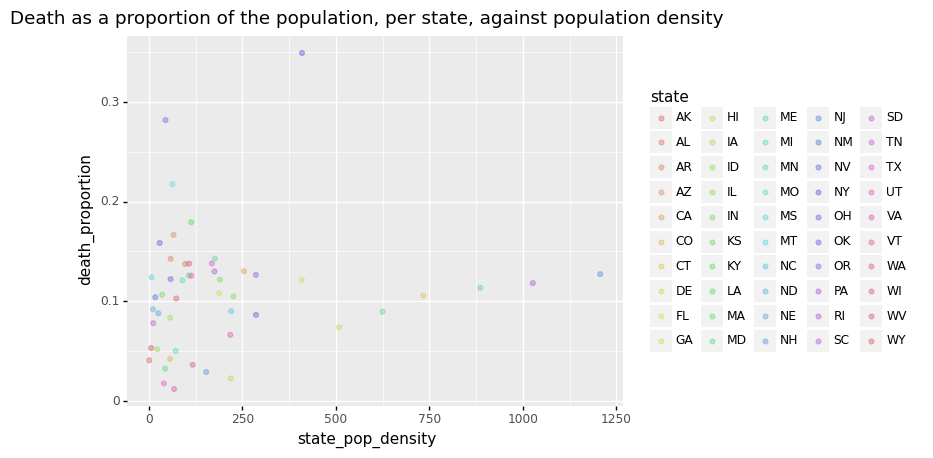

In [38]:
print(ggplot_death_prop_state_den)

There seemed to be no link between mean state population density and the deaths as a proportion of the state.

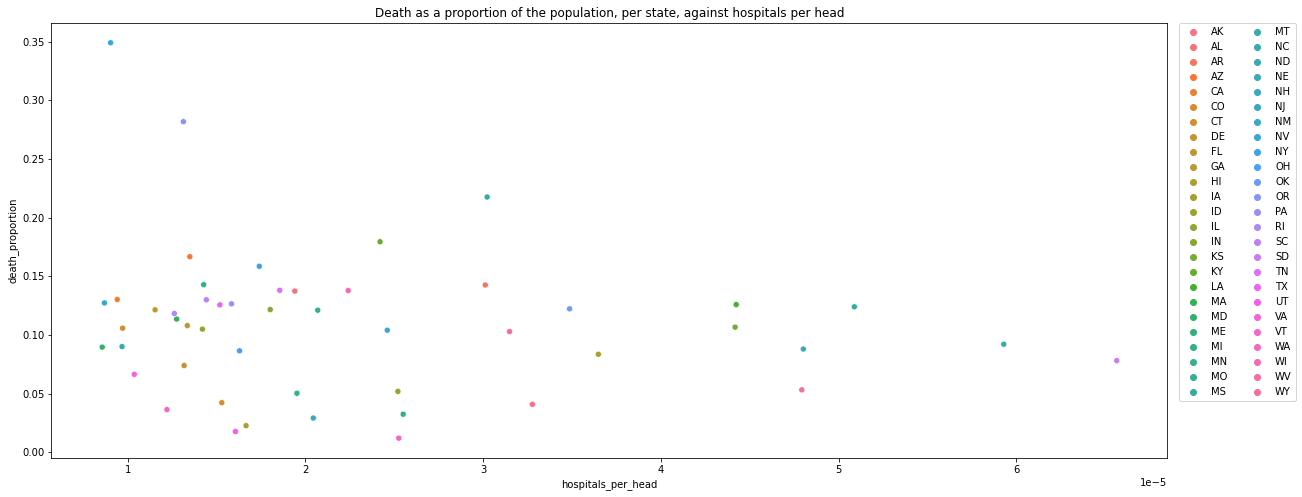

In [39]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=GPD[GPD['state']!='DC'], x='hospitals_per_head', y='death_proportion', hue='state')
plt.title("Death as a proportion of the population, per state, against hospitals per head")
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0, ncol=2)
plt.show()

During the pandemic, it was often highlighted the impact of political figures so I decided to investigate the role of political leanings on the pandemic response. 

In [40]:
voting = pd.read_csv("C:/Users/ajmar/OneDrive/Documents/coding/datasets/COVID_US/state_voting.csv")

voting2 = voting.drop("Unnamed: 0",axis=1)
display(voting2.head(10))

state  demo2016  demo2020   rep2016   rep2020
0    AL  0.343579  0.365700  0.620831  0.620316
1    AK  0.365509  0.427720  0.512815  0.528331
2    AZ  0.451260  0.493647  0.486716  0.490560
3    AR  0.336531  0.347751  0.605741  0.623957
4    CA  0.617264  0.634839  0.316171  0.343207
5    CO  0.481570  0.550111  0.432514  0.416041
6    CT  0.545663  0.592607  0.409269  0.391871
7    DE  0.533533  0.587430  0.419228  0.397749
8    DC  0.904839  0.921497  0.040704  0.053973
9    FL  0.478233  0.478615  0.490219  0.512198

In [41]:
def voting_records(df_x):
 range22 = range(len(df_x.index))
 df_x['Voting_record1'] = 0
 df_x['Voting_record2'] = 0
 df_x['state_swing'] = 0
 for i in range22:
  if df_x['demo2020'].iloc[i] > df_x['rep2020'].iloc[i]:
   df_x['Voting_record2'].iloc[i] = 1
  else:
   df_x['Voting_record2'].iloc[i] = 0
 for i in range22: 
  if df_x['demo2016'].iloc[i] > df_x['rep2020'].iloc[i]:
   df_x['Voting_record1'].iloc[i] = 2
  else:
   df_x['Voting_record1'].iloc[i] = 0
 for i in range22:  
  df_x['state_swing'].iloc[i] = df_x['Voting_record1'].iloc[i] + df_x['Voting_record2'].iloc[i]
  
#voting_records(df5)
###moved to run quicker by running on original df then merge?
voting_records(voting2)
display(voting2.head())

C:\Users\ajmar\anaconda3\envs\rstudio\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


state  demo2016  demo2020   rep2016   rep2020  Voting_record1  \
0    AL  0.343579  0.365700  0.620831  0.620316               0   
1    AK  0.365509  0.427720  0.512815  0.528331               0   
2    AZ  0.451260  0.493647  0.486716  0.490560               0   
3    AR  0.336531  0.347751  0.605741  0.623957               0   
4    CA  0.617264  0.634839  0.316171  0.343207               2   

   Voting_record2  state_swing  
0               0            0  
1               0            0  
2               1            1  
3               0            0  
4               1            3

To investigate the effect of political leanings on the pandemic response in each state, scores were awarded for the results of the 2016 and 2020 presidential elections. 0 points were awarded for a state which had a higher percentage of votes for the Republican president in 2016. 2 points were awarded for any state which had a higher percentage of votes for the Democratic party than the Republican party. 
The 2016 president oversaw the initial response to the pandemic and the longest period of time, so this election was weighted higher than the 2020.
A similar score was allocated for the 2020 election, with 0 and 1 points respectively. The total score was then use to calculate the political leanings of the state with higher scores representing more Democratic states.

In [42]:
df5 = df4.merge(voting2)


In [43]:
df5.head()

state       date  critical_staffing_shortage_today_yes  \
0    MN 2020-07-27                                     4   
1    MN 2020-07-24                                     3   
2    MN 2020-07-23                                     1   
3    MN 2020-07-22                                     0   
4    MN 2020-07-20                                     0   

   critical_staffing_shortage_today_no  \
0                                   70   
1                                   40   
2                                   19   
3                                    8   
4                                    8   

   critical_staffing_shortage_today_not_reported  \
0                                             53   
1                                             86   
2                                            109   
3                                            121   
4                                            121   

   critical_staffing_shortage_anticipated_within_week_yes  \
0                                                  5        
1                                                  2        
2                                                  0        
3                                                  0        
4                                                  0        

   critical_staffing_shortage_anticipated_within_week_no  \
0                                                 69       
1                                                 40       
2                                                 19       
3                                                  7       
4                                                  7       

   critical_staffing_shortage_anticipated_within_week_not_reported  \
0                                                 53                 
1                                                 87                 
2                                                110                 
3                                                122                 
4                                                122                 

   hospital_onset_covid  hospital_onset_covid_coverage  ...  median_salary  \
0                   8.0                            123  ...        50000.0   
1                   6.0                            122  ...        50000.0   
2                   8.0                            117  ...        50000.0   
3                   6.0                            107  ...        50000.0   
4                   9.0                            108  ...        50000.0   

   death_proportion  hospitals_per_head  demo2016  demo2020   rep2016  \
0          0.000018            0.000022   0.46445  0.523951  0.449252   
1          0.000018            0.000023   0.46445  0.523951  0.449252   
2          0.000035            0.000023   0.46445  0.523951  0.449252   
3          0.000053            0.000023   0.46445  0.523951  0.449252   
4          0.000053            0.000023   0.46445  0.523951  0.449252   

    rep2020  Voting_record1  Voting_record2  state_swing  
0  0.452849               2               1            3  
1  0.452849               2               1            3  
2  0.452849               2               1            3  
3  0.452849               2               1            3  
4  0.452849               2               1            3  

[5 rows x 122 columns]

In [44]:
df5['state_swing2'] = df5['state_swing'].map({0:'Republican', 1:'Swing Trump to Biden', 2:'Swing Hilary to Trump', 3:"Democrat"})
df5['state_swing2'] = pd.Categorical(df5['state_swing2'], ordered=False)

In [45]:
group_prop_death = df5.groupby("state").death_proportion.sum()
group_state_pop_density = df5.groupby('state').state_pop_density.mean()
group_state_hospital_density = df5.groupby('state').hospitals_per_head.mean()
group_state_median_sal = df5.groupby('state').median_salary.mean()
group_state_swing = df5.groupby('state').state_swing.mean()
group_state_under_18 = df5.groupby('state').less_18_pop_perc.mean()
group_state_19_25_pop_perc = df5.groupby('state')["19_25_pop_perc"].mean()
group_state_26_34_pop_perc = df5.groupby('state')["26_34_pop_perc"].mean()
group_state_35_54_pop_perc = df5.groupby('state')["35_54_pop_perc"].mean()
group_state_55_64_pop_perc = df5.groupby('state')["55_64_pop_perc"].mean()
group_state_65_pop_perc = df5.groupby('state')["65+_pop_perc"].mean()
      
      
GPD0 = pd.DataFrame(group_prop_death)
GPD1 = pd.DataFrame(group_state_pop_density)
GPD2 = pd.DataFrame(group_state_hospital_density)
GPD3 = pd.DataFrame(group_state_median_sal)
GPD4 = pd.DataFrame(group_state_swing)
GPD5 = pd.DataFrame(group_state_under_18)
GPD6 = pd.DataFrame(group_state_19_25_pop_perc)
GPD7 = pd.DataFrame(group_state_26_34_pop_perc)
GPD8 = pd.DataFrame(group_state_35_54_pop_perc)
GPD9 = pd.DataFrame(group_state_55_64_pop_perc)
GPD10 = pd.DataFrame(group_state_65_pop_perc)

GPD0.reset_index(inplace=True, drop=False)
GPD1.reset_index(inplace=True, drop=False)
GPD2.reset_index(inplace=True, drop=False)
GPD3.reset_index(inplace=True, drop=False)
GPD4.reset_index(inplace=True, drop=False)
GPD5.reset_index(inplace=True, drop=False)
GPD6.reset_index(inplace=True, drop=False)
GPD7.reset_index(inplace=True, drop=False)
GPD8.reset_index(inplace=True, drop=False)
GPD9.reset_index(inplace=True, drop=False)
GPD10.reset_index(inplace=True, drop=False)

GPD = GPD0.merge(GPD1).merge(GPD2).merge(GPD3).merge(GPD4).merge(GPD5).merge(GPD6).merge(GPD7).merge(GPD8).merge(GPD9).merge(GPD10)

In [46]:
GPD['state_swing2'] = GPD['state_swing'].map({0:'Republican', 1:'Swing Trump to Biden', 2:'Swing Hilary to Trump', 3:"Democrat"})
GPD['state_swing2'] = pd.Categorical(GPD['state_swing2'], ordered=False)

In [47]:
GPD_noDC = GPD[GPD['state']!="DC"]
display(GPD_noDC.head())

state  death_proportion  state_pop_density  hospitals_per_head  \
0    AK          0.040864             1.2694            0.000033   
1    AL          0.137348            97.4271            0.000019   
2    AR          0.142554            58.3059            0.000030   
3    AZ          0.166660            66.2016            0.000013   
4    CA          0.130170           254.2929            0.000009   

   median_salary  state_swing  less_18_pop_perc  19_25_pop_perc  \
0        50000.0          0.0             0.259           0.093   
1        46000.0          0.0             0.237           0.087   
2        42000.0          0.0             0.247           0.087   
3        43000.0          1.0             0.240           0.093   
4        48200.0          3.0             0.237           0.092   

   26_34_pop_perc  35_54_pop_perc  55_64_pop_perc  65+_pop_perc  \
0           0.139           0.246           0.132         0.130   
1           0.115           0.251           0.135         0.175   
2           0.115           0.248           0.131         0.173   
3           0.121           0.241           0.124         0.182   
4           0.137           0.263           0.123         0.149   

           state_swing2  
0            Republican  
1            Republican  
2            Republican  
3  Swing Trump to Biden  
4              Democrat

In [48]:
#df6=df5

#dem_rep = lambda x: 30 if (df6["demo2020"].itter >= df6["rep2020"]) else 0
### dem_rep didn't work

#df6['voting_2'] = [1 if df6["demo2020"].iloc[i] >= df6["rep2020"].iloc[i] else 0 for i in range(len(df6))]
### list comp did work for voting_2 

#display(df6.head())
#display(df6[df6['voting_2']==0].head())

#df6['voting_4'] = df6.apply(lambda x: x['voting_2']*20 if x["state_swing"]==3 else x['voting_2']*5, axis=1)

### worked - produced a new column based on voting_2 and state_swing

#display(df6.sort_values("voting_4"))

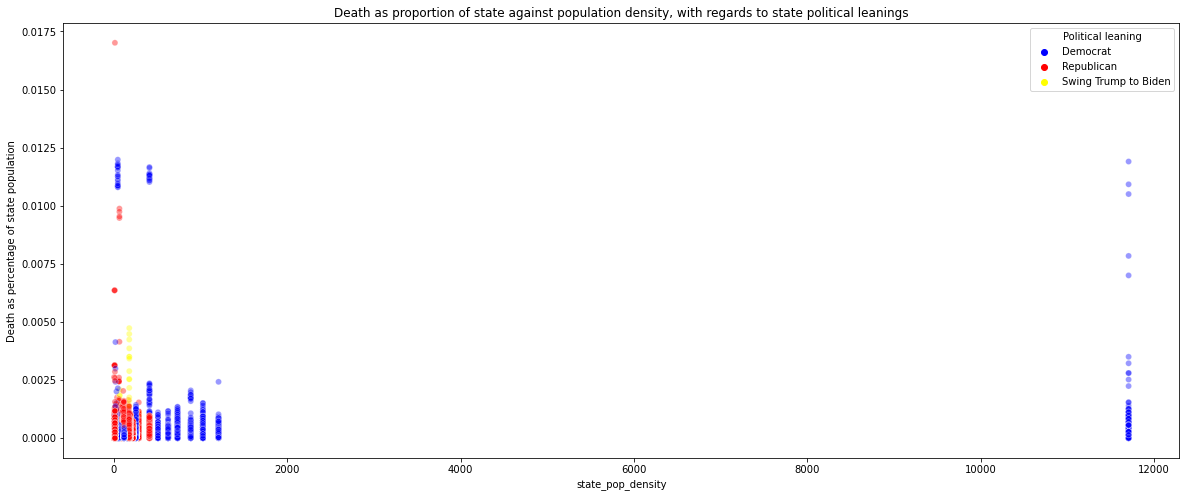

In [49]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=df5, x='state_pop_density', y="death_proportion", hue="state_swing2", alpha=0.4, palette =['blue', 'red', 'yellow'])
plt.title('Death as proportion of state against population density, with regards to state political leanings')
plt.ylabel("Death as percentage of state population")
plt.legend(title = "Political leaning")
plt.show()

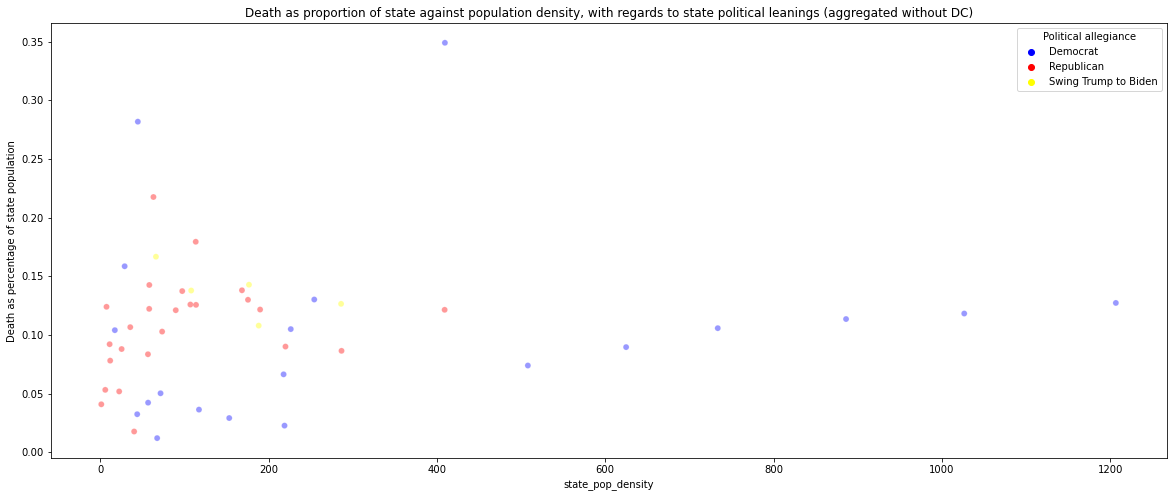

In [50]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=GPD_noDC, x='state_pop_density', y="death_proportion", hue="state_swing2", alpha=0.4, palette =['blue', 'red', 'yellow'])
plt.title('Death as proportion of state against population density, with regards to state political leanings (aggregated without DC)')
plt.ylabel("Death as percentage of state population")
plt.legend(title = "Political allegiance")
plt.show()

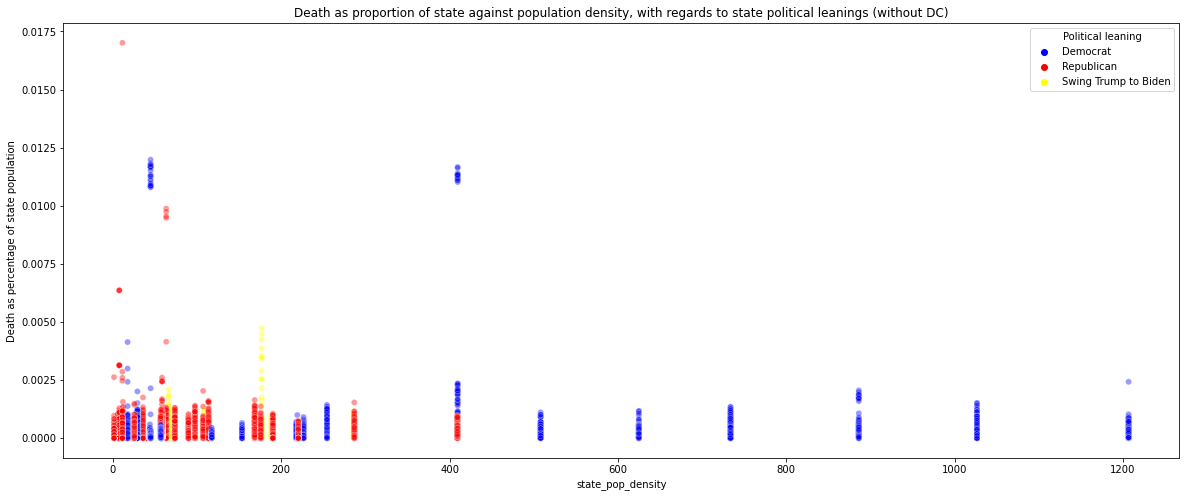

In [51]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=df5[df5["state_pop_density"]<10000], x='state_pop_density', y="death_proportion", hue="state_swing2", alpha=0.4, palette =['blue', 'red', 'yellow'])
plt.title('Death as proportion of state against population density, with regards to state political leanings (without DC)')
plt.ylabel("Death as percentage of state population")
plt.legend(title = "Political leaning")
plt.show()

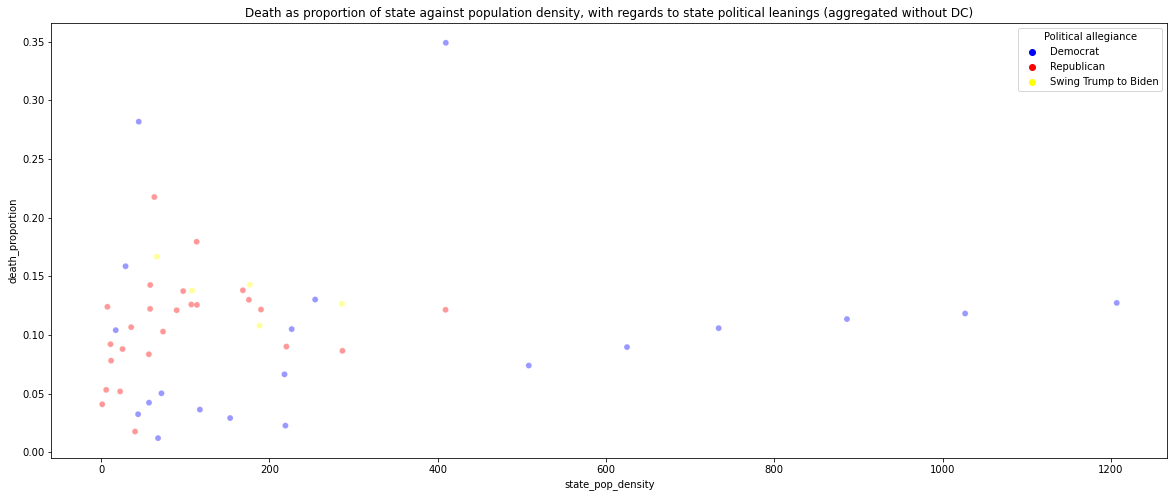

In [52]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=GPD_noDC, x='state_pop_density', y="death_proportion", hue="state_swing2", alpha=0.4, palette =['blue', 'red', 'yellow'])
plt.title('Death as proportion of state against population density, with regards to state political leanings (aggregated without DC)')
plt.legend(title="Political allegiance")
plt.show()

Plotting the population density against the number of deaths as a proportion of population, shows that the majority of states remain within a consistent level, regardless of density. Those states which saw a higher daily death rate were from both parties.
More densely populated states were likely to be Democrat leaning, however, there is no clear pattern on the effect of survival. 

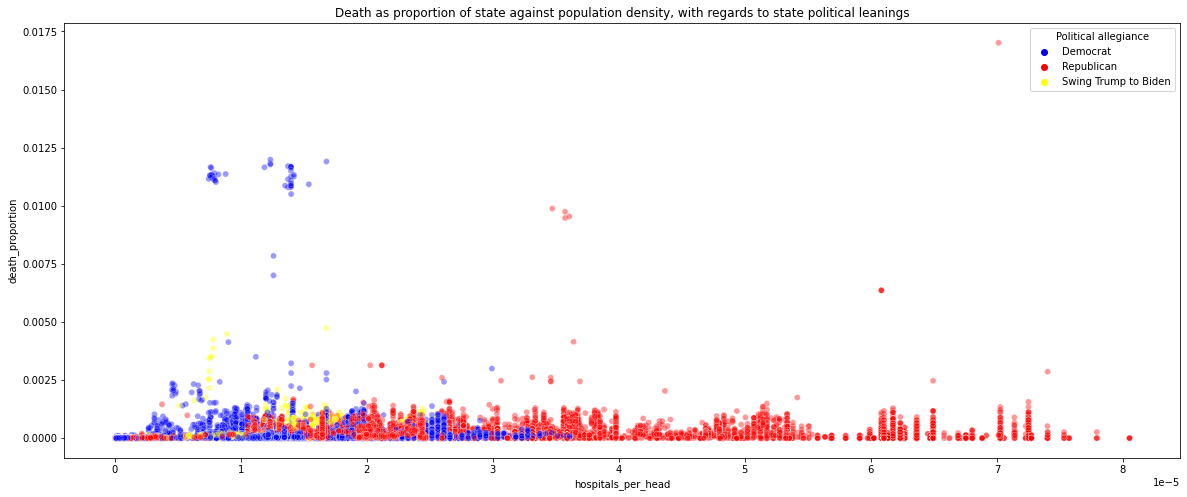

In [53]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=df5, x='hospitals_per_head', y="death_proportion", hue="state_swing2", alpha=0.4, palette =['blue', 'red', 'yellow'])
plt.legend(title="Political allegiance")
plt.title('Death as proportion of state against population density, with regards to state political leanings')
plt.show()

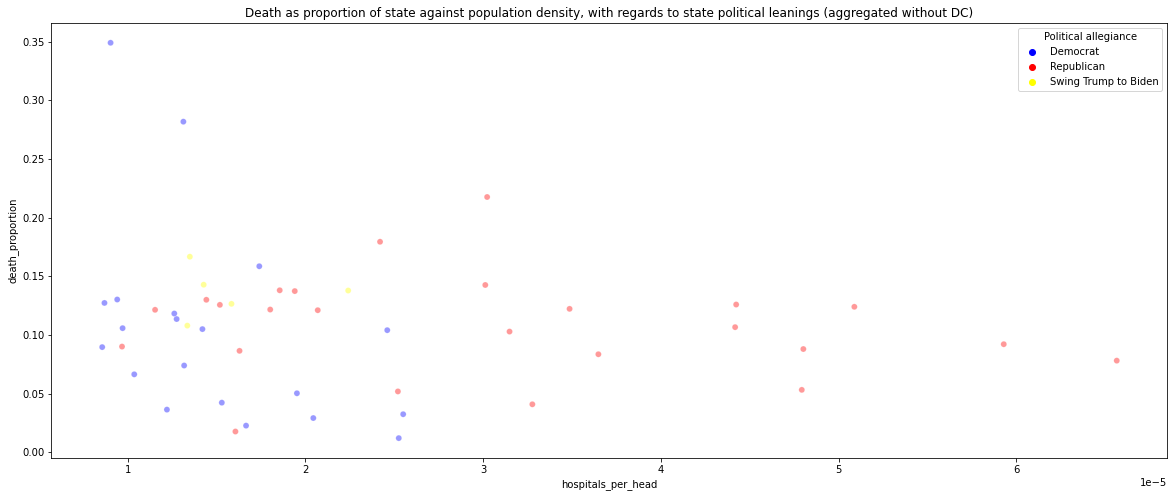

In [54]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=GPD_noDC, x='hospitals_per_head', y="death_proportion", hue="state_swing2", alpha=0.4, palette =['blue', 'red', 'yellow'])
plt.legend(title="Political allegiance")
plt.title('Death as proportion of state against population density, with regards to state political leanings (aggregated without DC)')
plt.show()

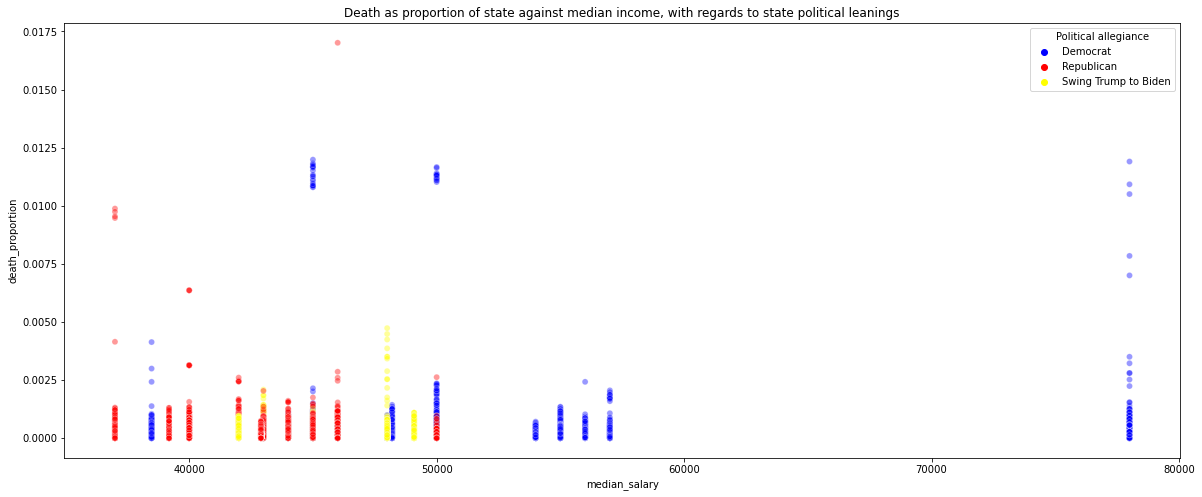

In [55]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=df5, x="median_salary", y="death_proportion", hue="state_swing2", alpha=0.4, palette =['blue', 'red', 'yellow'])
plt.legend(title="Political allegiance")
plt.title('Death as proportion of state against median income, with regards to state political leanings')
plt.show()

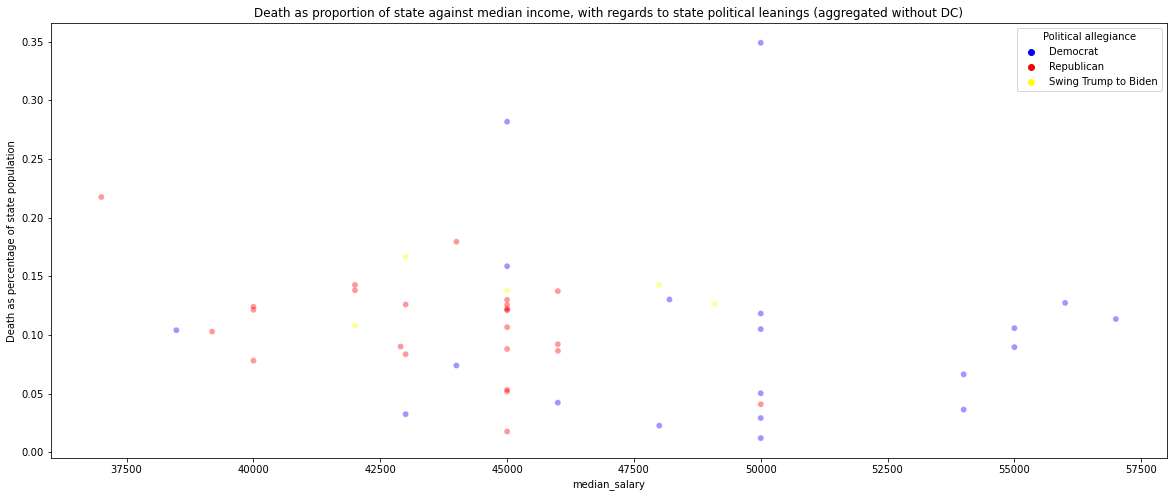

In [56]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=GPD_noDC, x="median_salary", y="death_proportion", hue="state_swing2", alpha=0.4, palette =['blue', 'red', 'yellow'])
plt.title('Death as proportion of state against median income, with regards to state political leanings (aggregated without DC)')
plt.legend(title="Political allegiance")
plt.ylabel("Death as percentage of state population")
plt.show()

Having plotted the median salary for each state against the total deaths during the pandemic as a proportion of each state's population, we can see a slight negative correlation. To determine the strength of this effect, I decided to perform linear regression and plot a line of best fit. 

It is important to note that due to the large difference in population density and median_salary between DC and the other states, for this analysis it has been removed.


In [57]:
line_fitter=LinearRegression()
x_line_fit = GPD_noDC['median_salary'].to_numpy().reshape(-1, 1)
y_line_fit = GPD_noDC['death_proportion'].to_numpy().reshape(-1, 1)
line_fitter.fit(x_line_fit, y_line_fit)
death_predicted1 = line_fitter.predict(x_line_fit)

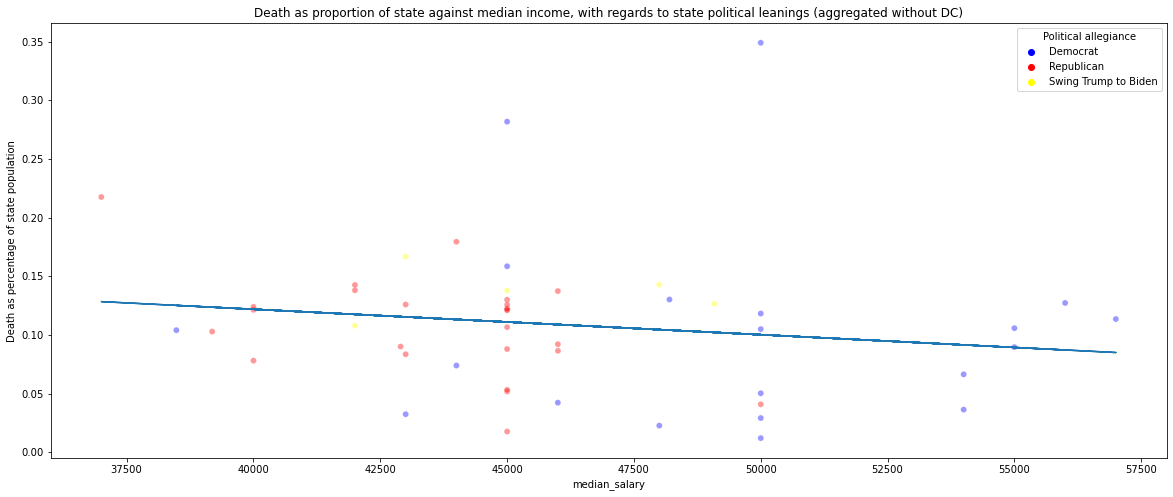

In [58]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=GPD_noDC, x="median_salary", y="death_proportion", hue="state_swing2", alpha=0.4, palette =['blue', 'red', 'yellow'])
plt.plot(GPD_noDC['median_salary'], death_predicted1)
plt.title('Death as proportion of state against median income, with regards to state political leanings (aggregated without DC)')
plt.ylabel("Death as percentage of state population")
plt.legend(title="Political allegiance")
plt.show()

In [59]:
print(f"the line of best fit is {line_fitter.coef_}x + {line_fitter.intercept_}")
print(f"The Line of best fit has an R2 of {line_fitter.score(x_line_fit, y_line_fit)}")

the line of best fit is [[-2.16885183e-06]]x + [0.20861513]
The Line of best fit has an R2 of 0.026567632483889825


The result of the linear regression shows an incredibly weak negative correlation between deaths and median salary. However, it does appear there may be a stronger line of best fit for Republican voting states.

In [60]:
line_fitter2 =LinearRegression()
x_line_fit2 = GPD_noDC['median_salary'][GPD_noDC['state_swing']==0].to_numpy().reshape(-1, 1)
y_line_fit2 = GPD_noDC['death_proportion'][GPD_noDC['state_swing']==0].to_numpy().reshape(-1, 1)
line_fitter2.fit(x_line_fit2, y_line_fit2)
death_predicted2 = line_fitter2.predict(x_line_fit2)

In [61]:
line_fitter3 =LinearRegression()
x_line_fit3 = GPD_noDC['median_salary'][GPD_noDC['state_swing']==3].to_numpy().reshape(-1, 1)
y_line_fit3 = GPD_noDC['death_proportion'][GPD_noDC['state_swing']==3].to_numpy().reshape(-1, 1)
line_fitter3.fit(x_line_fit3, y_line_fit3)
death_predicted3 = line_fitter3.predict(x_line_fit3)

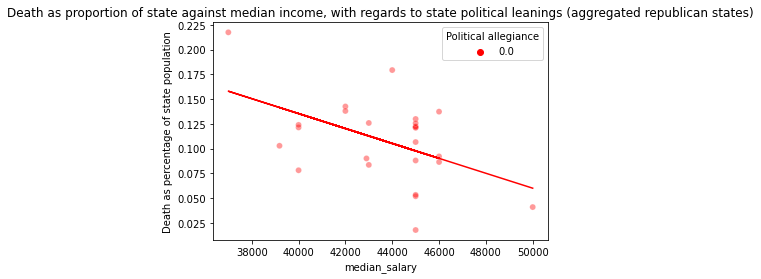

In [62]:
sns.scatterplot(data=GPD_noDC[GPD_noDC['state_swing']==0], x="median_salary", y="death_proportion", hue="state_swing", alpha=0.4, palette =['red'])
plt.plot(GPD_noDC['median_salary'][GPD_noDC['state_swing']==0], death_predicted2, color='red')
plt.title('Death as proportion of state against median income, with regards to state political leanings (aggregated republican states)')
plt.ylabel("Death as percentage of state population")
plt.legend(labels=["Republican"])
plt.legend(title = "Political allegiance")
plt.show()

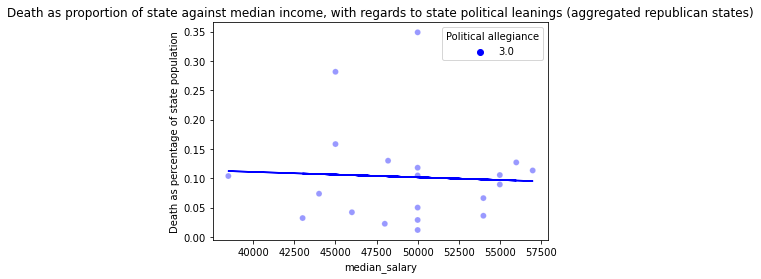

In [63]:
sns.scatterplot(data=GPD_noDC[GPD_noDC['state_swing']==3], x="median_salary", y="death_proportion", hue="state_swing", alpha=0.4, palette =['blue'])
plt.plot(GPD_noDC['median_salary'][GPD_noDC['state_swing']==3], death_predicted3, color='blue')
plt.title('Death as proportion of state against median income, with regards to state political leanings (aggregated republican states)')
plt.ylabel("Death as percentage of state population")
plt.legend(labels = ["Democrat"])
plt.legend(title = "Political allegiance")
plt.show()

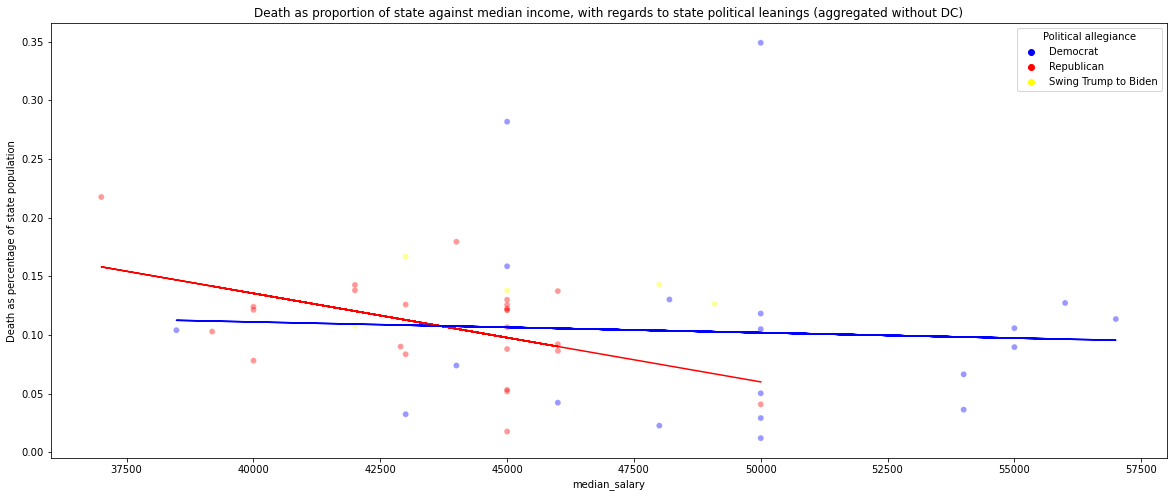

In [64]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=GPD_noDC, x="median_salary", y="death_proportion", hue="state_swing2", alpha=0.4, palette =['blue', 'red', 'yellow'])
plt.plot(GPD_noDC['median_salary'][GPD_noDC['state_swing']==0], death_predicted2, color='red')
plt.plot(GPD_noDC['median_salary'][GPD_noDC['state_swing']==3], death_predicted3, color='blue')
plt.title('Death as proportion of state against median income, with regards to state political leanings (aggregated without DC)')
plt.ylabel("Death as percentage of state population")
plt.legend(title = "Political allegiance")
plt.show()

In [65]:
print(f"the line of best fit is {line_fitter2.coef_}x + {line_fitter2.intercept_}")
print(f"The line of best fit has an R^2 of {line_fitter2.score(x_line_fit2, y_line_fit2)}")

the line of best fit is [[-7.54331307e-06]]x + [0.43712307]
The line of best fit has an R^2 of 0.24110482080727447


The line of best fit representing the Republican states accounts for 24.1% of the variation seen and shows a decline in the proportion of deaths as the median wage of the state increases. The decrease in mortality does not appear to be related to the number of hospitals per head, but could be related to differing age demographics that I will now investigate.

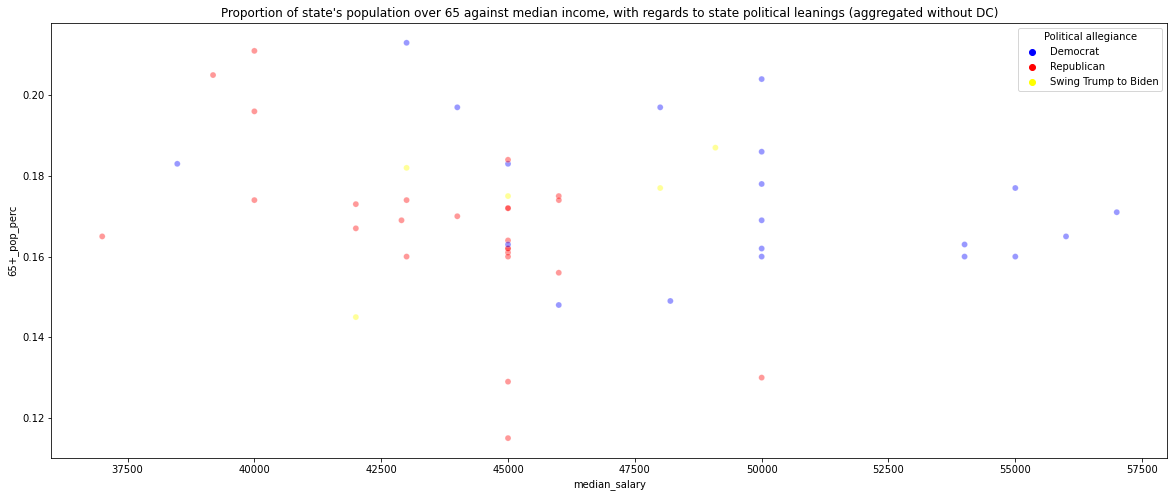

In [66]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=GPD_noDC, x="median_salary", y="65+_pop_perc", hue="state_swing2", alpha=0.4, palette =['blue', 'red', 'yellow'])
plt.title('Proportion of state\'s population over 65 against median income, with regards to state political leanings (aggregated without DC)')
plt.legend(title="Political allegiance")
plt.show()

In [67]:
df_65_rep = GPD_noDC[GPD_noDC['state_swing']==0]['65+_pop_perc']
df_65_demo = GPD_noDC[GPD_noDC['state_swing']==3]['65+_pop_perc']
tstat, pval = ttest_ind(df_65_rep, df_65_demo)
print(tstat, pval)

-1.2123700732380989 0.2319900508211358


While the graph suggested there was potentially a minor difference between democratic states and republican states in the proportion of the population who were aged over 65, an independent t-test showed no significant difference.

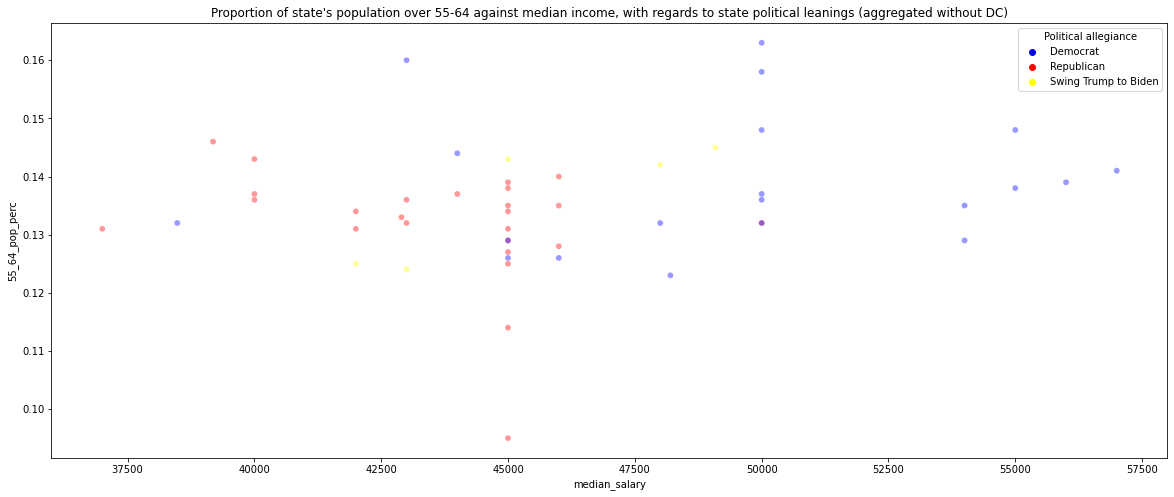

In [68]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=GPD_noDC, x="median_salary", y="55_64_pop_perc", hue="state_swing2", alpha=0.4, palette =['blue', 'red', 'yellow'])
plt.title('Proportion of state\'s population over 55-64 against median income, with regards to state political leanings (aggregated without DC)')
plt.legend(title="Political allegiance")
plt.show()

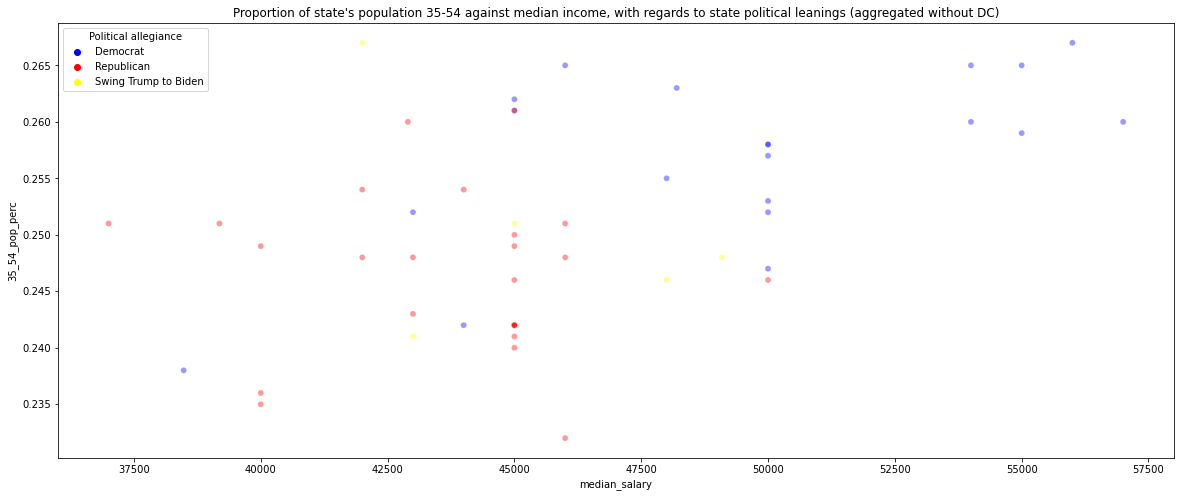

In [69]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=GPD_noDC, x="median_salary", y="35_54_pop_perc", hue="state_swing2", alpha=0.4, palette =['blue', 'red', 'yellow'])
plt.legend(title="Political allegiance")
plt.title('Proportion of state\'s population 35-54 against median income, with regards to state political leanings (aggregated without DC)')
plt.show()

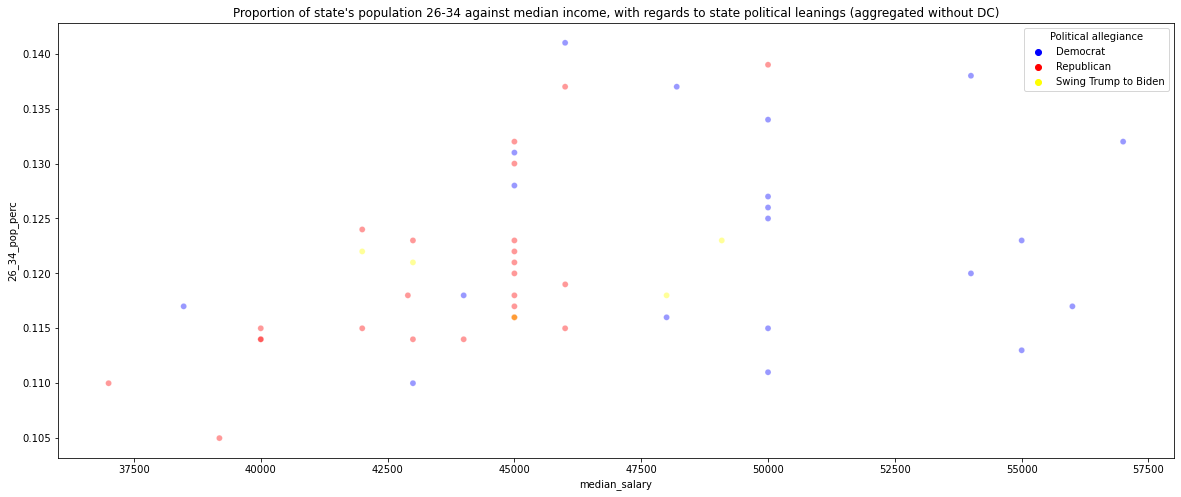

In [70]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=GPD_noDC, x="median_salary", y="26_34_pop_perc", hue="state_swing2", alpha=0.4, palette =['blue', 'red', 'yellow'])
plt.legend(title="Political allegiance")
plt.title('Proportion of state\'s population 26-34 against median income, with regards to state political leanings (aggregated without DC)')
plt.show()

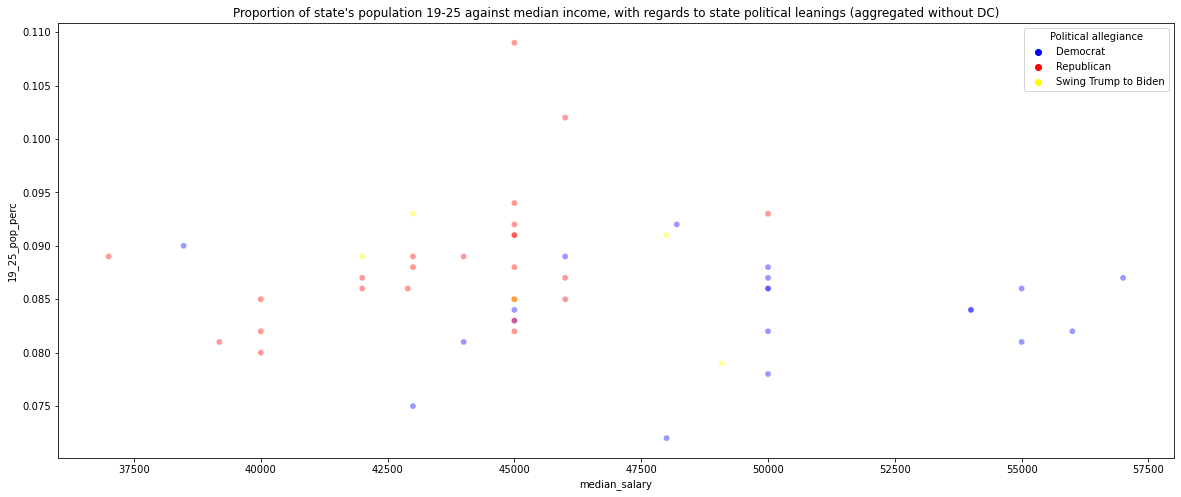

In [71]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=GPD_noDC, x="median_salary", y="19_25_pop_perc", hue="state_swing2", alpha=0.4, palette =['blue', 'red', 'yellow'])
plt.legend(title="Political allegiance")
plt.title('Proportion of state\'s population 19-25 against median income, with regards to state political leanings (aggregated without DC)')
plt.show()

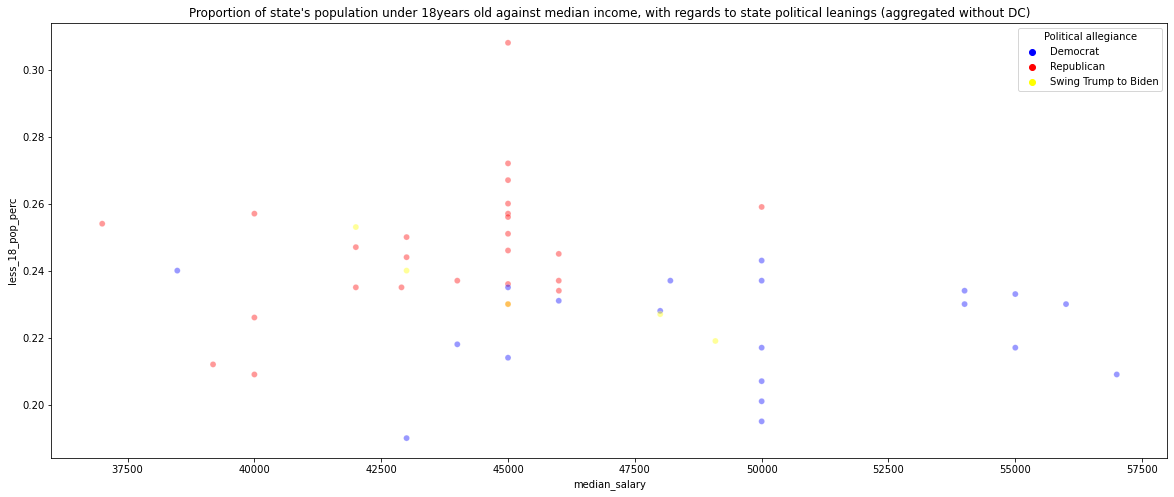

In [72]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=GPD_noDC, x="median_salary", y="less_18_pop_perc", hue="state_swing2", alpha=0.4, palette =['blue', 'red', 'yellow'])
plt.legend(title="Political allegiance")
plt.title('Proportion of state\'s population under 18years old against median income, with regards to state political leanings (aggregated without DC)')
plt.show()

In [73]:
pdsql = lambda q: sqldf(q, globals())
top_10_deaths = pdsql("SELECT state, state_swing, state_swing2, death_proportion FROM GPD_noDC WHERE death_proportion>0.001 ORDER BY death_proportion DESC LIMIT 10;")
display(top_10_deaths)

state  state_swing          state_swing2  death_proportion
0    NY          3.0              Democrat          0.348974
1    OR          3.0              Democrat          0.281738
2    MS          0.0            Republican          0.217536
3    KY          0.0            Republican          0.179391
4    AZ          1.0  Swing Trump to Biden          0.166660
5    NV          3.0              Democrat          0.158517
6    MI          1.0  Swing Trump to Biden          0.142788
7    AR          0.0            Republican          0.142554
8    TN          0.0            Republican          0.138028
9    WI          1.0  Swing Trump to Biden          0.137822

In [74]:
top_10_deaths_group = top_10_deaths.groupby("state_swing2").death_proportion.sum()
display(top_10_deaths_group)

state_swing2
Democrat                0.789230
Republican              0.677508
Swing Trump to Biden    0.447270
Name: death_proportion, dtype: float64

In [75]:
population_race = pd.read_csv("C:/Users/ajmar/OneDrive/Documents/coding/datasets/us_pop_race.csv")
population_race = population_race.transpose().reset_index()
col_names = population_race.iloc[0]
print(col_names)

index                                                 Race
0                                                   Total:
1                                              White alone
2                          Black or African American alone
3                  American Indian and Alaska Native alone
4                                              Asian alone
5                Native Hawaiian and Other Pacific Isla...
6                                    Some other race alone
7                                       Two or more races:
8                      Two races including Some other race
9                    Two races excluding Some other rac...
10                                     Hispanic or Latino:
Name: 0, dtype: object


In [76]:
population_race.columns = ['state', 'total_state_pop', 'white_pop', 'black_pop', 'native_pop', 'asian_pop', 'pacific_pop', 'other_pop', '2_or_more_other_pop', 'blah', 'blah2', 'hispanic_pop']
population_race = population_race.drop(columns = ['blah', 'blah2'])
display(population_race.head())


state total_state_pop            white_pop  \
0      Race          Total:          White alone   
1   Alabama       4,903,185            3,192,955   
2    Alaska         731,545              437,714   
3   Arizona       7,278,717            3,929,213   
4  Arkansas       3,017,804            2,171,931   

                                 black_pop  \
0          Black or African American alone   
1                                1,312,821   
2                                   21,773   
3                                  319,045   
4                                  464,996   

                                        native_pop            asian_pop  \
0          American Indian and Alaska Native alone          Asian alone   
1                                           19,364               65,215   
2                                          113,467               43,322   
3                                          289,161              235,202   
4                                           16,216               45,839   

                                         pacific_pop  \
0          Native Hawaiian and Other Pacific Isla...   
1                                              1,520   
2                                              9,715   
3                                             13,361   
4                                             12,673   

                       other_pop         2_or_more_other_pop  \
0          Some other race alone          Two or more races:   
1                          9,623                      82,391   
2                          2,096                      50,910   
3                         10,110                     172,033   
4                          3,094                      71,104   

              hispanic_pop  
0      Hispanic or Latino:  
1                  219,296  
2                   52,548  
3                2,310,592  
4                  231,951

In [77]:
population_race = population_race.drop(index=[0])

In [78]:
population_race.head()

state total_state_pop   white_pop  black_pop native_pop  asian_pop  \
1     Alabama       4,903,185   3,192,955  1,312,821     19,364     65,215   
2      Alaska         731,545     437,714     21,773    113,467     43,322   
3     Arizona       7,278,717   3,929,213    319,045    289,161    235,202   
4    Arkansas       3,017,804   2,171,931    464,996     16,216     45,839   
5  California      39,512,223  14,356,081  2,171,989    149,063  5,786,711   

  pacific_pop other_pop 2_or_more_other_pop hispanic_pop  
1       1,520     9,623              82,391      219,296  
2       9,715     2,096              50,910       52,548  
3      13,361    10,110             172,033    2,310,592  
4      12,673     3,094              71,104      231,951  
5     141,846   107,538           1,224,113   15,574,882

In [79]:
population_race.dtypes
population_race_col = population_race.columns
#print(population_race_col)
population_race_col2 =[]

for x in population_race_col:
 y = x.lstrip()
 population_race_col2.append(y)
#print(population_race_col2)



In [80]:
# population_race_col2[0] = "state222"

population_race2 = population_race
# population_race2.columns = [population_race_col2]
population_race_col3 = population_race2.columns[1:]
# display(population_race2.head())

In [81]:
for x in population_race_col3:
 population_race2[x] = population_race2[x].str.replace(",", "")

for x in population_race_col3:
 population_race2[x] = pd.to_numeric(population_race2[x])


In [82]:
col = population_race2.columns
print(col)

Index(['state', 'total_state_pop', 'white_pop', 'black_pop', 'native_pop',
       'asian_pop', 'pacific_pop', 'other_pop', '2_or_more_other_pop',
       'hispanic_pop'],
      dtype='object')


In [83]:
state_pop2.columns

Index(['state_name', 'state_population', 'state_pop_density', 'state_abbrev',
       'state', 'less_18_pop_perc', '19_25_pop_perc', '26_34_pop_perc',
       '35_54_pop_perc', '55_64_pop_perc', '65+_pop_perc', 'total_pop_perc',
       'median_salary'],
      dtype='object')

In [84]:
# state_race = GPD_noDC.merge(state_pop2, left_on="state", right_on="state", how="outer").merge(population_race2, left_on='state_name', right_on='state', how='left')
# display(state_race.head())
# state_race.columns

In [85]:
state_race2 = pdsql('''SELECT * 
FROM GPD_noDC LEFT JOIN state_pop2 on GPD_noDC.state = state_pop2.state;''')
state_race2.head()

state  death_proportion  state_pop_density  hospitals_per_head  \
0     AK          0.040864             1.2694            0.000033   
1     AL          0.137348            97.4271            0.000019   
2     AR          0.142554            58.3059            0.000030   
3     AZ          0.166660            66.2016            0.000013   
4     CA          0.130170           254.2929            0.000009   

   median_salary  state_swing less_18_pop_perc 19_25_pop_perc  26_34_pop_perc  \
0        50000.0          0.0            0.259          0.093           0.139   
1        46000.0          0.0            0.237          0.087           0.115   
2        42000.0          0.0            0.247          0.087           0.115   
3        43000.0          1.0            0.240          0.093           0.121   
4        48200.0          3.0            0.237          0.092           0.137   

   35_54_pop_perc  ...  state_abbrev  state less_18_pop_perc 19_25_pop_perc  \
0           0.246  ...        Alaska     AK            0.259          0.093   
1           0.251  ...          Ala.     AL            0.237          0.087   
2           0.248  ...          Ark.     AR            0.247          0.087   
3           0.241  ...         Ariz.     AZ            0.240          0.093   
4           0.263  ...        Calif.     CA            0.237          0.092   

   26_34_pop_perc  35_54_pop_perc 55_64_pop_perc 65+_pop_perc  total_pop_perc  \
0           0.139           0.246          0.132        0.130               1   
1           0.115           0.251          0.135        0.175               1   
2           0.115           0.248          0.131        0.173               1   
3           0.121           0.241          0.124        0.182               1   
4           0.137           0.263          0.123        0.149               1   

   median_salary  
0      50,000.00  
1      46,000.00  
2      42,000.00  
3      43,000.00  
4      48,200.00  

[5 rows x 26 columns]

In [86]:
state_race3 = pdsql('''SELECT * FROM state_race2 AS SR2
LEFT JOIN population_race2 AS PR2 ON SR2.state_name = PR2.state;''')
print(state_race3.columns)

Index(['state', 'death_proportion', 'state_pop_density', 'hospitals_per_head',
       'median_salary', 'state_swing', 'less_18_pop_perc', '19_25_pop_perc',
       '26_34_pop_perc', '35_54_pop_perc', '55_64_pop_perc', '65+_pop_perc',
       'state_swing2', 'state_name', 'state_population', 'state_abbrev',
       'total_pop_perc', 'state', 'total_state_pop', 'white_pop', 'black_pop',
       'native_pop', 'asian_pop', 'pacific_pop', 'other_pop',
       '2_or_more_other_pop', 'hispanic_pop'],
      dtype='object')


In [87]:
state_race = pdsql('''SELECT state, state_name, state_abbrev, state_population, state_swing, state_swing2, death_proportion, state_pop_density, hospitals_per_head, median_salary, white_pop, black_pop, native_pop, asian_pop, pacific_pop, other_pop, hispanic_pop FROM state_race3;''')
display(state_race.head())

state  state_name state_abbrev  state_population  state_swing  \
0      Alaska      Alaska       Alaska            724357          0.0   
1     Alabama     Alabama         Ala.           4934193          0.0   
2    Arkansas    Arkansas         Ark.           3033946          0.0   
3     Arizona     Arizona        Ariz.           7520103          1.0   
4  California  California       Calif.          39613493          3.0   

           state_swing2  death_proportion  state_pop_density  \
0            Republican          0.040864             1.2694   
1            Republican          0.137348            97.4271   
2            Republican          0.142554            58.3059   
3  Swing Trump to Biden          0.166660            66.2016   
4              Democrat          0.130170           254.2929   

   hospitals_per_head median_salary  white_pop  black_pop  native_pop  \
0            0.000033     50,000.00     437714      21773      113467   
1            0.000019     46,000.00    3192955    1312821       19364   
2            0.000030     42,000.00    2171931     464996       16216   
3            0.000013     43,000.00    3929213     319045      289161   
4            0.000009     48,200.00   14356081    2171989      149063   

   asian_pop  pacific_pop  other_pop  hispanic_pop  
0      43322         9715       2096         52548  
1      65215         1520       9623        219296  
2      45839        12673       3094        231951  
3     235202        13361      10110       2310592  
4    5786711       141846     107538      15574882

In [88]:
SR2 = pd.melt(state_race, id_vars=["state", "state_name", "state_abbrev", "state_population", "state_swing", "state_swing2", "death_proportion", "state_pop_density", "hospitals_per_head", "median_salary"], var_name=["race pop"], value_name = "population") 
display(SR2)

state     state_name state_abbrev  state_population  state_swing  \
0           Alaska         Alaska       Alaska            724357          0.0   
1          Alabama        Alabama         Ala.           4934193          0.0   
2         Arkansas       Arkansas         Ark.           3033946          0.0   
3          Arizona        Arizona        Ariz.           7520103          1.0   
4       California     California       Calif.          39613493          3.0   
..             ...            ...          ...               ...          ...   
345        Vermont        Vermont          Vt.            623251          3.0   
346     Washington     Washington        Wash.           7796941          3.0   
347      Wisconsin      Wisconsin         Wis.           5852490          1.0   
348  West Virginia  West Virginia        W.Va.           1767859          0.0   
349        Wyoming        Wyoming         Wyo.            581075          0.0   

             state_swing2  death_proportion  state_pop_density  \
0              Republican          0.040864             1.2694   
1              Republican          0.137348            97.4271   
2              Republican          0.142554            58.3059   
3    Swing Trump to Biden          0.166660            66.2016   
4                Democrat          0.130170           254.2929   
..                    ...               ...                ...   
345              Democrat          0.012034            67.6197   
346              Democrat          0.036335           117.3249   
347  Swing Trump to Biden          0.137822           108.0633   
348            Republican          0.102836            73.5443   
349            Republican          0.053177             5.9847   

     hospitals_per_head median_salary      race pop  population  
0              0.000033     50,000.00     white_pop      437714  
1              0.000019     46,000.00     white_pop     3192955  
2              0.000030     42,000.00     white_pop     2171931  
3              0.000013     43,000.00     white_pop     3929213  
4              0.000009     48,200.00     white_pop    14356081  
..                  ...           ...           ...         ...  
345            0.000025     50,000.00  hispanic_pop       12408  
346            0.000012     54,000.00  hispanic_pop      991723  
347            0.000022     45,000.00  hispanic_pop      412769  
348            0.000031     39,185.00  hispanic_pop       26823  
349            0.000048     45,000.00  hispanic_pop       58607  

[350 rows x 12 columns]

In [89]:
SR2['perc_of_pop_race'] = SR2['population']/SR2['state_population']

In [90]:
# plt.figure(figsize=(20,8))
# per_white = SR2[SR2['race pop']=="white_pop"]
# sns.scatterplot(data=per_white, x="perc_of_pop_race", y="death_proportion", hue="state_swing", palette=['red', 'yellow', "blue"])
# plt.title("Percentage of white citizens per state against proportionate deaths")
# plt.xlabel("Proportion of the state population self-identified as white")
# plt.ylabel("Death from covid as a proportion of state population.")
# plt.show()

In [91]:
Line_race_death =LinearRegression()
x_line_whitepercent = SR2["perc_of_pop_race"][SR2['race pop']=="white_pop"].to_numpy().reshape(-1, 1)
y_line_whitedeath = SR2["death_proportion"][SR2['race pop']=="white_pop"].to_numpy().reshape(-1, 1)
Line_race_death.fit(x_line_whitepercent, y_line_whitedeath)
death_predicted_white = Line_race_death.predict(x_line_whitepercent)


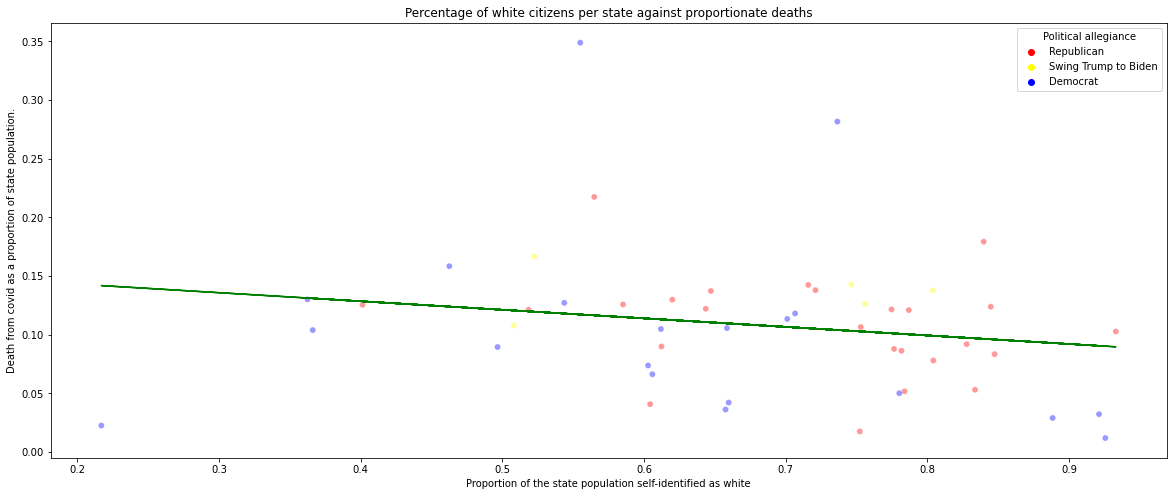

In [92]:
plt.figure(figsize=(20,8))
per_white = SR2[SR2['race pop']=="white_pop"]
sns.scatterplot(data=per_white, x="perc_of_pop_race", y="death_proportion", hue="state_swing2", alpha=0.4, palette =['red', 'yellow', 'blue'])
plt.legend(title="Political allegiance")
plt.plot(x_line_whitepercent, death_predicted_white, color='green')
plt.title("Percentage of white citizens per state against proportionate deaths")
plt.xlabel("Proportion of the state population self-identified as white")
plt.ylabel("Death from covid as a proportion of state population.")
plt.show()

In [93]:
print(f"The line of best fit is {Line_race_death.coef_}x + {Line_race_death.intercept_}")
print(f"The line of best fit has an R^2 of {Line_race_death.score(x_line_whitepercent, y_line_whitedeath)}")

The line of best fit is [[-0.07285719]]x + [0.15775678]
The line of best fit has an R^2 of 0.03462592167123246


While there does initially appear to be a slight correlation between lower deaths and a higher percentage of white individuals per state, when scored our linear model performs poorly, suggesting it is not an accurate predictor.

In [94]:
races = SR2['race pop'].unique()
print(races)

['white_pop' 'black_pop' 'native_pop' 'asian_pop' 'pacific_pop'
 'other_pop' 'hispanic_pop']


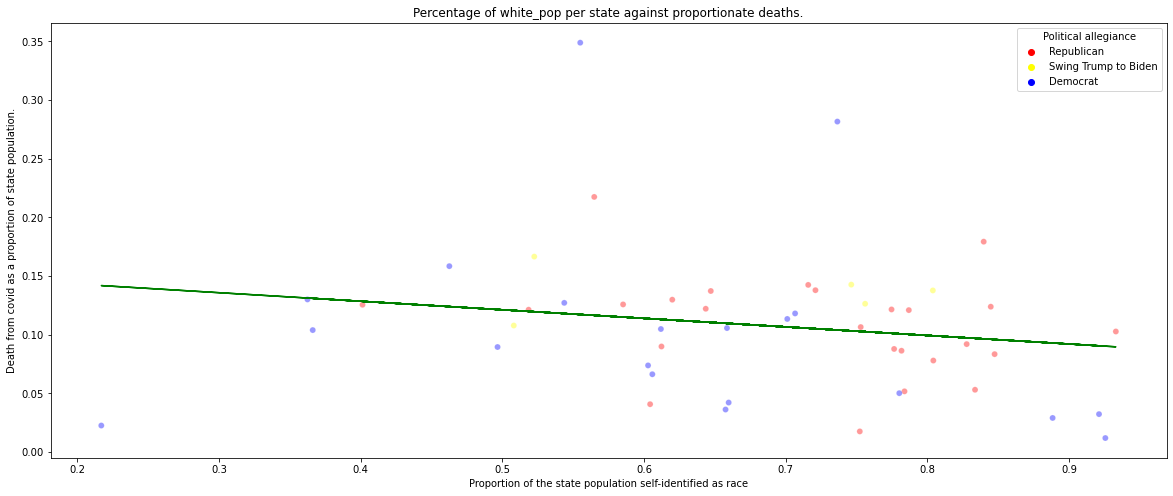

The line of best fit is [[-0.07285719]]x + [0.15775678]
The line of best fit has an R^2 of 0.03462592167123246


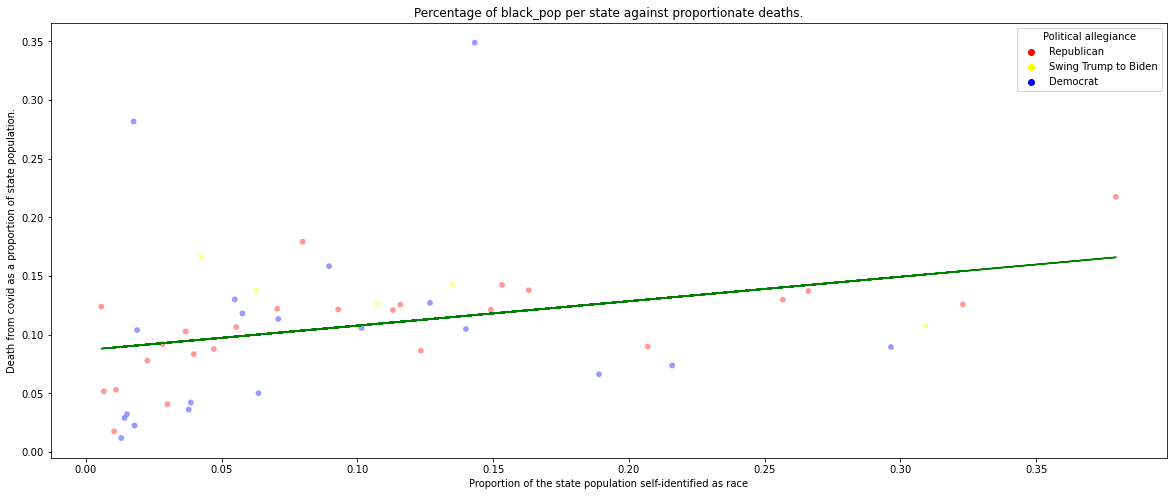

The line of best fit is [[0.20830264]]x + [0.08702886]
The line of best fit has an R^2 of 0.10122355510863223


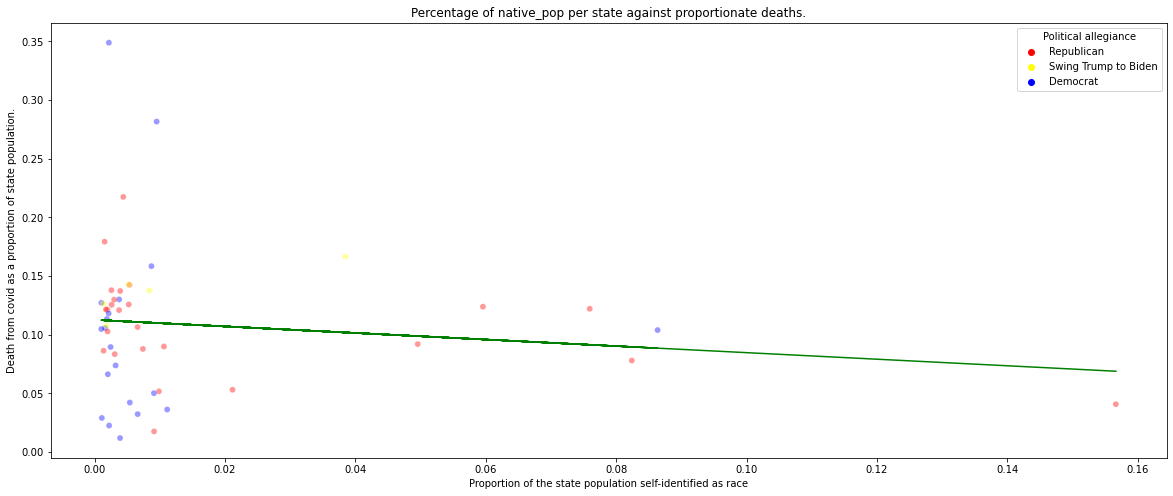

The line of best fit is [[-0.27952504]]x + [0.11275552]
The line of best fit has an R^2 of 0.017774897636326892


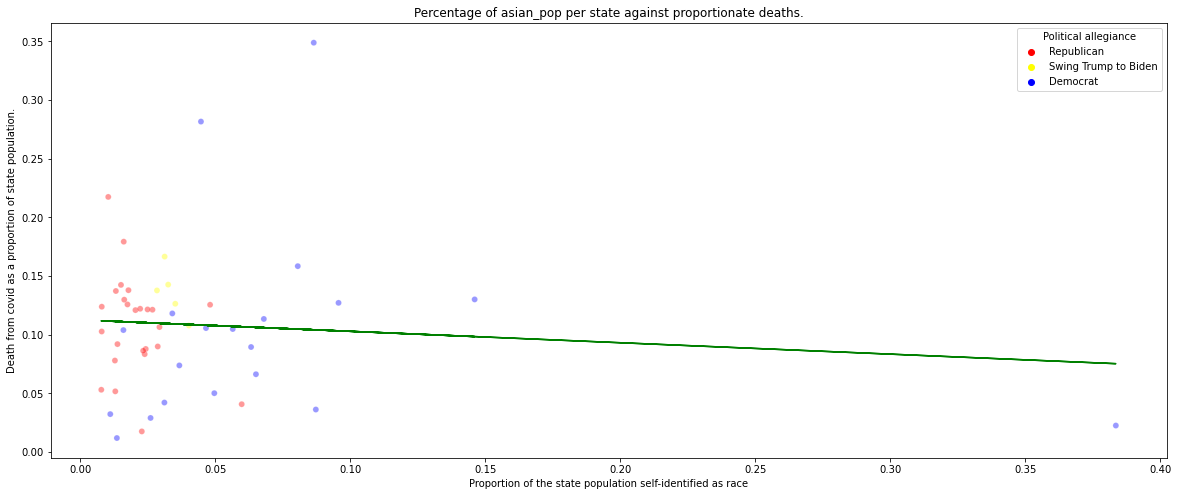

The line of best fit is [[-0.0972299]]x + [0.11270189]
The line of best fit has an R^2 of 0.00790457515994758


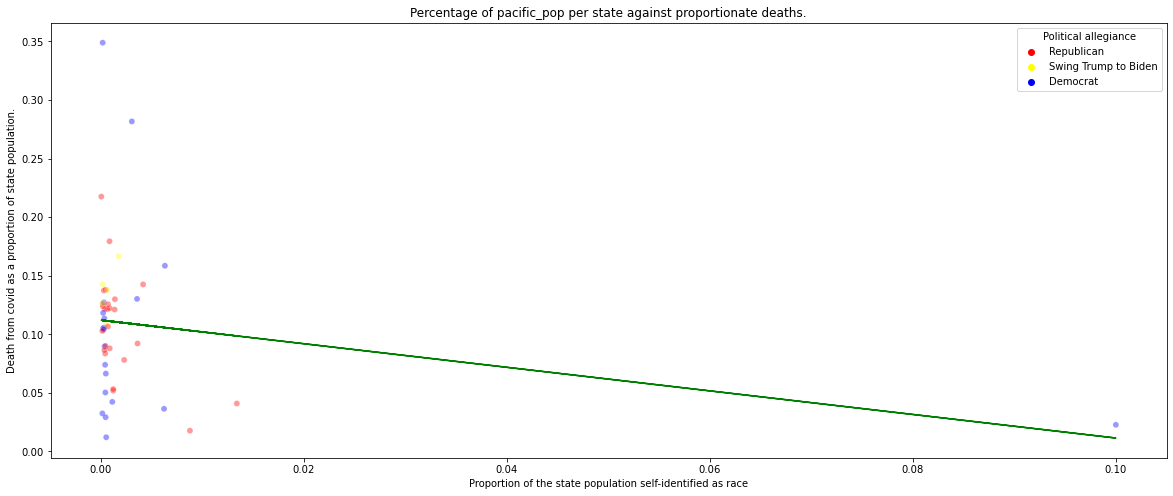

The line of best fit is [[-1.00672197]]x + [0.11205457]
The line of best fit has an R^2 of 0.05342410797027575


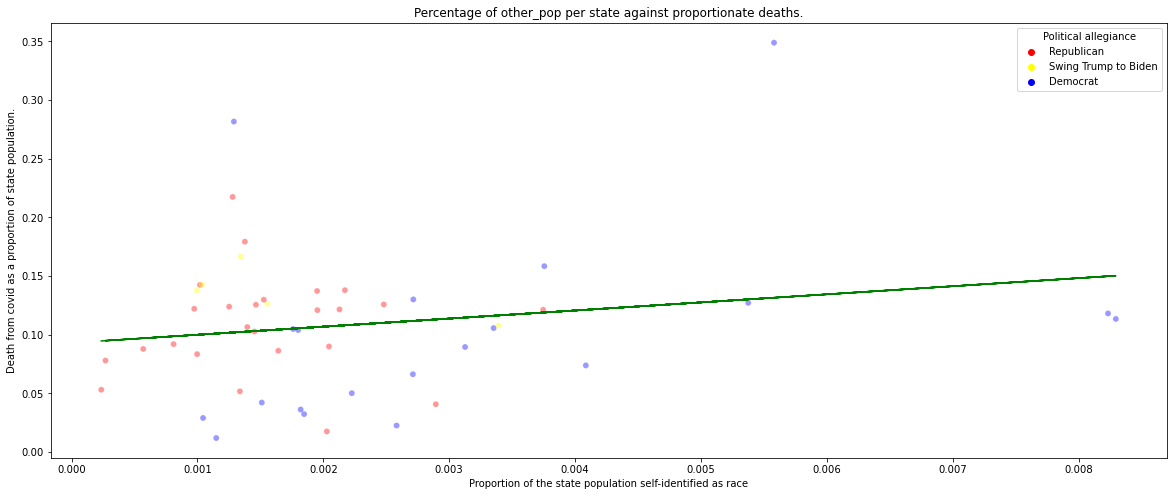

The line of best fit is [[6.89389791]]x + [0.0931662]
The line of best fit has an R^2 of 0.035489465282383614


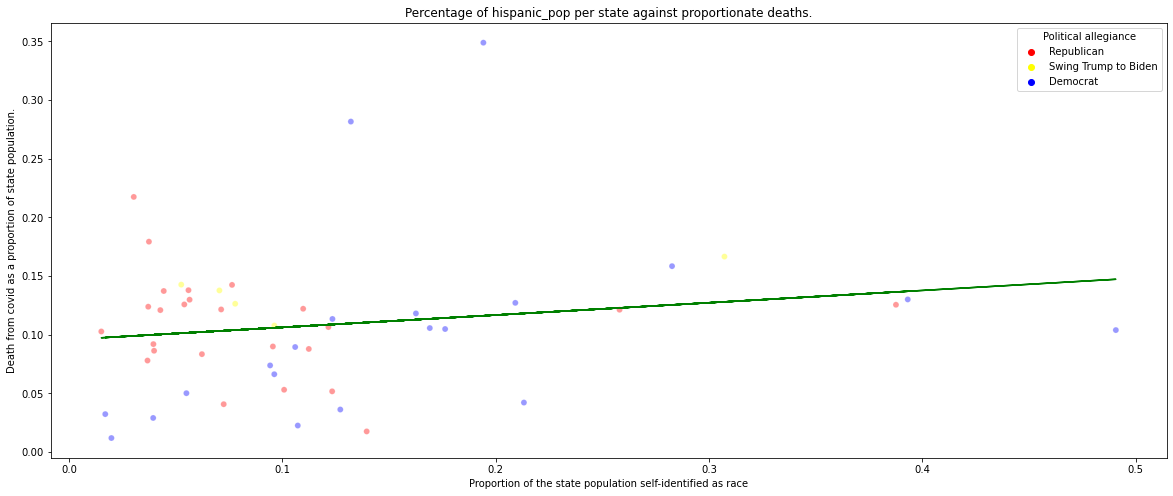

The line of best fit is [[0.10481035]]x + [0.09589696]
The line of best fit has an R^2 of 0.03094661903581064


In [95]:
for x in races:
 Line_race_death =LinearRegression()
 x_line_racepercent = SR2["perc_of_pop_race"][SR2['race pop']==x].to_numpy().reshape(-1, 1)
 y_line_statedeath = SR2["death_proportion"][SR2['race pop']==x].to_numpy().reshape(-1, 1)
 Line_race_death.fit(x_line_racepercent, y_line_statedeath)
 death_predicted_race = Line_race_death.predict(x_line_racepercent)
 
 plt.figure(figsize=(20,8))
 race_data = SR2[SR2['race pop']==x]
 sns.scatterplot(data=race_data, x="perc_of_pop_race", y="death_proportion", hue="state_swing2", alpha=0.4, palette =['red', 'yellow', 'blue'])
 plt.legend(title="Political allegiance")
 plt.plot(x_line_racepercent, death_predicted_race, color='green')
 title = "Percentage of " + x + " per state against proportionate deaths."
 plt.title(title)
 plt.xlabel("Proportion of the state population self-identified as race")
 plt.ylabel("Death from covid as a proportion of state population.")
 plt.show()
 print(f"The line of best fit is {Line_race_death.coef_}x + {Line_race_death.intercept_}")
 print(f"The line of best fit has an R^2 of {Line_race_death.score(x_line_racepercent, y_line_statedeath)}")

None of the other races documents by the census showed a strong correlation between their percentage of the state population and deaths as a proportion of the state's population.

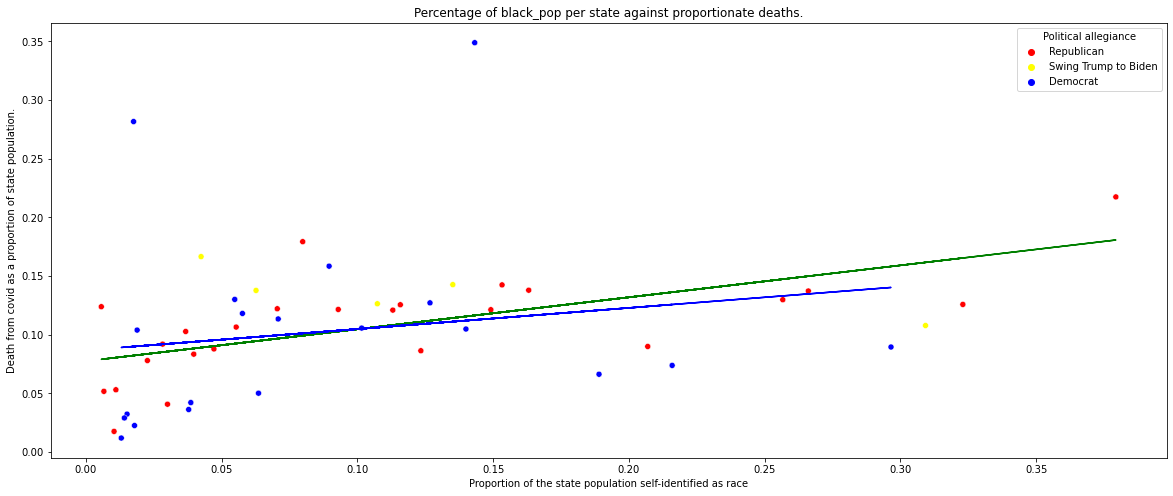

The line of best fit is [[0.27216267]]x + [0.07757012] for republican states
The line of best fit has an R^2 of 0.4407362597773038

The line of best fit is [[0.18038874]]x + [0.08687276] for democratic states
The line of best fit has an R^2 of 0.027892679538201293


In [96]:
Line_race_black =LinearRegression()
x="black_pop"
x_line_racepercent = SR2["perc_of_pop_race"][(SR2['race pop']==x) & (SR2["state_swing"]<1)].to_numpy().reshape(-1, 1)
y_line_statedeath = SR2["death_proportion"][(SR2['race pop']==x) & (SR2["state_swing"]<1)].to_numpy().reshape(-1, 1)
Line_race_death.fit(x_line_racepercent, y_line_statedeath)
death_predicted_race = Line_race_death.predict(x_line_racepercent)
 
plt.figure(figsize=(20,8))
race_data = SR2[(SR2['race pop']==x)]
sns.scatterplot(data=race_data, x="perc_of_pop_race", y="death_proportion", hue="state_swing2", palette=['red', 'yellow', 'blue'])
plt.legend(title="Political allegiance")
plt.plot(x_line_racepercent, death_predicted_race, color='green')
print_rep = f"The line of best fit is {Line_race_death.coef_}x + {Line_race_death.intercept_} for republican states"
print_rep2 = f"The line of best fit has an R^2 of {Line_race_death.score(x_line_racepercent, y_line_statedeath)}"


title = "Percentage of " + x + " per state against proportionate deaths."
plt.title(title)
plt.xlabel("Proportion of the state population self-identified as race")
plt.ylabel("Death from covid as a proportion of state population.")

x="black_pop"
x_line_racepercent = SR2["perc_of_pop_race"][(SR2['race pop']==x) & (SR2["state_swing"]==3)].to_numpy().reshape(-1, 1)
y_line_statedeath = SR2["death_proportion"][(SR2['race pop']==x) & (SR2["state_swing"]==3)].to_numpy().reshape(-1, 1)
Line_race_death.fit(x_line_racepercent, y_line_statedeath)
death_predicted_race = Line_race_death.predict(x_line_racepercent)
plt.plot(x_line_racepercent, death_predicted_race, color='blue')

plt.show()
print(print_rep)
print(print_rep2)
print()
print(f"The line of best fit is {Line_race_death.coef_}x + {Line_race_death.intercept_} for democratic states")
print(f"The line of best fit has an R^2 of {Line_race_death.score(x_line_racepercent, y_line_statedeath)}")

Whilst democratic states show no clear correlation between proportion of black individuals per state and death, with an R^2 scored of only 0.028, the republican states show a stronger positive correlation with a coefficient of 0.272 and R^2 of 0.441. This suggests that republican states with larger black communities were on average more likely to see a higher level of death proportionate to their population.